## IMPORTS

In [2]:
import csv, sys
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas_profiling
color = sns.color_palette()

C:\Users\madhu\Anaconda3\lib\site-packages\matplotlib\__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


## Reading the data from the CSVs into separate dataframes

In [3]:
data_2016 = pd.read_csv('DataClean_2016.csv',low_memory=False)
data_2017 = pd.read_csv('DataClean_2017.csv',low_memory=False)

In [4]:
print("2016 Rows and Columns-",data_2016.shape)
print("2017 Rows and Columns-",data_2017.shape)

2016 Rows and Columns- (90275, 28)
2017 Rows and Columns- (77579, 27)


# All columns in 2016 and 2017 with 30% missing data

In [5]:
data_2016.columns

Index(['Unnamed: 0', 'parcelid', 'logerror', 'transactiondate', 'year',
       'month', 'fips', 'propertylandusetypeid', 'rawcensustractandblock',
       'regionidcounty', 'longitude', 'latitude', 'assessmentyear',
       'bedroomcnt', 'bathroomcnt', 'roomcnt', 'propertycountylandusecode',
       'regionidzip', 'taxamount', 'taxvaluedollarcnt',
       'structuretaxvaluedollarcnt', 'calculatedfinishedsquarefeet',
       'yearbuilt', 'regionidcity', 'landtaxvaluedollarcnt',
       'censustractandblock', 'lotsizesquarefeet', 'age'],
      dtype='object')

In [6]:
data_2017.columns

Index(['Unnamed: 0', 'parcelid', 'logerror', 'transactiondate', 'year',
       'month', 'fips', 'propertylandusetypeid', 'rawcensustractandblock',
       'regionidcounty', 'longitude', 'latitude', 'assessmentyear',
       'bedroomcnt', 'bathroomcnt', 'roomcnt', 'propertycountylandusecode',
       'regionidzip', 'taxamount', 'taxvaluedollarcnt',
       'calculatedfinishedsquarefeet', 'structuretaxvaluedollarcnt',
       'yearbuilt', 'landtaxvaluedollarcnt', 'regionidcity',
       'censustractandblock', 'lotsizesquarefeet'],
      dtype='object')

In [7]:
data_2016.dtypes

Unnamed: 0                        int64
parcelid                          int64
logerror                        float64
transactiondate                   int64
year                              int64
month                             int64
fips                            float64
propertylandusetypeid           float64
rawcensustractandblock          float64
regionidcounty                  float64
longitude                       float64
latitude                        float64
assessmentyear                  float64
bedroomcnt                      float64
bathroomcnt                     float64
roomcnt                         float64
propertycountylandusecode         int64
regionidzip                     float64
taxamount                       float64
taxvaluedollarcnt               float64
structuretaxvaluedollarcnt      float64
calculatedfinishedsquarefeet    float64
yearbuilt                       float64
regionidcity                    float64
landtaxvaluedollarcnt           float64


### Describing each column

In [8]:
def describeColumn(yearValue):
    for col in yearValue.columns:
        print("")
        print("Descriing "+ col +":")
        print(yearValue[col].describe())

In [9]:
describeColumn(data_2016)


Descriing Unnamed: 0:
count    90275.000000
mean     45137.000000
std      26060.292113
min          0.000000
25%      22568.500000
50%      45137.000000
75%      67705.500000
max      90274.000000
Name: Unnamed: 0, dtype: float64

Descriing parcelid:
count    9.027500e+04
mean     1.298466e+07
std      2.504510e+06
min      1.071174e+07
25%      1.155950e+07
50%      1.254734e+07
75%      1.422755e+07
max      1.629608e+08
Name: parcelid, dtype: float64

Descriing logerror:
count    90275.000000
mean         0.011457
std          0.161079
min         -4.605000
25%         -0.025300
50%          0.006000
75%          0.039200
max          4.737000
Name: logerror, dtype: float64

Descriing transactiondate:
count    90275.000000
mean       159.871061
std         83.811738
min          0.000000
25%         93.000000
50%        162.000000
75%        227.000000
max        351.000000
Name: transactiondate, dtype: float64

Descriing year:
count    90275.0
mean      2016.0
std          0.0
mi

In [10]:
describeColumn(data_2017)


Descriing Unnamed: 0:
count    77579.000000
mean     38806.223579
std      22403.467491
min          0.000000
25%      19404.500000
50%      38804.000000
75%      58207.500000
max      77612.000000
Name: Unnamed: 0, dtype: float64

Descriing parcelid:
count    7.757900e+04
mean     1.300828e+07
std      3.519399e+06
min      1.071186e+07
25%      1.153820e+07
50%      1.253054e+07
75%      1.421136e+07
max      1.676893e+08
Name: parcelid, dtype: float64

Descriing logerror:
count    77579.000000
mean         0.016803
std          0.170738
min         -4.655420
25%         -0.024309
50%          0.006676
75%          0.039291
max          5.262999
Name: logerror, dtype: float64

Descriing transactiondate:
count    77579.000000
mean       137.993052
std         71.559094
min          0.000000
25%         81.000000
50%        142.000000
75%        198.000000
max        263.000000
Name: transactiondate, dtype: float64

Descriing year:
count    77579.0
mean      2017.0
std          0.0
mi

The Only Catagorical Data Type is the propertycountylandusecode (After getting rid of data that is over 70% missing

# Function to Return just numerical property columns

In [11]:
def selectedColumnForYear(yearValue):
    x = yearValue.columns.get_values()
    index = [np.argwhere(x=='year'), np.argwhere(x=='month'), np.argwhere(x=='transactiondate'), np.argwhere(x=='logerror'),np.argwhere(x=='parcelid'), np.argwhere(x=='propertycountylandusecode')]
    colNames = np.delete(x, index)
    return colNames

# Location Features

    # Following are the features to concider: Latitude, Longitude, fips, regionZip, regionCity, censustractandblock

## Dealing with the 'fips' column

In [12]:
data_2016['fips'].unique()

array([ 6037.,  6059.,  6111.])

In [13]:
data_2017['fips'].unique()

array([ 6059.,  6111.,  6037.])

For 2016 and 2017 Data

    6037 Los Angeles County  California
    6059 Orange County       California
    6111 Ventura County      California

In [14]:
# from mpl_toolkits.basemap import Basemap, cm
# geocolumns = [  'latitude', 'longitude','propertycountylandusecode', 'propertylandusetypeid', 'propertyzoningdesc','regionidcity','regionidcounty', 'regionidzip','censustractandblock', 'rawcensustractandblock']

# geoprop = data_2016[geocolumns]
# #del data_2016; gc.collect()

# geoprop.loc[:,'latitude'] = geoprop.loc[:,'latitude']/1e6
# geoprop.loc[:,'longitude'] = geoprop.loc[:,'longitude']/1e6

# maxlat = (geoprop['latitude']).max()
# maxlon = (geoprop['longitude']).max()
# minlat = (geoprop['latitude']).min()
# minlon = (geoprop['longitude']).min()
# print('maxlat {} minlat {} maxlon {} minlon {}'.format(maxlat, minlat, maxlon, minlon))

# CAparms = { 'llcrnrlat' : minlat,
#                      'urcrnrlat' : maxlat+0.2,
#                      'llcrnrlon' : maxlon-2.5,
#                      'urcrnrlon' :minlon+2.5 }
# Bm, fig = create_basemap()
# x,y = Bm( geoprop['longitude'].values, geoprop['latitude'].values)                           
# Bm.scatter( x, y, marker = 'D',color = 'm', s = 1 )
# plt.show()

In [15]:

def create_basemap( llcrnrlat=30,urcrnrlat=50,llcrnrlon=-130,urcrnrlon=-60, figsize=(16,9) ):
    fig=plt.figure( figsize = figsize )
    Bm = Basemap( projection='merc', 
                llcrnrlat=llcrnrlat,urcrnrlat=urcrnrlat,
                llcrnrlon=llcrnrlon,urcrnrlon=urcrnrlon,
                lat_ts=20,resolution='i' )
    # draw coastlines, state and country boundaries, edge of map.
    Bm.drawcoastlines(); Bm.drawstates(); Bm.drawcountries() 
    return Bm, fig    


Bm, fig = create_basemap()
x,y = Bm( geoprop['longitude'].values, geoprop['latitude'].values)                           
Bm.scatter( x, y, marker = 'D',color = 'm', s = 1 )
plt.show()

NameError: name 'Basemap' is not defined

Above it can be seen that the all the regions are in one area in California

## Coorelation between all the location variables

In [302]:
corr = geoprop.isnull().corr()
sns.heatmap( corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values ) 
plt.show()

NameError: name 'geoprop' is not defined

## Map both the distribution of each and Correlation between longitude and latitude

In [16]:
def latitudeLongitudeJointPlot(yearValue):
    plt.figure(figsize=(12,12))
    sns.set(font_scale = 1)
    sns.jointplot(x=yearValue.latitude.values, y=yearValue.longitude.values, size=10)
    plt.ylabel('Longitude', fontsize=12)
    plt.xlabel('Latitude', fontsize=12)
    plt.show()

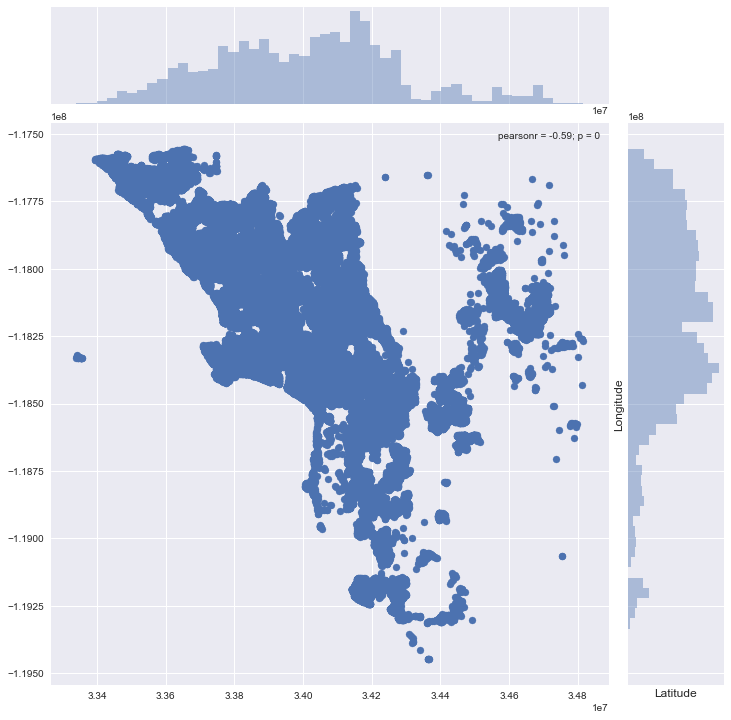

In [17]:
latitudeLongitudeJointPlot(data_2016)

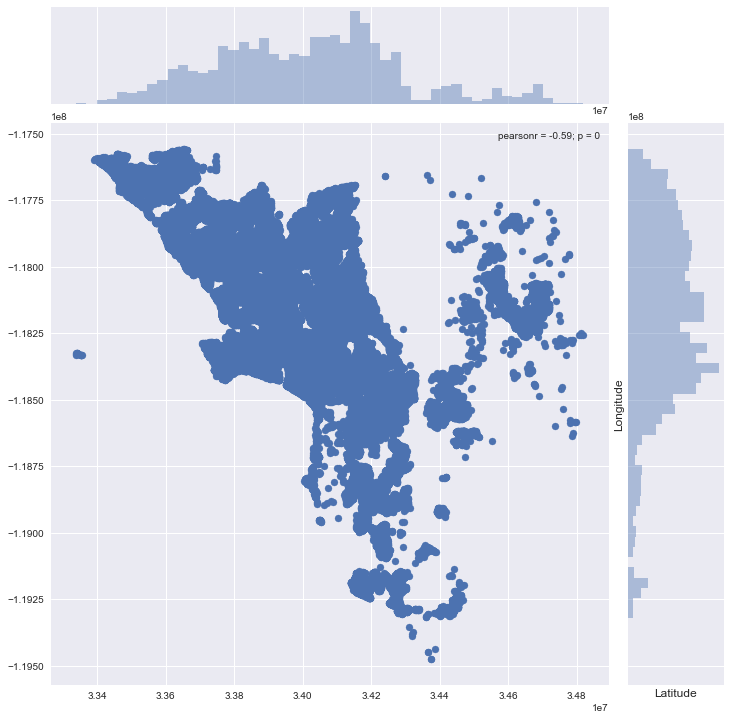

In [18]:
latitudeLongitudeJointPlot(data_2017)

In [19]:
data_2016['regionidzip'].describe()

count     90275.00000
mean      96586.41532
std        3660.65769
min       95982.00000
25%       96193.00000
50%       96393.00000
75%       96987.00000
max      399675.00000
Name: regionidzip, dtype: float64

Some of the zip codes given : such as "97319" are not in the USA

In [20]:
def numHousedPerCounty(yearValue):
    fig,ax1= plt.subplots()
    sns.set(font_scale = 1)
    fig.set_size_inches(20,10)
    data_2016["regionidcounty"] = yearValue["regionidcounty"].map(lambda x:str(x).split(".")[0])
    yearMerged = yearValue.groupby(['regionidcounty', 'regionidcity'])["parcelid"].count().unstack('regionidcity').fillna(0)
    yearMerged.plot(kind='bar', stacked=False,ax=ax1)

    ax1.set_xlabel('Different County in California',fontsize=20, color='red')
    ax1.set_ylabel('Count of house',fontsize=14, color='red')


    plt.show()

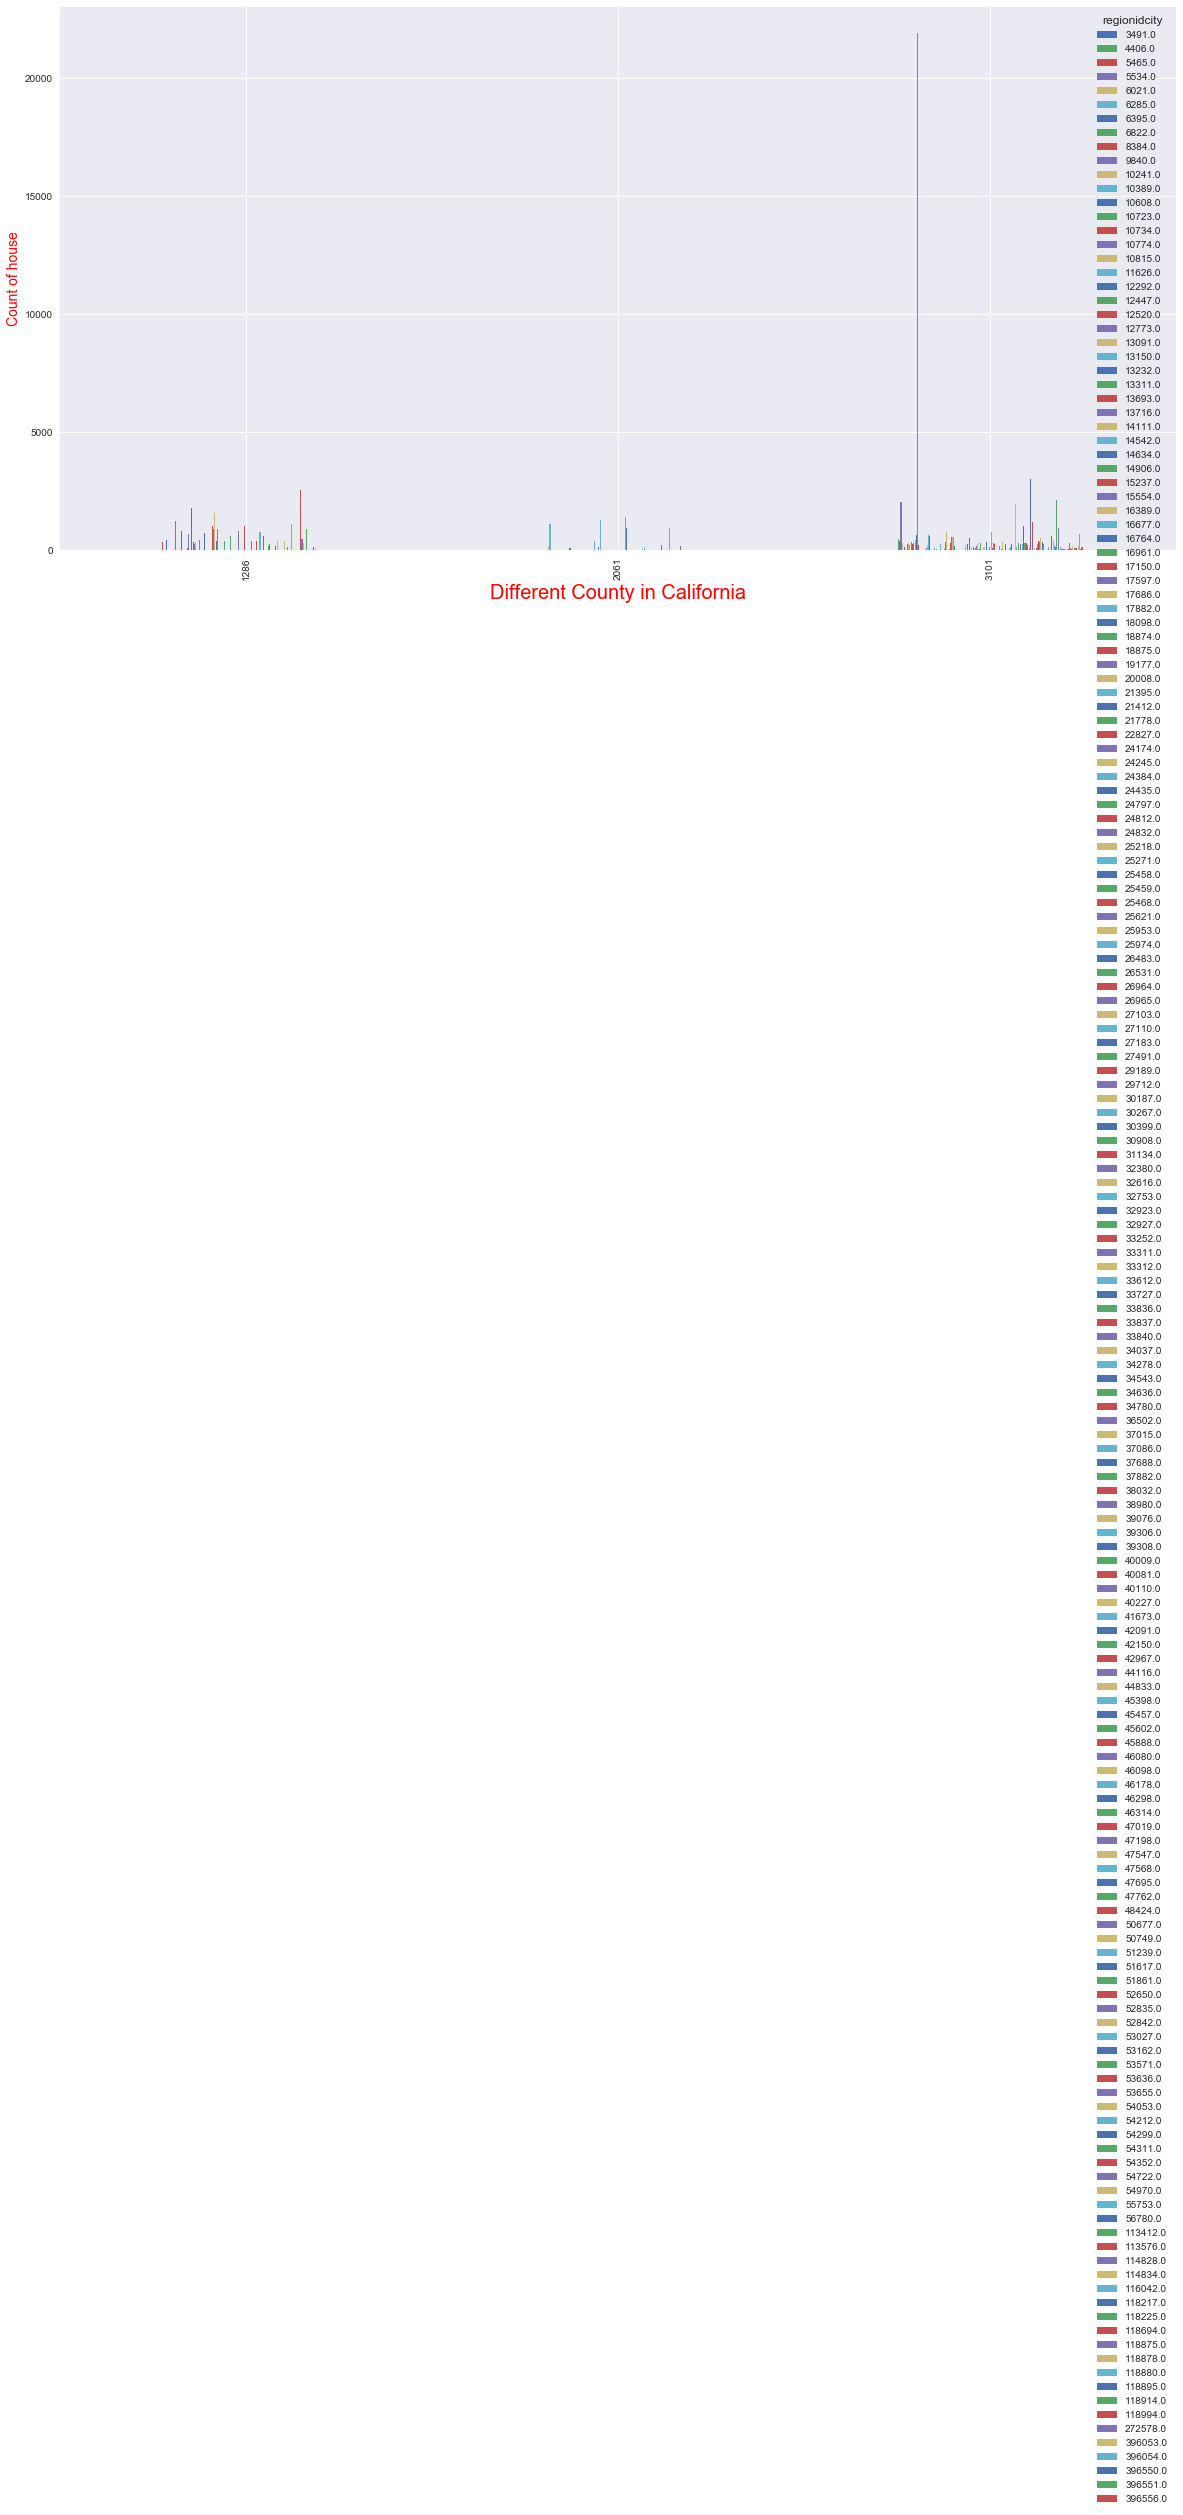

In [21]:
numHousedPerCounty(data_2016)

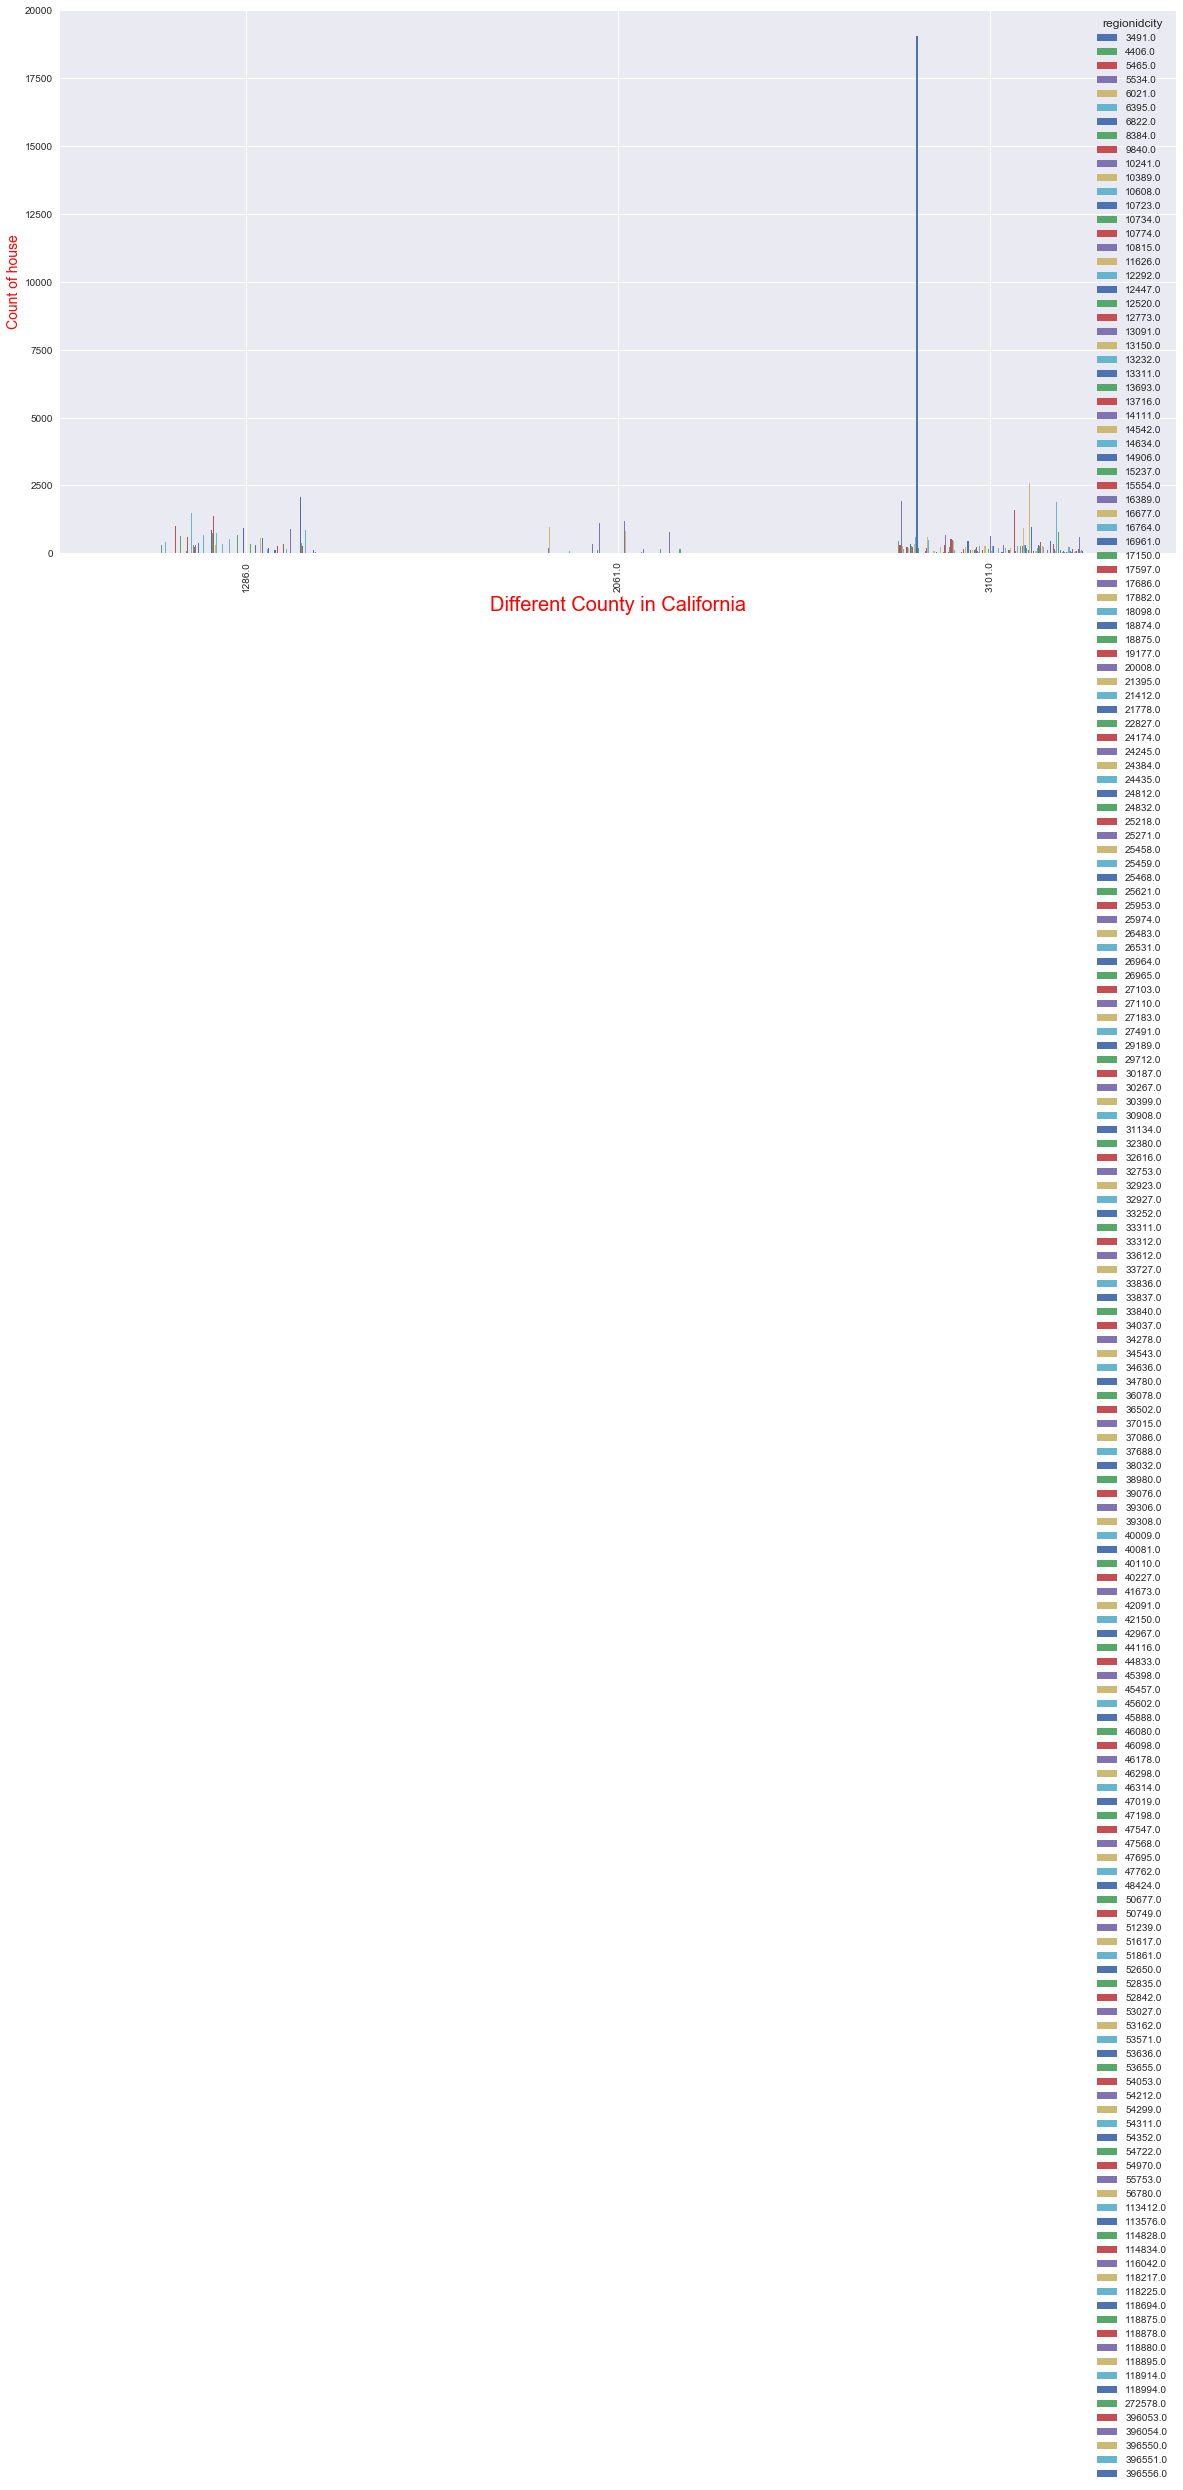

In [22]:
numHousedPerCounty(data_2017)

In [23]:
def regionCitycount(yearValue):
    feature = 'regionidcity'
    
    fig  = plt.figure(figsize=(12, 9), dpi=100);
    sns.set(font_scale = 1)
    axes1 = fig.add_subplot(411); axes3 = fig.add_subplot(413) #axes2 = fig.add_subplot(412); axes3 = fig.add_subplot(413)#; axes4 = fig.add_subplot(414); 
    sns.countplot(yearValue[feature].fillna('NaN'), ax=axes1); 
    bar_df1 = yearValue[[feature,     "logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
    sns.barplot(x=feature, y='logerror',     data=bar_df1, ax=axes3);

    fig.tight_layout()
    plt.show()

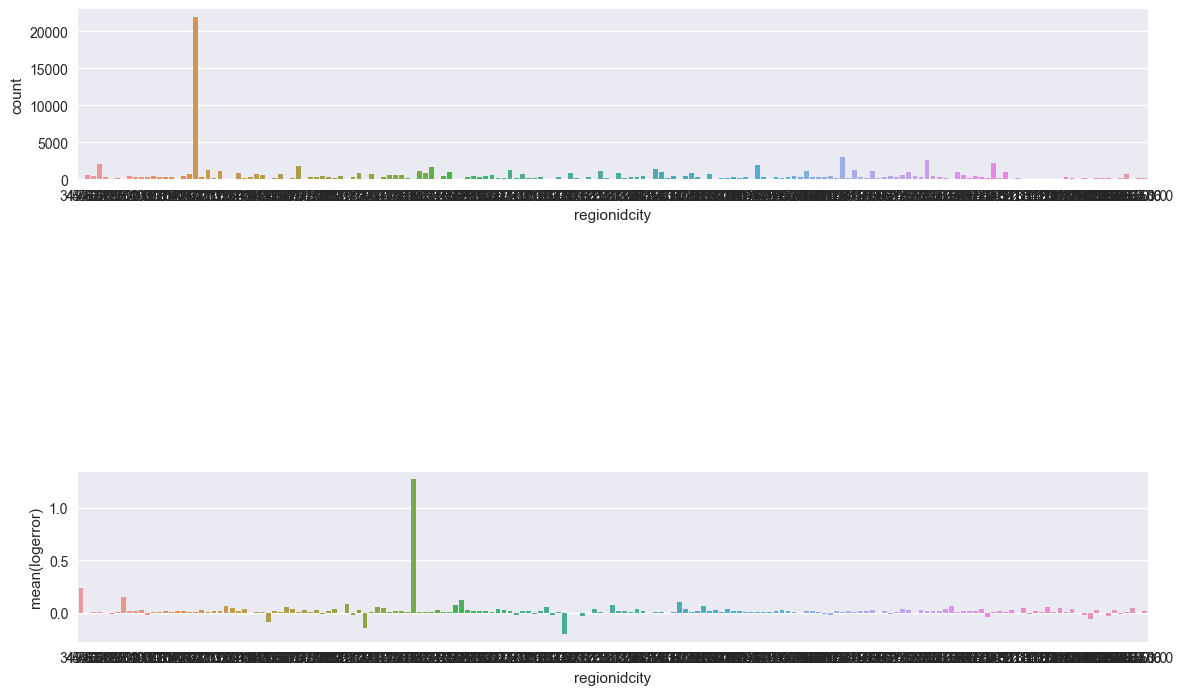

In [24]:
regionCitycount(data_2016)

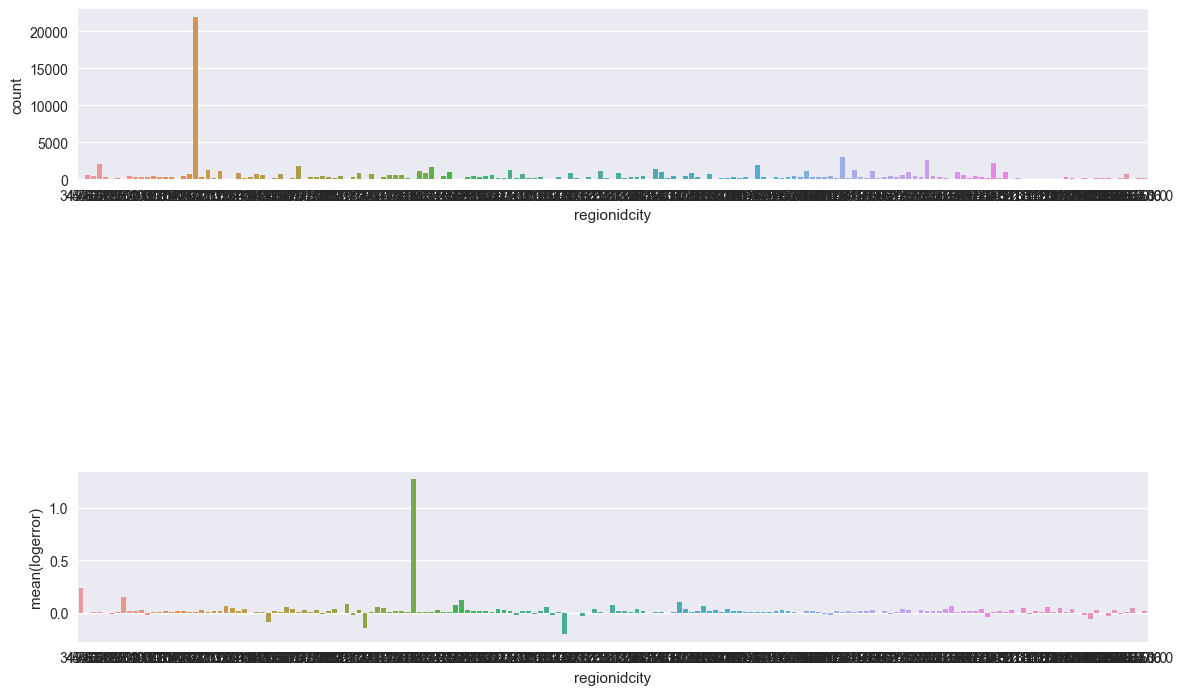

In [25]:
regionCitycount(data_2016)

In [26]:
def regionCountyCount(yearValue):
    feature = 'regionidcounty'

    fig  = plt.figure(figsize=(12, 9), dpi=100);
    sns.set(font_scale = 1)
    axes1 = fig.add_subplot(411); axes3 = fig.add_subplot(413) 
    sns.countplot(yearValue[feature].fillna('NaN'), ax=axes1);
    bar_df1 = yearValue[[feature,"logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
    sns.barplot(x=feature, y='logerror',     data=bar_df1, ax=axes3);
    fig.tight_layout()
    plt.show()

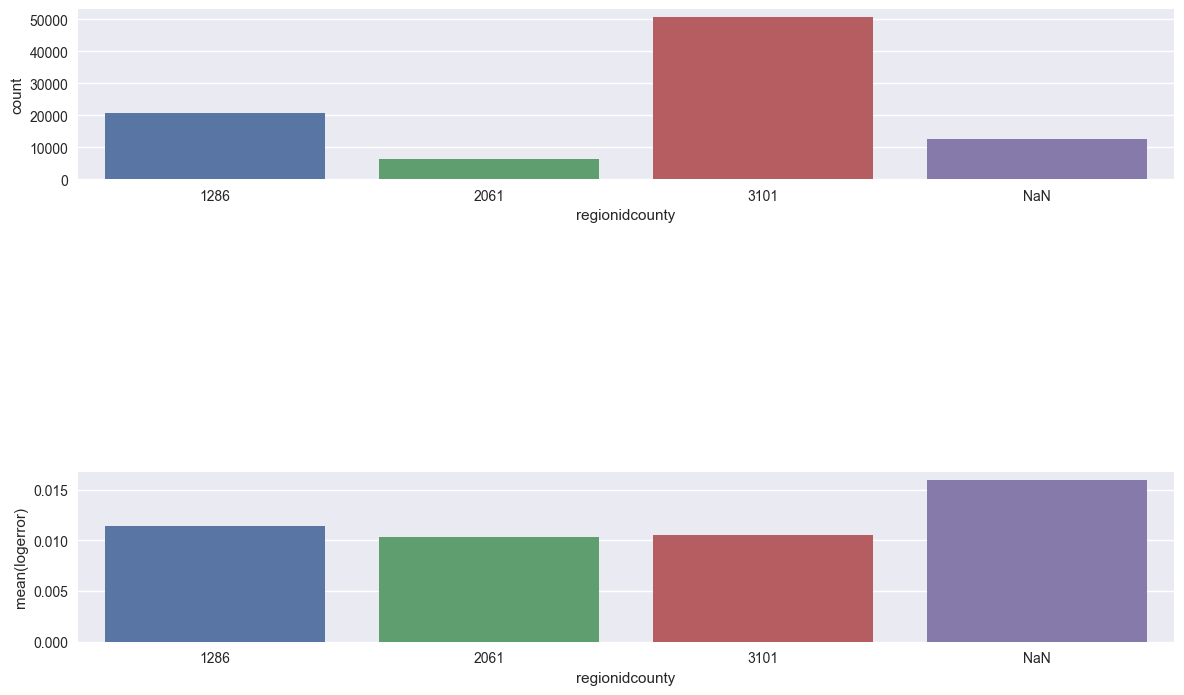

In [27]:
regionCountyCount(data_2016)

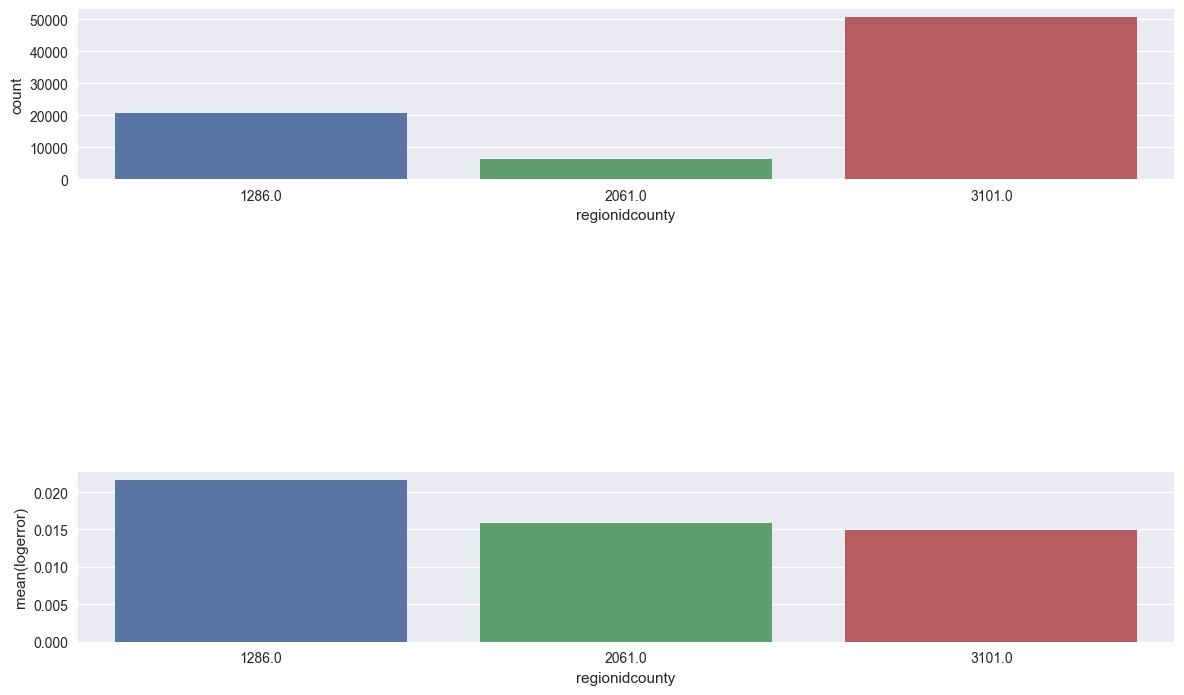

In [28]:
regionCountyCount(data_2017)

# All Correlation Graphs

## CORRELATION GRAPH (Heat Map) BETWEEN COLUMNS

In [32]:
# # Finding the correlation between the features
def correlationHeatMap(YearValue):
    f, ax = plt.subplots(figsize=(20, 20))
    sns.set(font_scale = 3)
    corr = data_2016.corr()

    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    sns.heatmap(corr, mask=mask, cmap=sns.diverging_palette(330, 0, as_cmap=True),
             square=True, linewidths=.5,vmax=0.3,ax=ax, cbar_kws={"shrink": 1})

    plt.show()

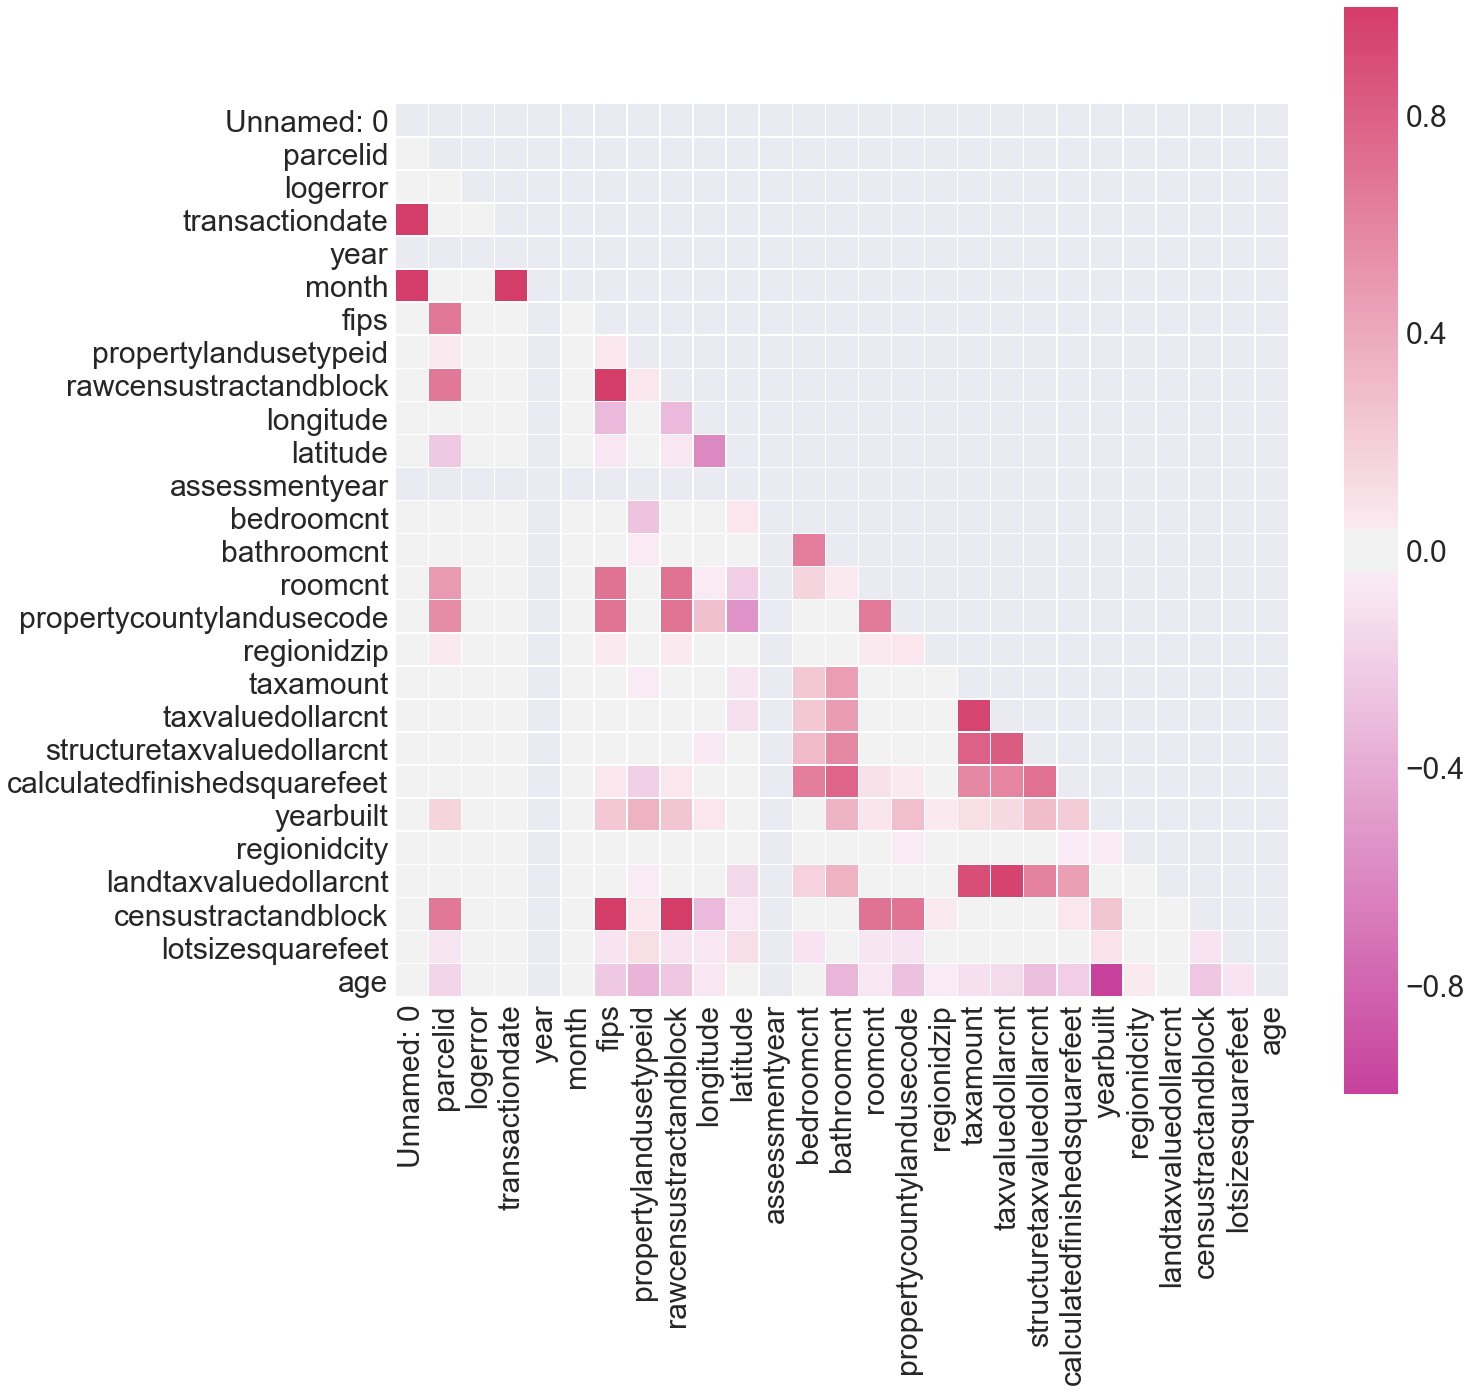

In [33]:
correlationHeatMap(data_2016)

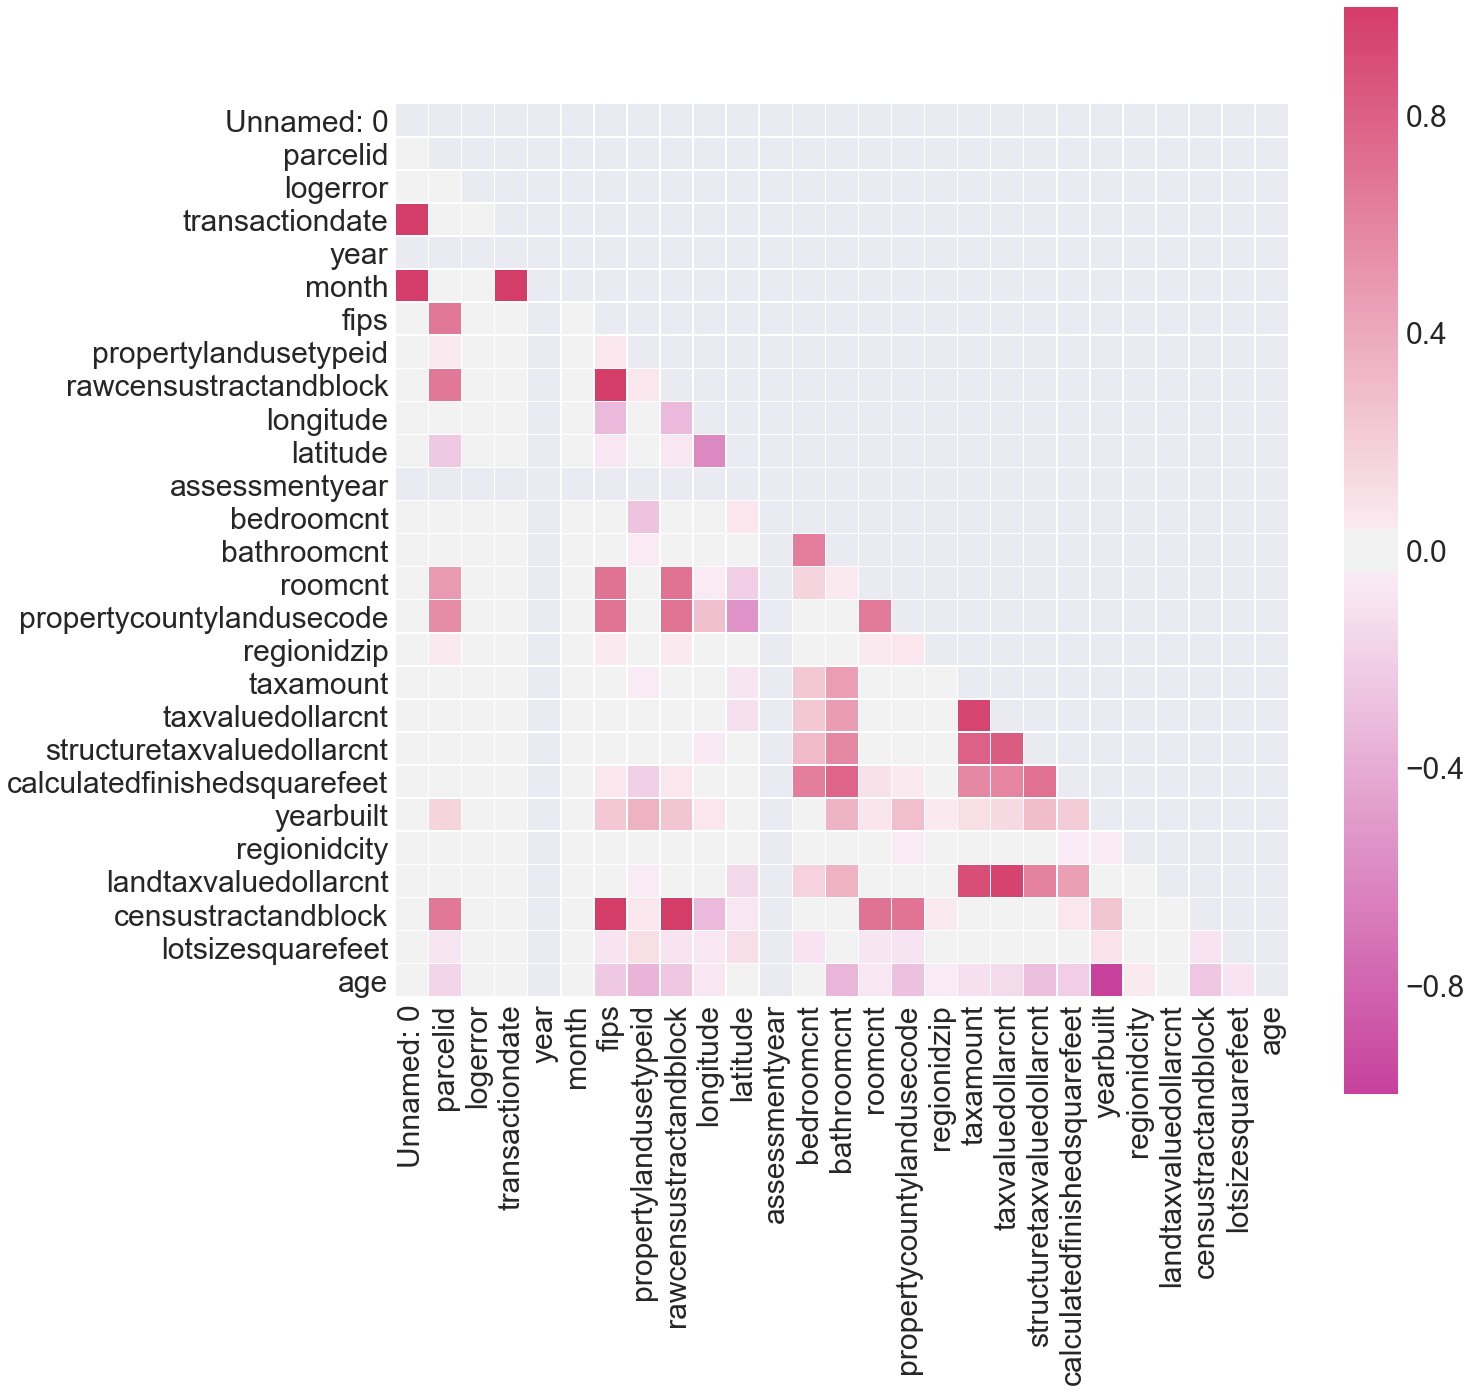

In [34]:
correlationHeatMap(data_2017)

In [35]:
def correlationForValidColumns(YearValue):
    #Identify numerical columns to produce a heatmap
    catcols = ['airconditioningtypeid','architecturalstyletypeid','buildingqualitytypeid','buildingclasstypeid','decktypeid','fips','hashottuborspa','heatingorsystemtypeid','pooltypeid10','pooltypeid2','pooltypeid7','propertycountylandusecode','propertylandusetypeid','propertyzoningdesc','rawcensustractandblock','regionidcity','regionidcounty','regionidneighborhood','regionidzip','storytypeid','typeconstructiontypeid','yearbuilt','taxdelinquencyflag']
    numcols = [x for x in YearValue.columns if x not in catcols]

    #Lets start by plotting a heatmap to determine if any variables are correlated
    plt.figure(figsize = (20,20))
    sns.set(font_scale = 2)
    sns.heatmap(data=YearValue[numcols].corr())
    plt.show()
    plt.gcf().clear()

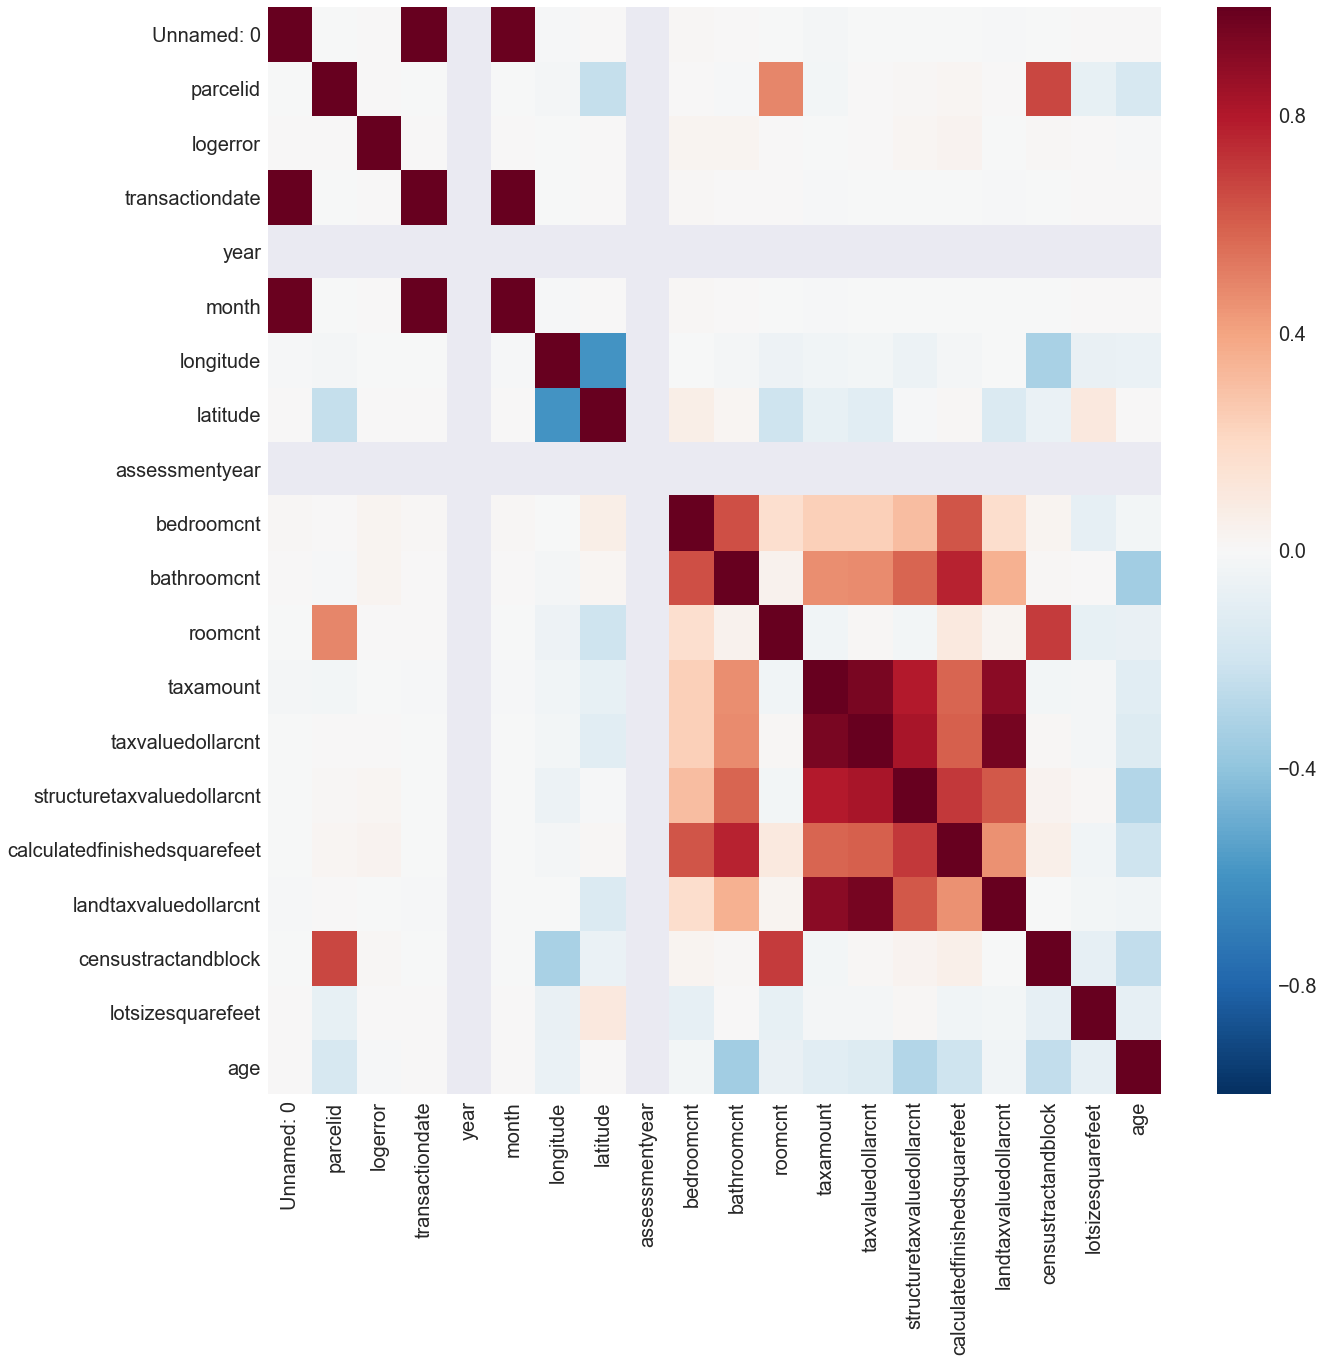

In [36]:
correlationForValidColumns(data_2016)

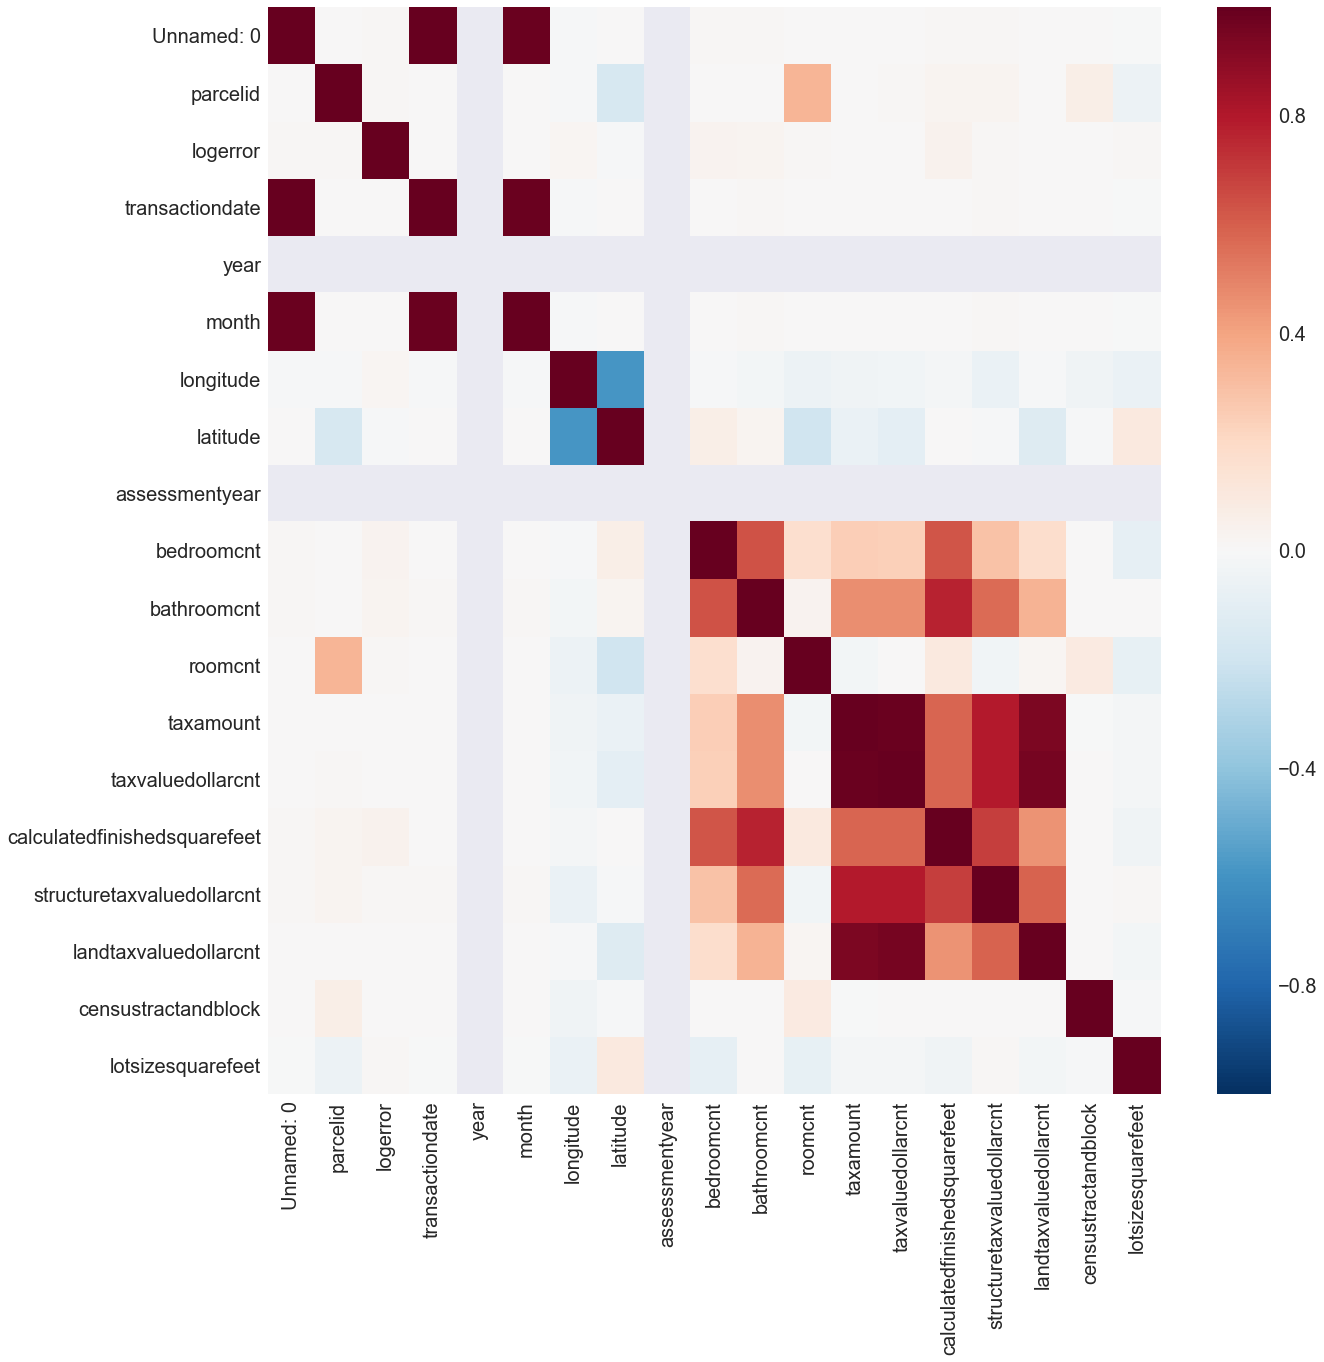

In [37]:
correlationForValidColumns(data_2017)

## Computing Correlation 

Looking at all the numerical data to plot the correlation with the target

In [38]:
# # Let us just impute the missing values with mean values to compute correlation coefficients #
def correlationComputation(yearValue):
    global corr_df
    # Now let us look at the correlation coefficient of each of these variables #
    x_cols = [col for col in yearValue.columns if col not in ['logerror'] if (yearValue[col].dtype=='float64'or yearValue[col].dtype=='int64')]
    labels = []
    values = []
    for col in x_cols:
        labels.append(col)
        values.append(np.corrcoef(yearValue[col].values, yearValue.logerror.values)[0,1])
    corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
    corr_df = corr_df.sort_values(by='corr_values')

    ind = np.arange(len(labels))
    width = 0.9
    fig, ax = plt.subplots(figsize=(20,40))
    sns.set(font_scale = 2)
    rects = ax.barh(ind, np.array(corr_df.corr_values.values), color='y')
    ax.set_yticks(ind)
    ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal')
    ax.set_xlabel("Correlation coefficient")
    ax.set_title("Correlation coefficient of the variables")
    #autolabel(rects)
    plt.show()

looking at 2016 data

C:\Users\madhu\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3003: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\madhu\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3004: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


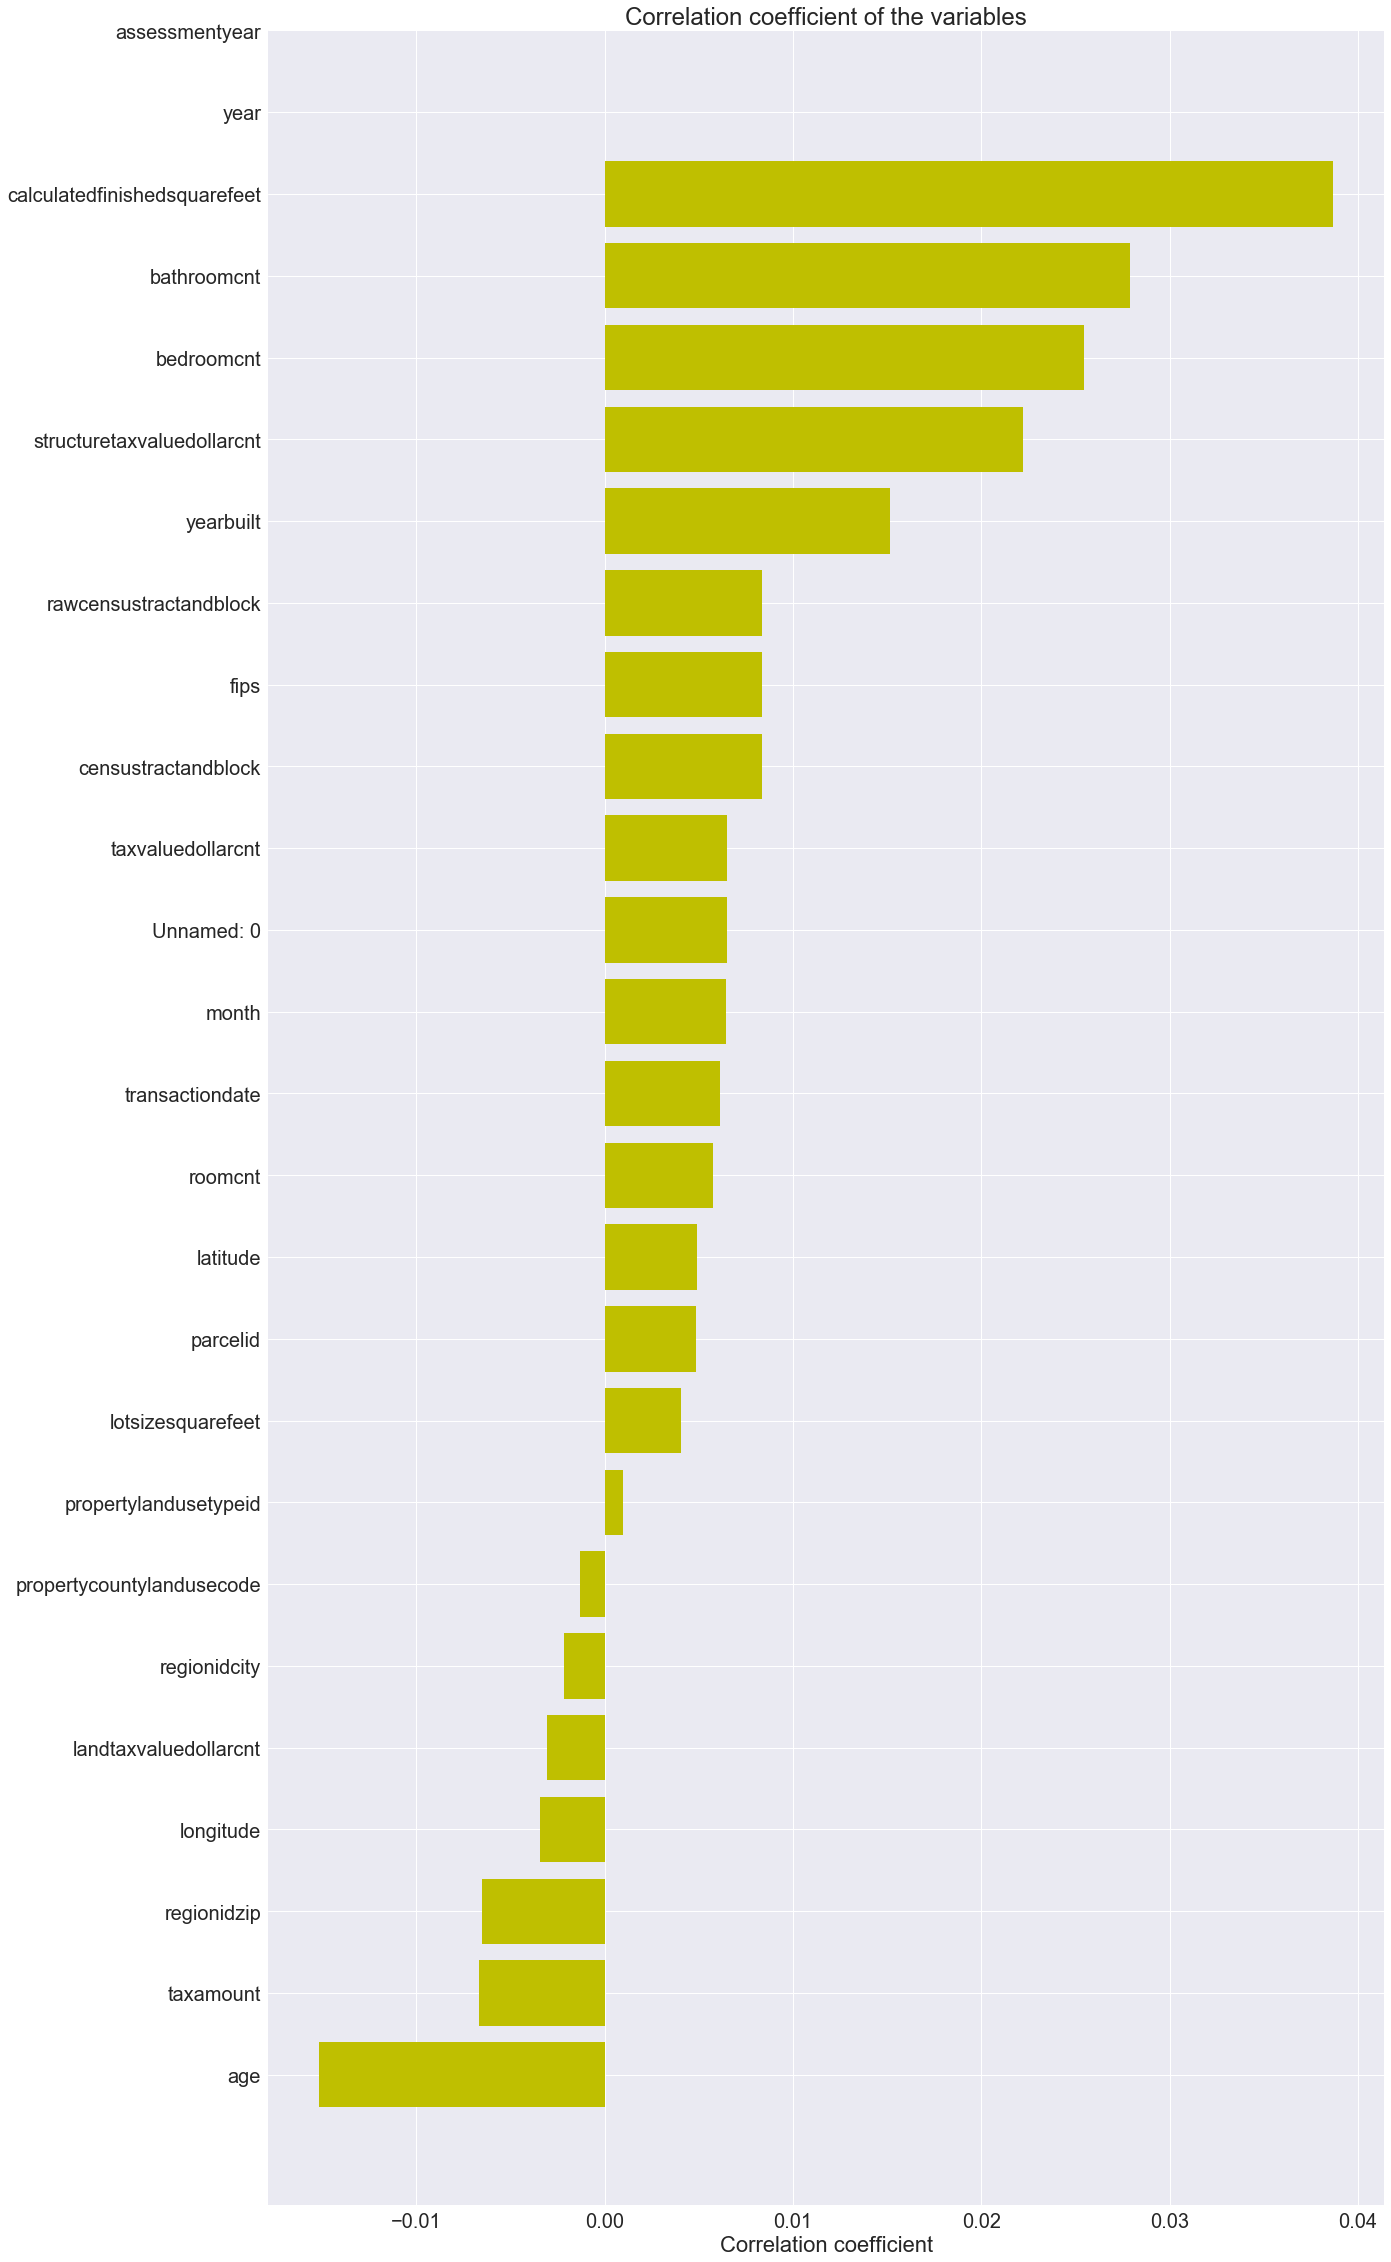

In [39]:
correlationComputation(data_2016)

 Picking the most correlated columns so can do more EDA on these

In [40]:
corr_df_sel = corr_df.ix[(corr_df['corr_values']>0.02) | (corr_df['corr_values'] < -0.01)]
corr_df_sel

C:\Users\madhu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


col_labels  corr_values
25                           age    -0.015170
18    structuretaxvaluedollarcnt     0.022229
11                    bedroomcnt     0.025467
12                   bathroomcnt     0.027889
19  calculatedfinishedsquarefeet     0.038689

looking at 2017 data

C:\Users\madhu\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3003: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\madhu\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3004: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


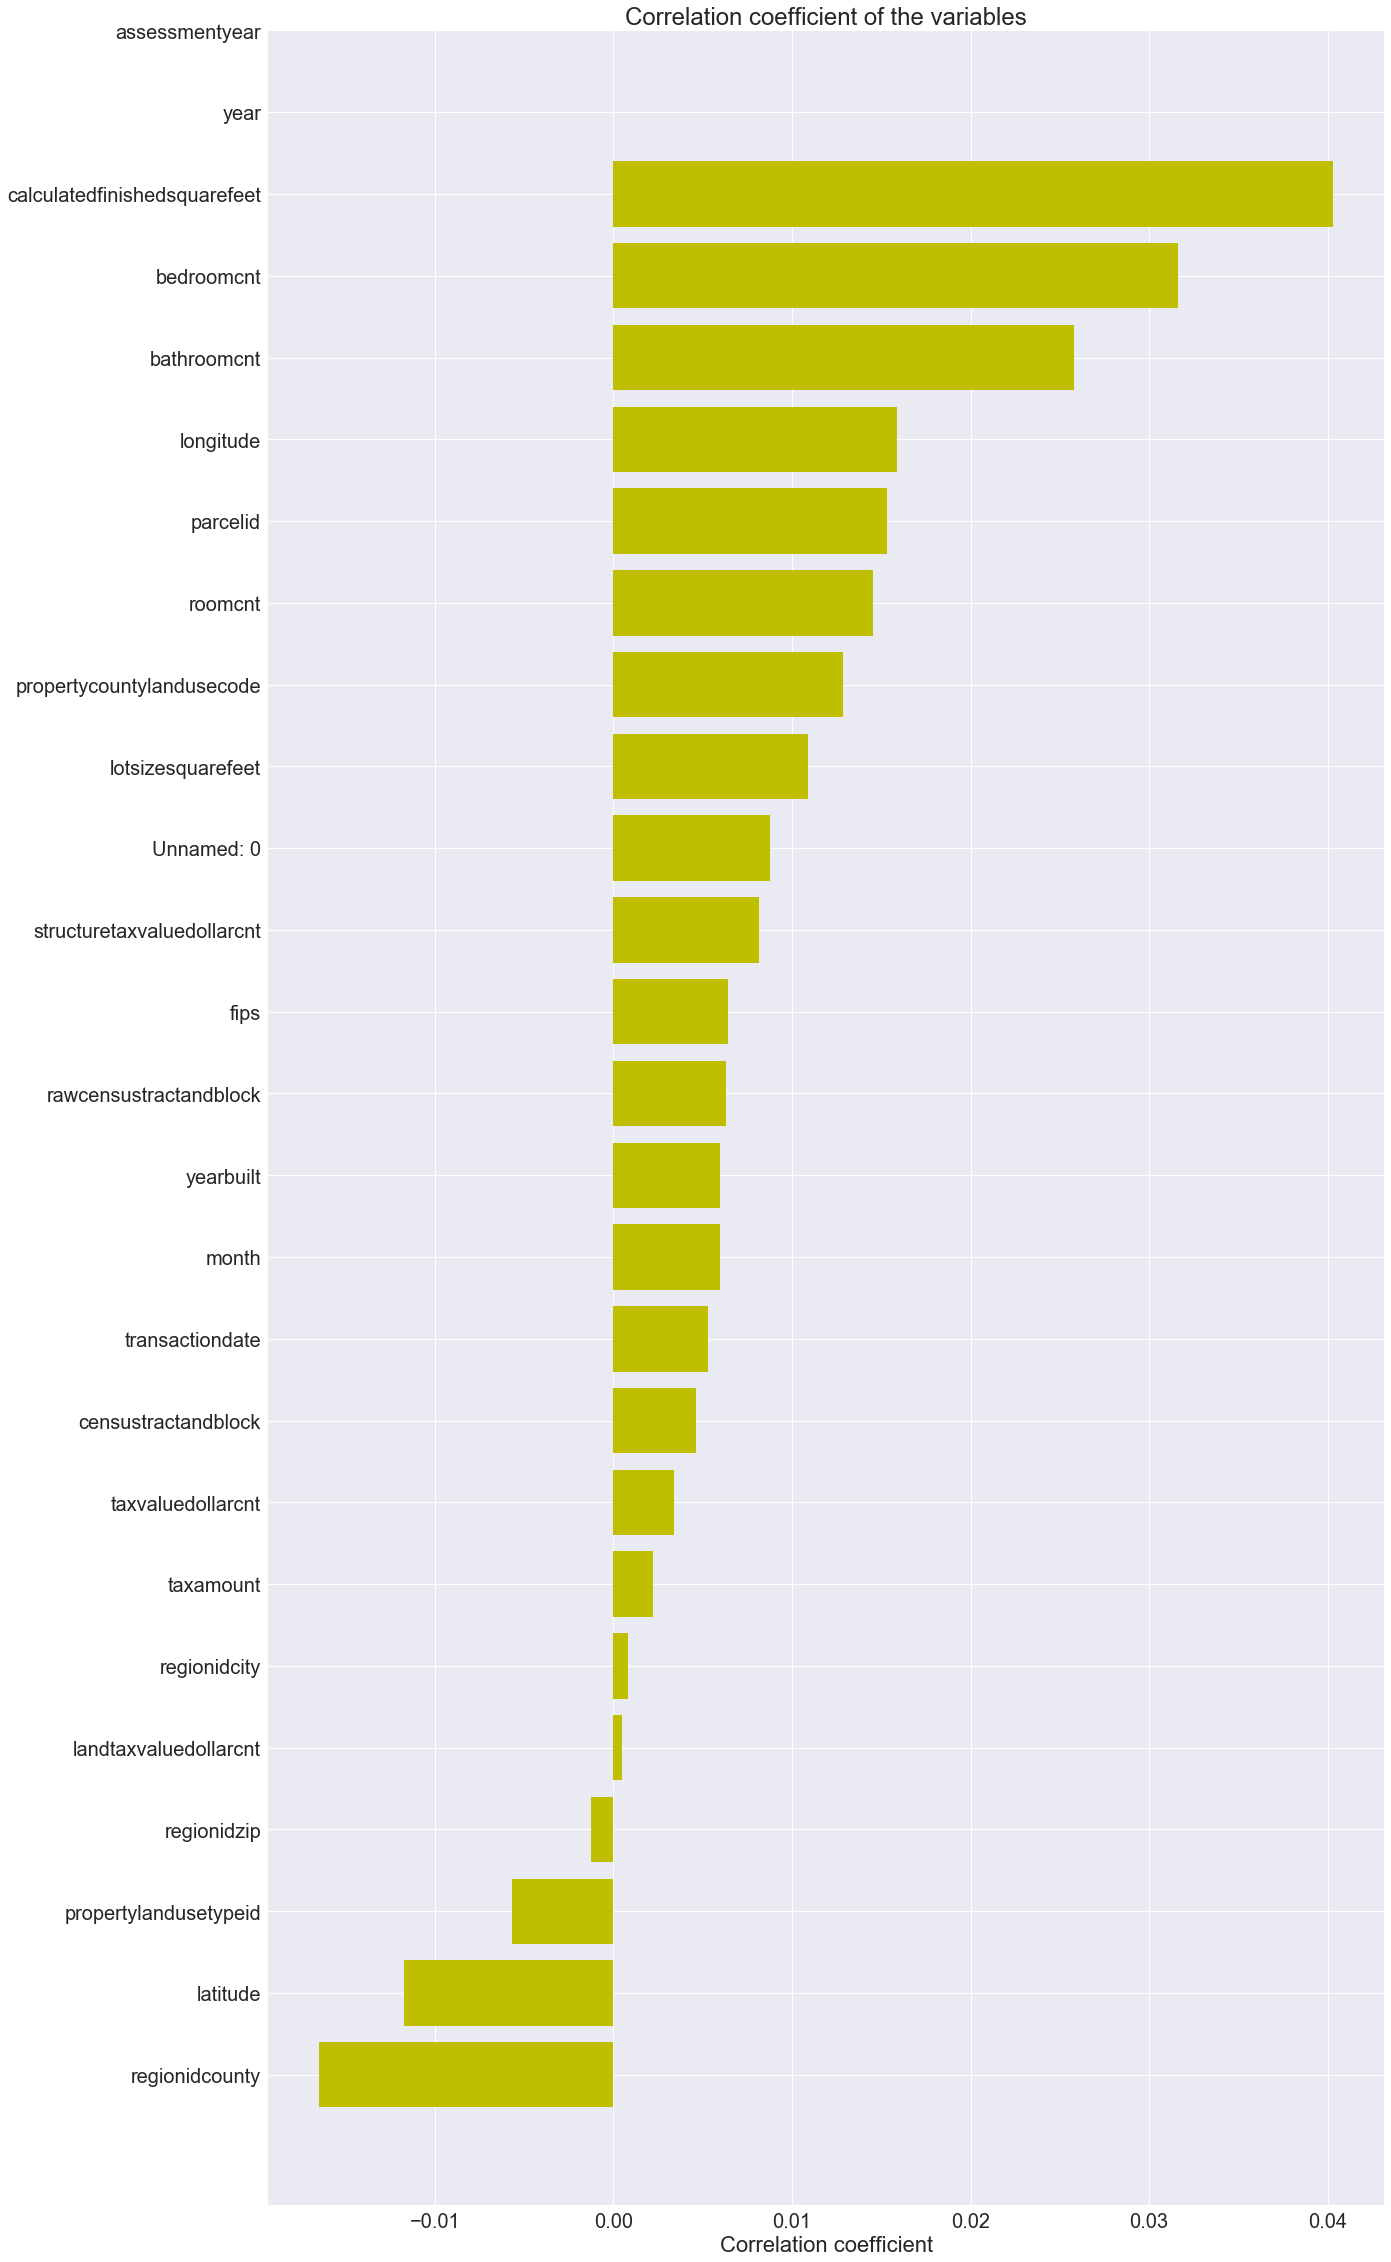

In [41]:
correlationComputation(data_2017)

Picking the most correlated columns so can do more EDA on these

In [42]:
corr_df_sel = corr_df.ix[(corr_df['corr_values']>0.02) | (corr_df['corr_values'] < -0.01)]
corr_df_sel

C:\Users\madhu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


col_labels  corr_values
8                 regionidcounty    -0.016493
10                      latitude    -0.011726
13                   bathroomcnt     0.025817
12                    bedroomcnt     0.031638
19  calculatedfinishedsquarefeet     0.040316

## Correlation Violin plots for each of the highly correlated columns

Violin plot shows not just the box plot but the actual weight/quantity of each value

### The Property landuse type code

#### Violin Plot

In [43]:
def violinpltpropertylandusetypeid(yearValue):
    plt.figure(figsize=(20,10))
    sns.set(font_scale = 2)
    sns.violinplot(x='propertylandusetypeid', y='logerror', data=yearValue, hue='fips')
    plt.show()

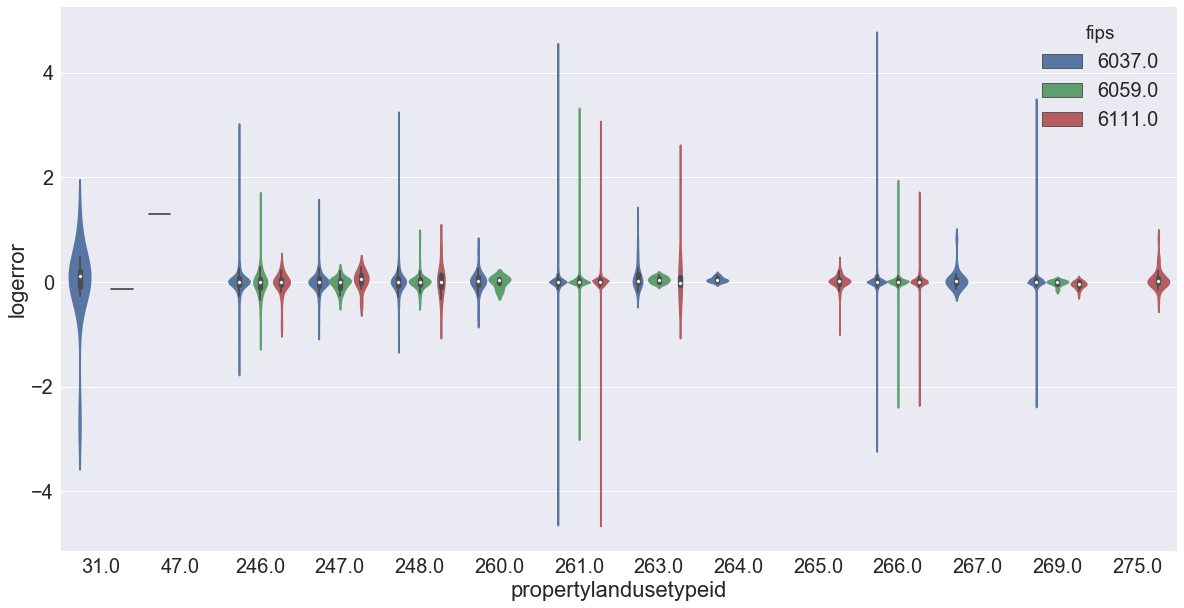

In [44]:
violinpltpropertylandusetypeid(data_2016)

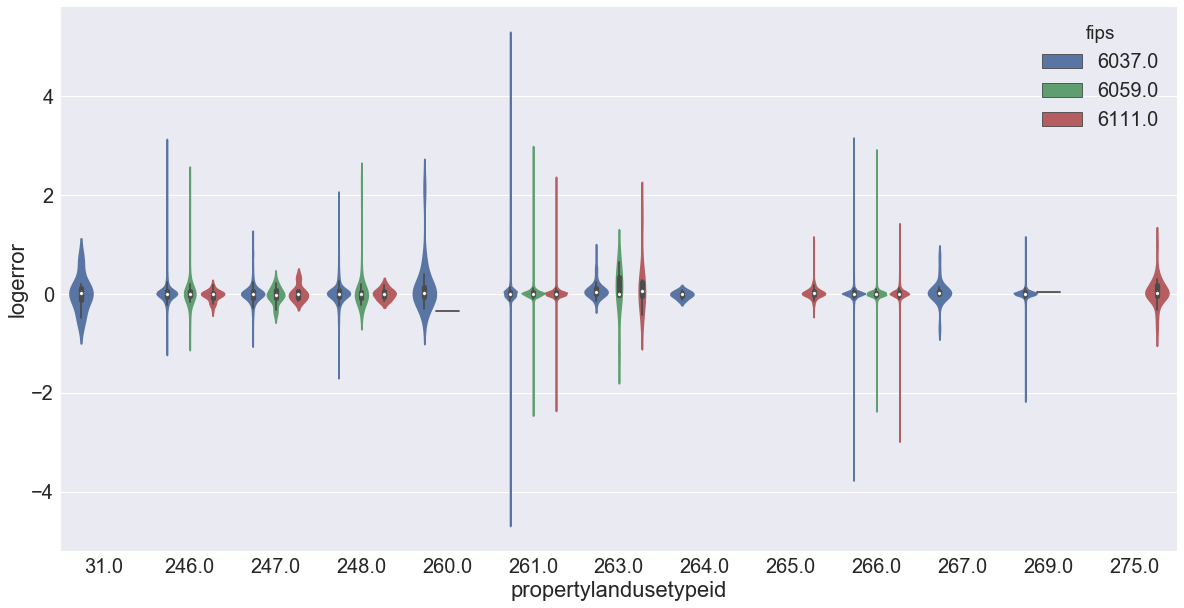

In [45]:
violinpltpropertylandusetypeid(data_2017)

#### Box plot

In [49]:
def boxPlotCatagoricalData(yearValue):
    plt.figure(figsize=(30,12))
    sns.boxplot(x="propertycountylandusecode", y="logerror", data=yearValue);
    plt.ylabel('Log error', fontsize=16)
    plt.xlabel('Property County Land Use Code', fontsize=16)
    plt.xticks(rotation='vertical')
    plt.title("How property county land use code changes with bathroom count?", fontsize=22)
    plt.show()

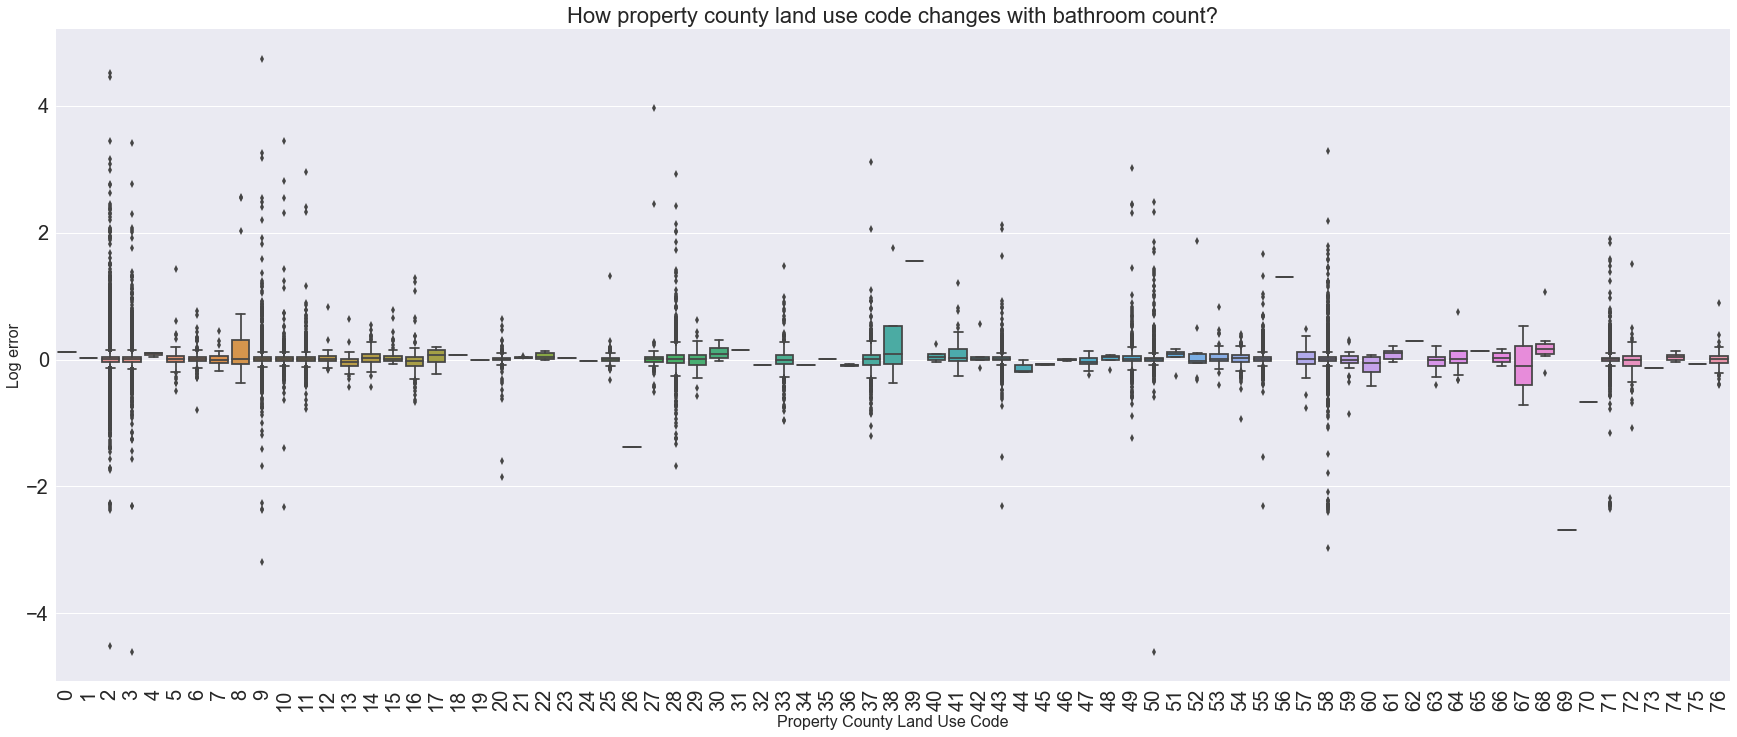

In [50]:
boxPlotCatagoricalData(data_2016)

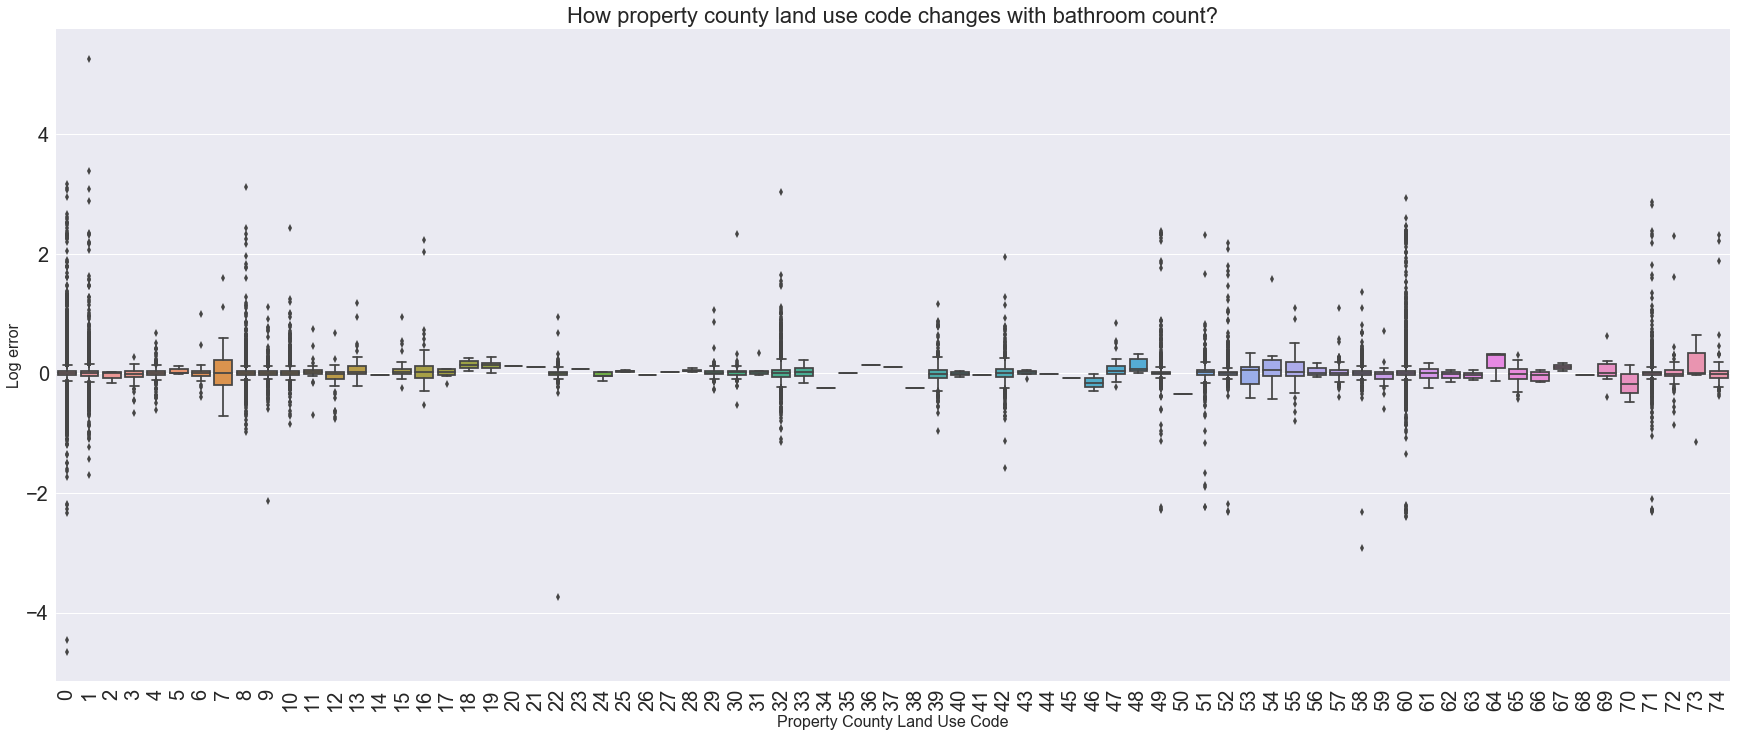

In [51]:
boxPlotCatagoricalData(data_2017)

### Correlation Between Logerror and Bedroom count

In [52]:
def violinpltBedroom(yearValue):    
    plt.figure(figsize=(20,12))
    sns.set(font_scale = 2)
    sns.violinplot(x='bedroomcnt', y='logerror', data=yearValue, hue='fips', size=1)
    plt.xlabel('Bedroom count', fontsize=12)
    plt.ylabel('Log Error', fontsize=12)
    plt.show()

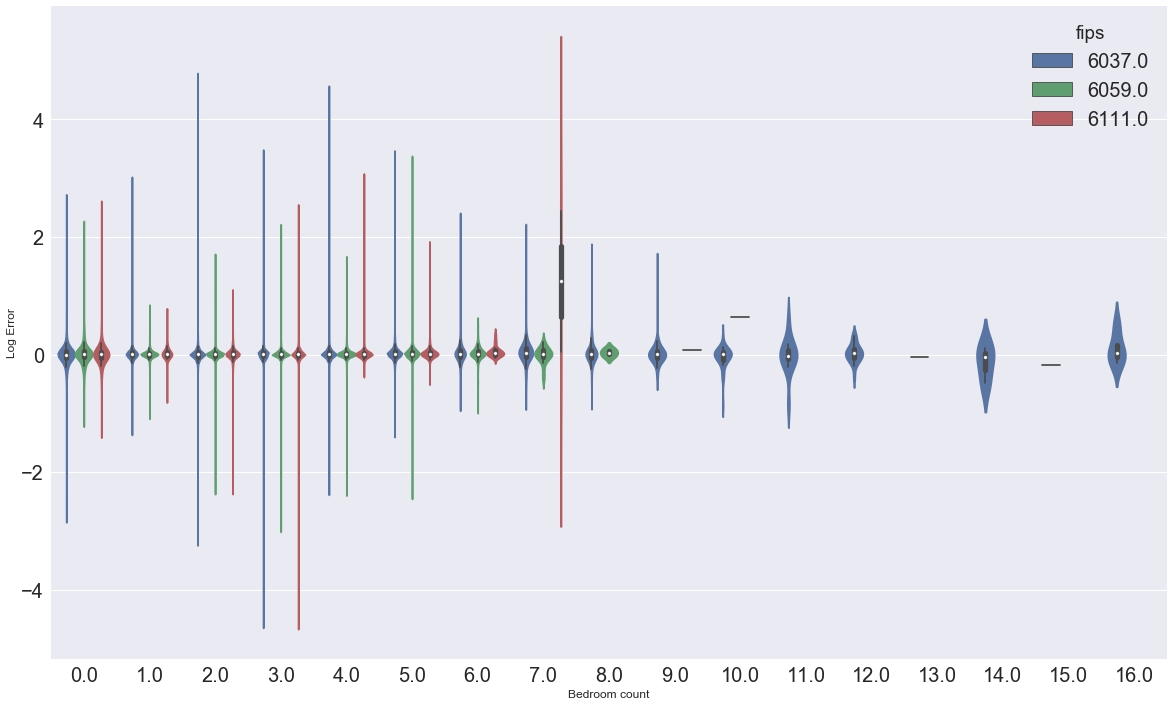

In [53]:
violinpltBedroom(data_2016)

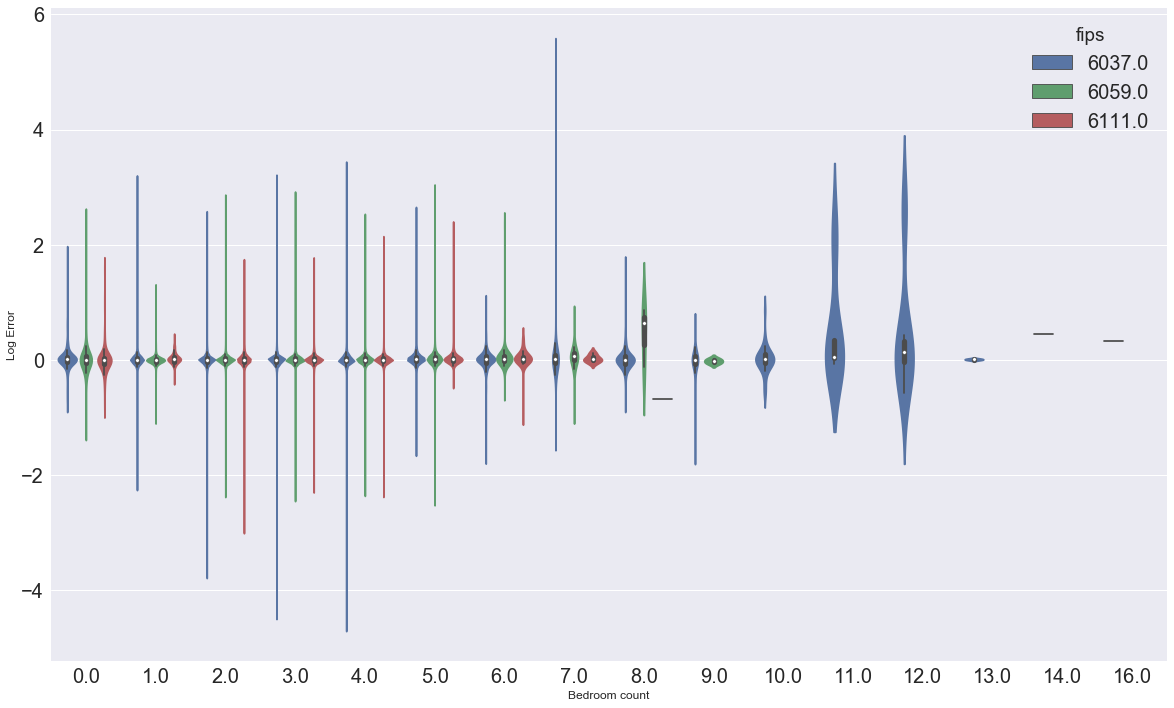

In [54]:
violinpltBedroom(data_2017)

### Correlation Between Logerror and Region County

In [55]:
def regionidcountyViolinGraph(yearValue):
    plt.figure(figsize=(20,12))
    sns.set(font_scale = 2)
    sns.violinplot(x='regionidcounty', y='logerror', data=yearValue, hue='fips', size=1)
    plt.xlabel('Region County count', fontsize=12)
    plt.ylabel('Log Error', fontsize=12)
    plt.show()

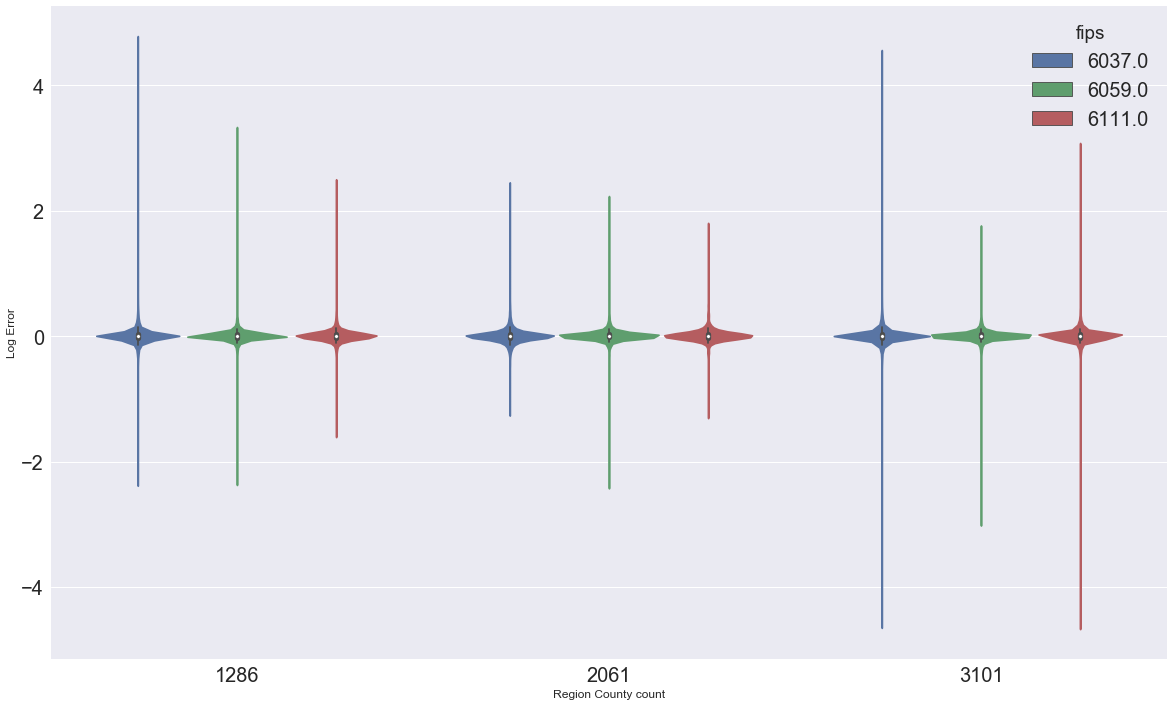

In [56]:
regionidcountyViolinGraph(data_2016)

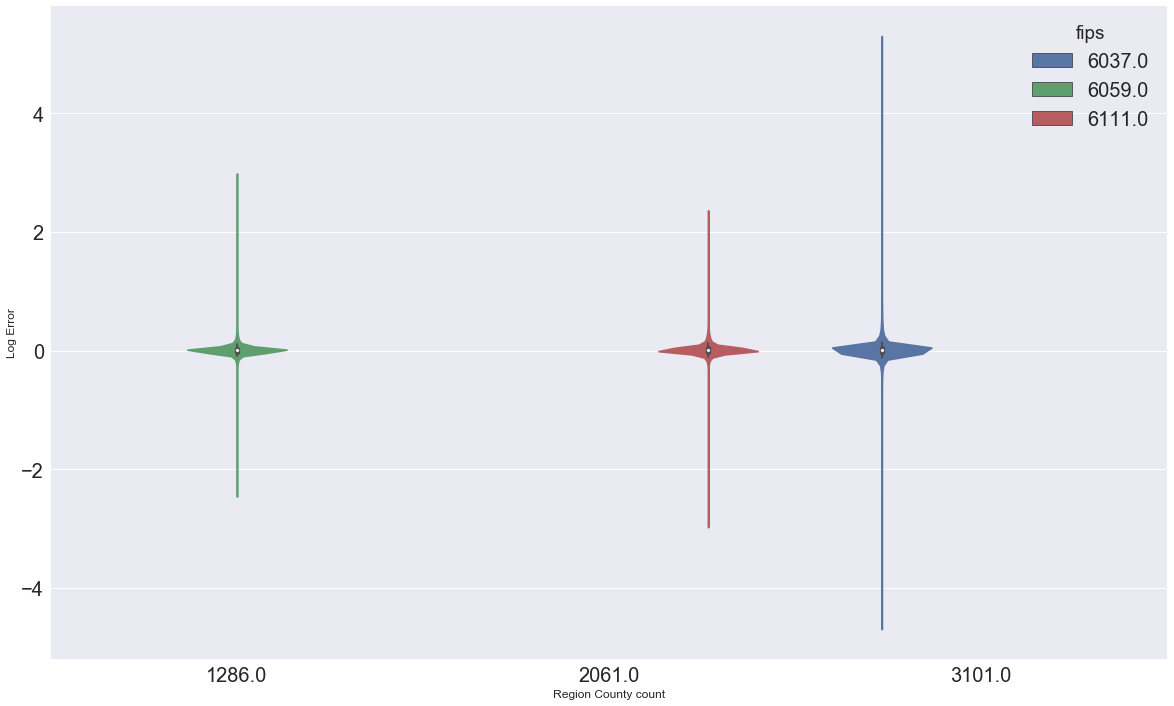

In [57]:
regionidcountyViolinGraph(data_2017)

### Correlation Between Logerror and bathroom count 

In [58]:
def bathroomcntViolinGraph(yearValue):
    plt.figure(figsize=(25,12))
    sns.set(font_scale = 2)
    sns.violinplot(x='bathroomcnt', y='logerror', data=yearValue, hue='fips', size=1)
    plt.xlabel('bathroom count', fontsize=12)
    plt.ylabel('Log Error', fontsize=12)
    plt.show()

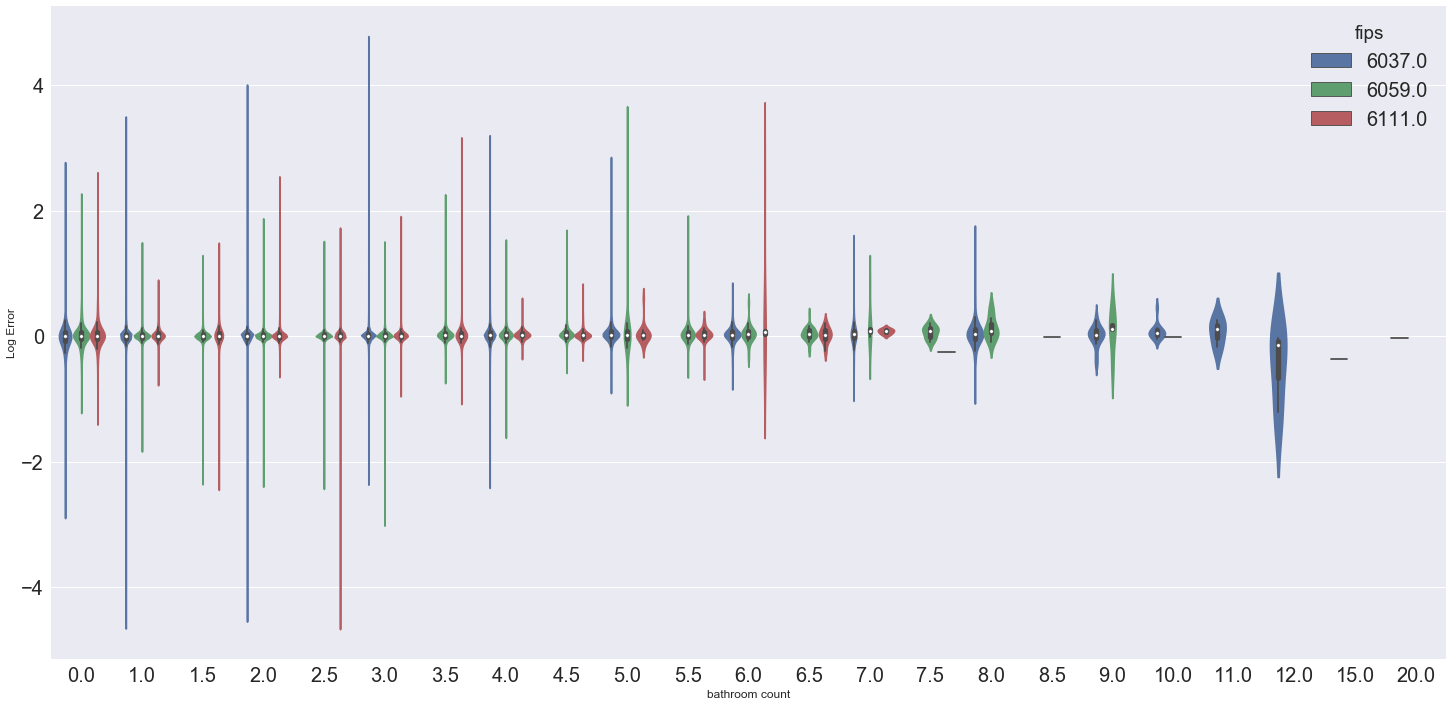

In [59]:
bathroomcntViolinGraph(data_2016)

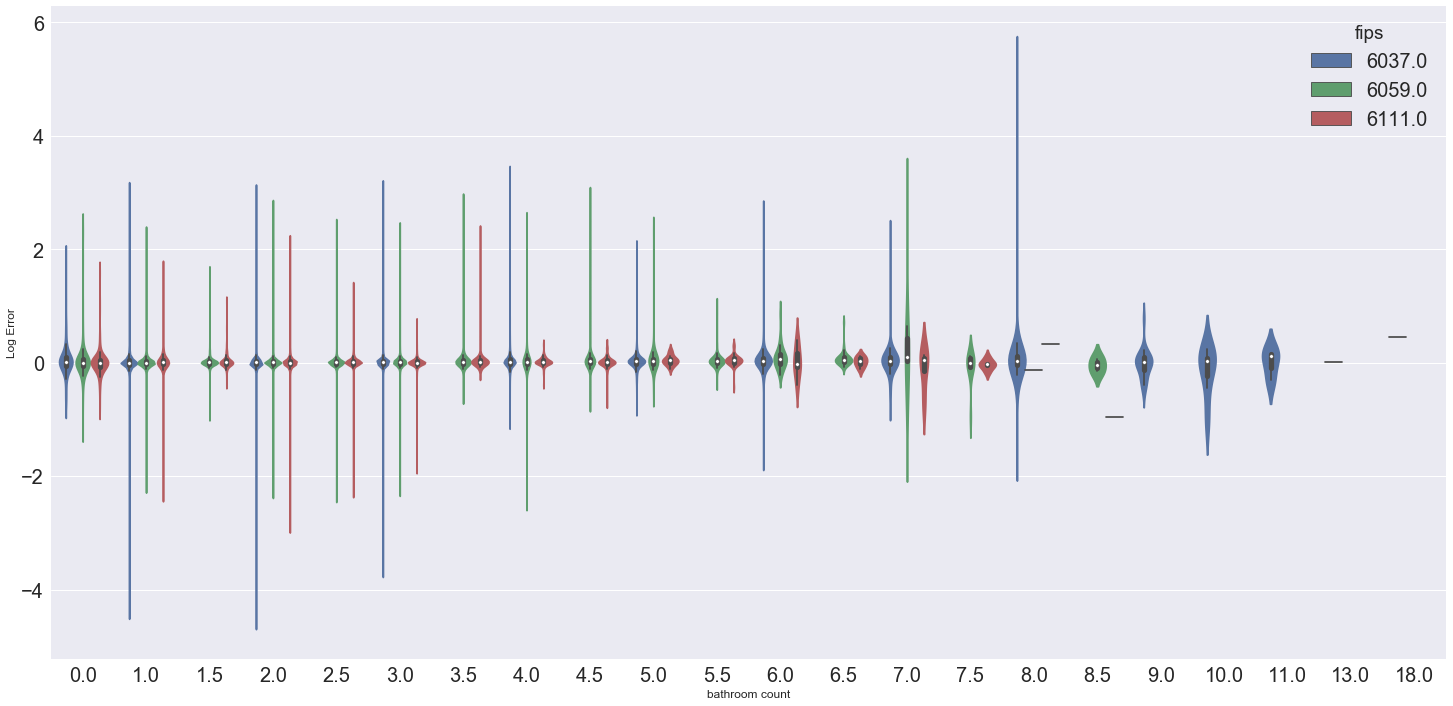

In [60]:
bathroomcntViolinGraph(data_2017)

### Correlation Between Logerror and Calculated Funished sqr feet

In [63]:
def calculatedfinishedsquarefeetViolinPlt(yearValue):
    plt.figure(figsize=(25,12))
    sns.set(font_scale = 2)
    sns.violinplot(x='calculatedfinishedsquarefeet', y='logerror', data=yearValue, hue='fips', size=1)
    plt.xlabel('Calculated Finished Square Feet', fontsize=12)
    plt.ylabel('Log Error', fontsize=12)
    plt.show()

In [64]:
calculatedfinishedsquarefeetViolinPlt(data_2016)

KeyboardInterrupt: 

In [ ]:
calculatedfinishedsquarefeetViolinPlt(data_2017)

## Each column checked for corralation against logError

In [73]:
data_2016 = pd.read_csv('DataClean_2016.csv',low_memory=False)
data_2017 = pd.read_csv('DataClean_2017.csv',low_memory=False)

In [74]:
def correlationGraphPerColumnOne(yearValue):
    fig  = plt.figure(figsize=(9, 9), dpi=100);
    sns.set(font_scale = 1)

    axes1 = fig.add_subplot(331); axes2 = fig.add_subplot(332); axes3 = fig.add_subplot(333); 
    axes4 = fig.add_subplot(334); axes5 = fig.add_subplot(335); axes6 = fig.add_subplot(336); 
    axes7 = fig.add_subplot(337); axes8 = fig.add_subplot(338); axes9 = fig.add_subplot(339); 

    sns.regplot(x='fips', y='logerror', data=yearValue, ax=axes1, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
    sns.regplot(x='propertylandusetypeid', y='logerror', data=yearValue, ax=axes2, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
    sns.regplot(x='rawcensustractandblock', y='logerror', data=yearValue, ax=axes3, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
    sns.regplot(x='regionidcounty', y='logerror', data=yearValue, ax=axes4, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
    sns.regplot(x='longitude', y='logerror', data=yearValue, ax=axes5, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
    sns.regplot(x='latitude', y='logerror', data=yearValue, ax=axes6, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
    sns.regplot(x='assessmentyear', y='logerror', data=yearValue, ax=axes7, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
    sns.regplot(x='bedroomcnt', y='logerror', data=yearValue, ax=axes8, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
    sns.regplot(x='bathroomcnt', y='logerror', data=yearValue, ax=axes9, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});

    axes9.set_xlim(0, 30)

    fig.tight_layout();
    plt.show()

In [75]:
correlationGraphPerColumnOne(data_2016)

KeyboardInterrupt: 

In [ ]:
correlationGraphPerColumnOne(data_2017)

In [ ]:
def correlationGraphPerColumnTwo(yearValue):
    fig  = plt.figure(figsize=(12, 12), dpi=100);
    sns.set(font_scale = 1)


    axes1 = fig.add_subplot(331); axes2 = fig.add_subplot(332); axes3 = fig.add_subplot(333); 
    axes4 = fig.add_subplot(334); axes5 = fig.add_subplot(335); axes6 = fig.add_subplot(336); 
    axes7 = fig.add_subplot(337); axes8 = fig.add_subplot(338); 

    sns.regplot(x='landtaxvaluedollarcnt', y='logerror', data=yearValue, ax=axes1, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
    sns.regplot(x='regionidzip', y='logerror', data=yearValue, ax=axes2, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
    sns.regplot(x='taxamount', y='logerror', data=yearValue, ax=axes3, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
    sns.regplot(x='taxvaluedollarcnt', y='logerror', data=yearValue, ax=axes4, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
    sns.regplot(x='structuretaxvaluedollarcnt', y='logerror', data=yearValue, ax=axes5, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
    sns.regplot(x='calculatedfinishedsquarefeet', y='logerror', data=yearValue, ax=axes6, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
    sns.regplot(x='yearbuilt', y='logerror', data=yearValue, ax=axes7, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
    sns.regplot(x='regionidcity', y='logerror', data=yearValue, ax=axes8, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});

    axes8.set_xlim(0, 30)

    fig.tight_layout();
    plt.show()

In [ ]:
correlationGraphPerColumnTwo(data_2016)

In [ ]:
correlationGraphPerColumnTwo(data_2017)

In [ ]:
def correlationGraphPerColumnThree(yearValue):
    fig  = plt.figure(figsize=(9, 9), dpi=100);
    sns.set(font_scale = 1)

    axes1 = fig.add_subplot(331); axes2 = fig.add_subplot(332); axes3 = fig.add_subplot(333); 
    axes4 = fig.add_subplot(334); axes5 = fig.add_subplot(335); axes6 = fig.add_subplot(336); 

    sns.regplot(x='landtaxvaluedollarcnt', y='logerror', data=yearValue, ax=axes1, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
    sns.regplot(x='censustractandblock', y='logerror', data=yearValue, ax=axes2, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
    sns.regplot(x='fullbathcnt', y='logerror', data=yearValue, ax=axes3, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
    sns.regplot(x='calculatedbathnbr', y='logerror', data=yearValue, ax=axes4, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
    sns.regplot(x='finishedsquarefeet12', y='logerror', data=yearValue, ax=axes5, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
    sns.regplot(x='lotsizesquarefeet', y='logerror', data=yearValue, ax=axes6, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});

    axes6.set_xlim(0, 30)

    fig.tight_layout();
    plt.show()

In [ ]:
correlationGraphPerColumnThree(data_2016)

In [ ]:
correlationGraphPerColumnThree(data_2017)

# Joint Plot for all columns

### Shows the distribution of each variable and also the corralation

In [78]:
def jointDistribution(yearValue):
    colName = selectedColumnForYear(yearValue)
    for col in colName:
        print(col)
        plt.figure(figsize=(12,12), dpi=100)
        sns.set(font_scale = 1)
        sns.jointplot(x=col, y='logerror', data=yearValue, size=12, color=color[5]);
        plt.show()

Unnamed: 0


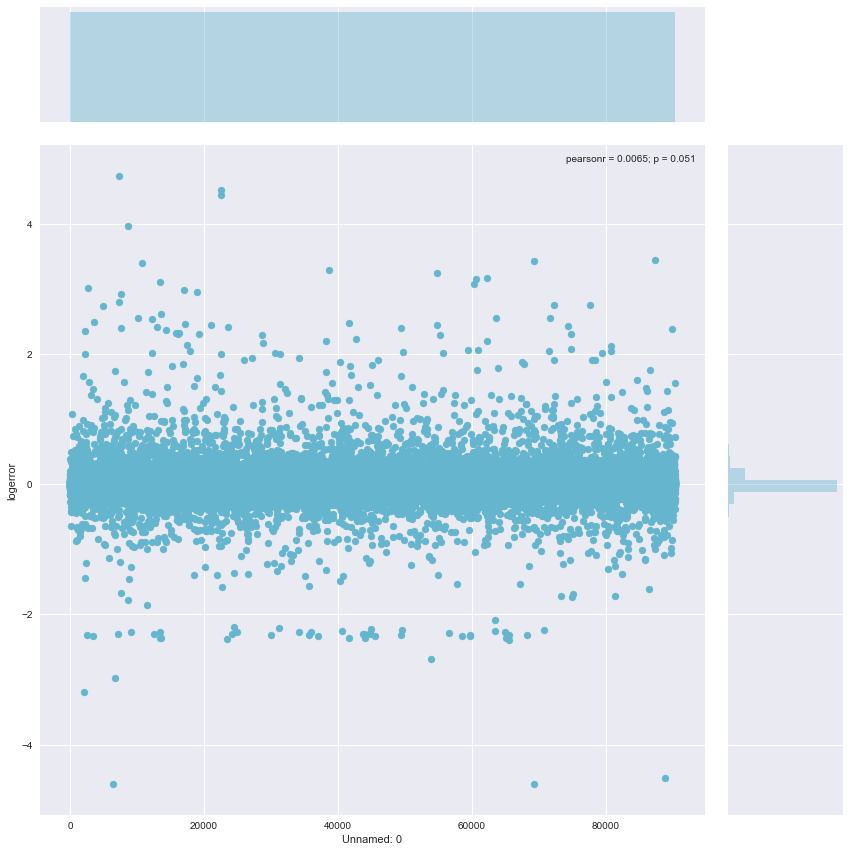

fips


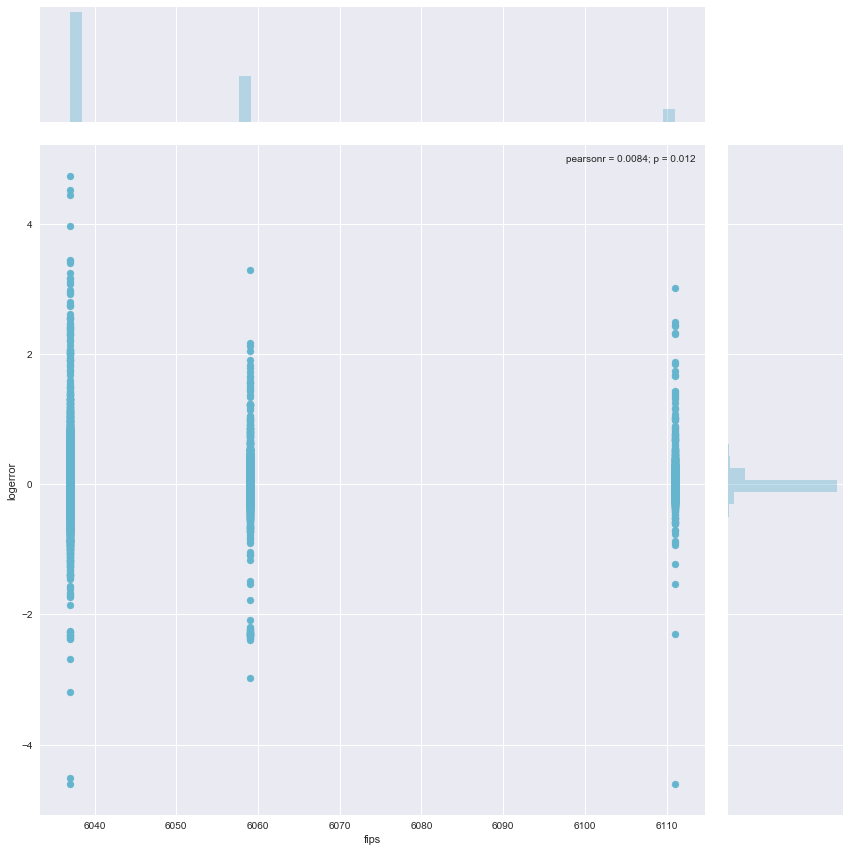

propertylandusetypeid


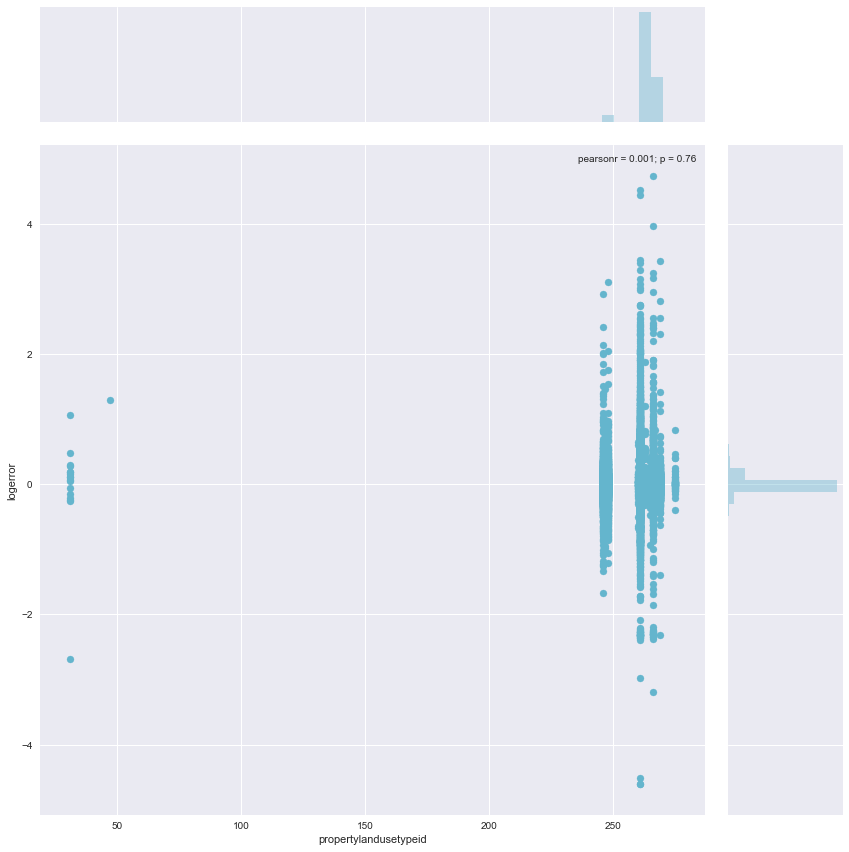

rawcensustractandblock


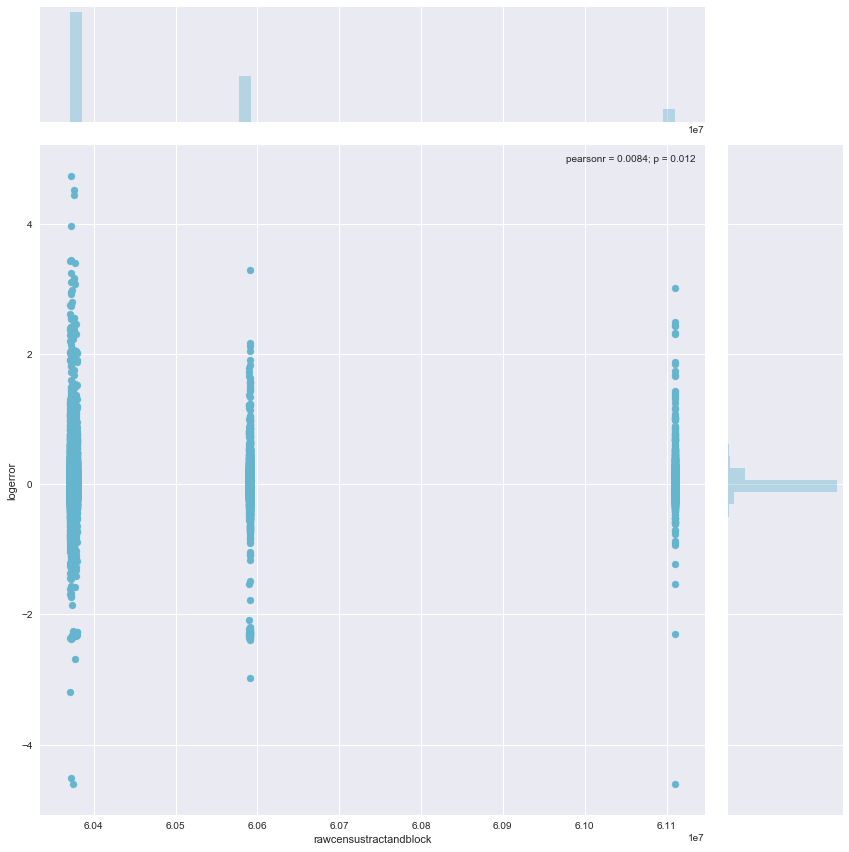

regionidcounty


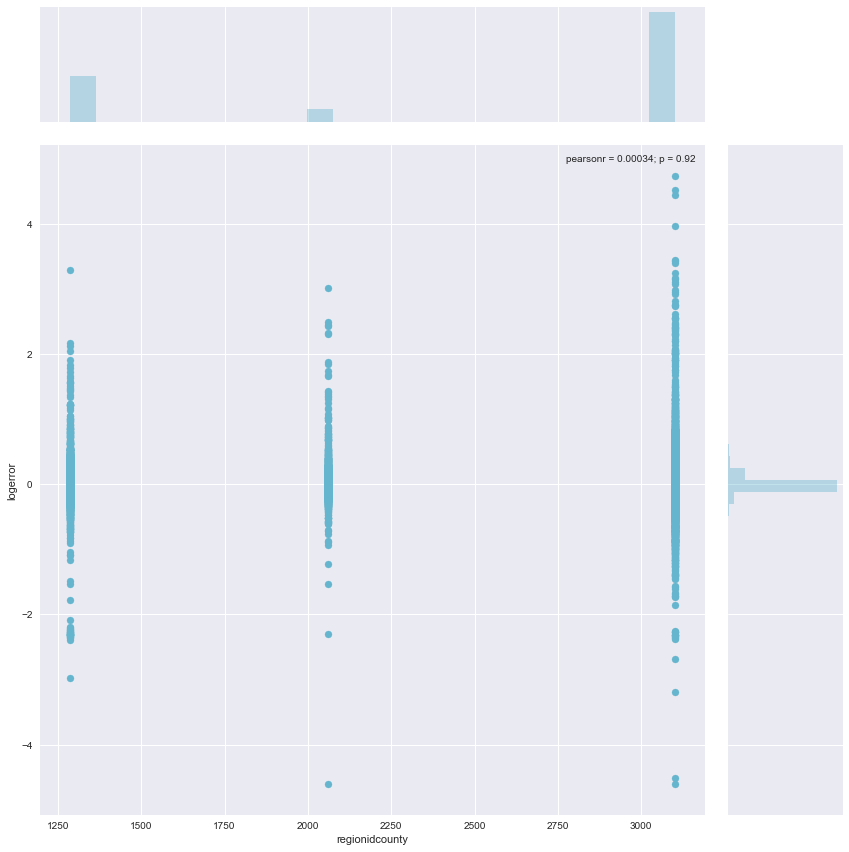

longitude


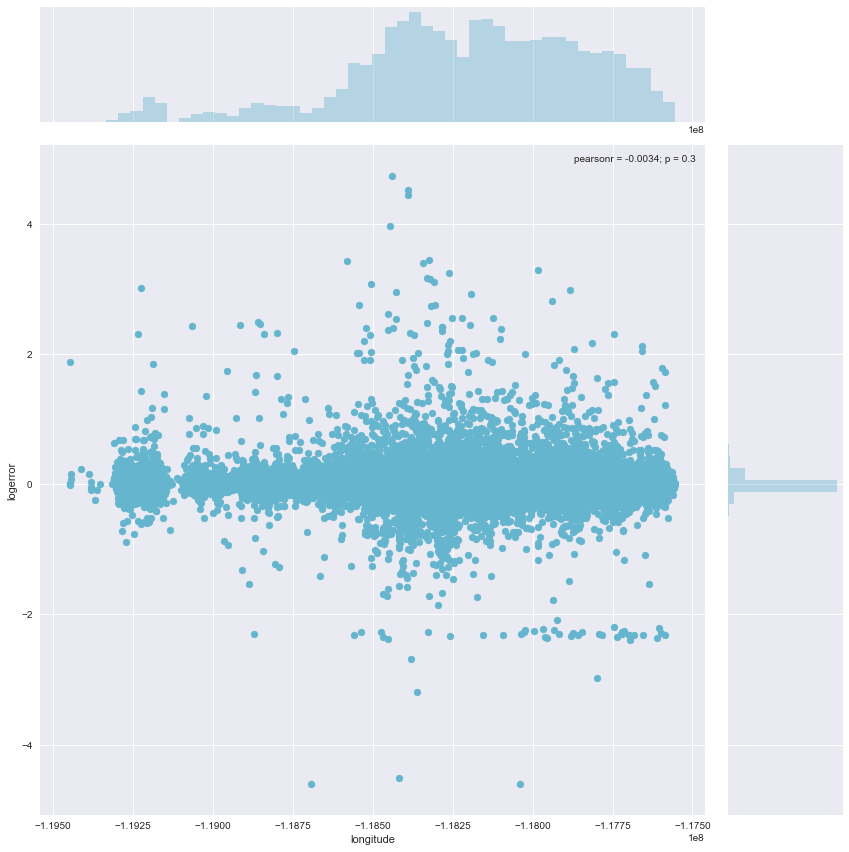

latitude


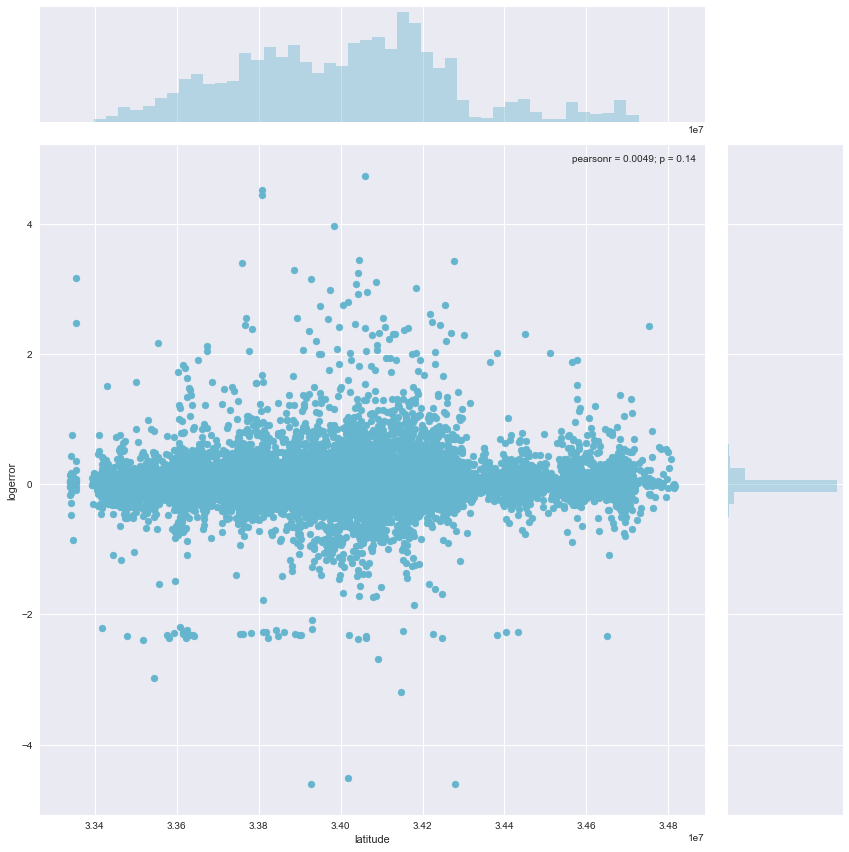

assessmentyear


C:\Users\madhu\Anaconda3\lib\site-packages\scipy\stats\stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
C:\Users\madhu\Anaconda3\lib\site-packages\scipy\stats\stats.py:5277: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


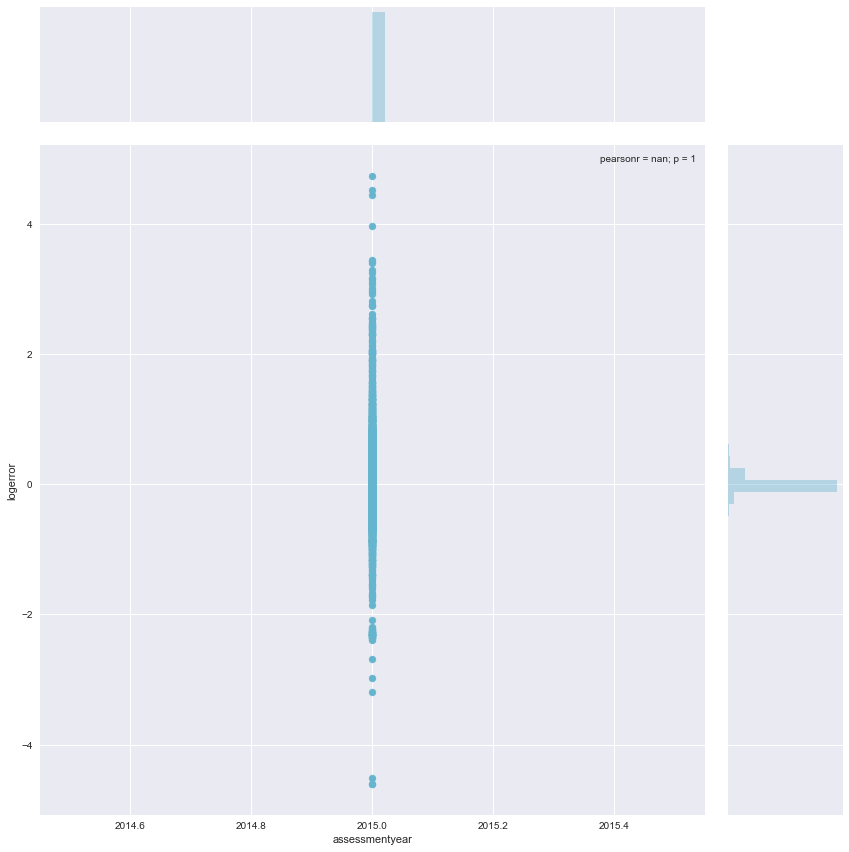

bedroomcnt


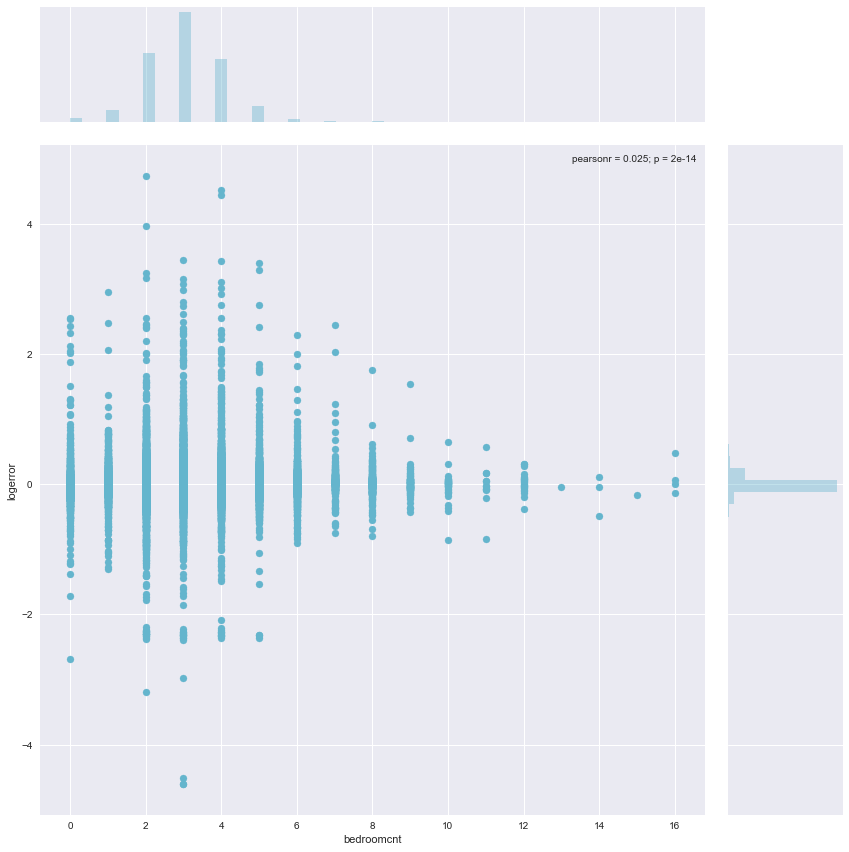

bathroomcnt


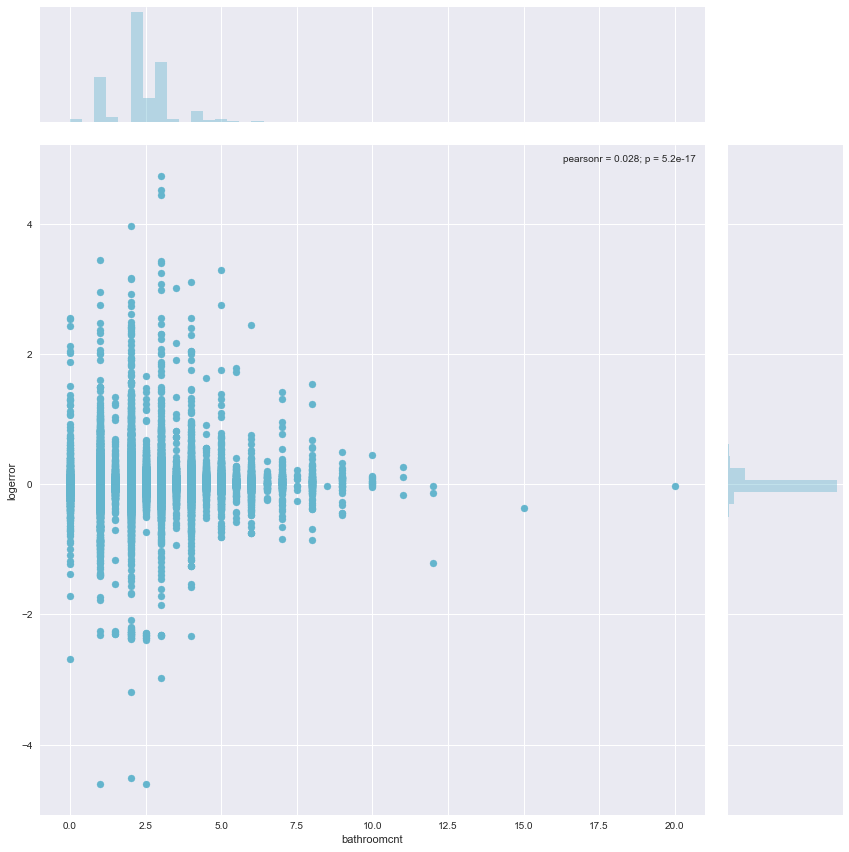

roomcnt


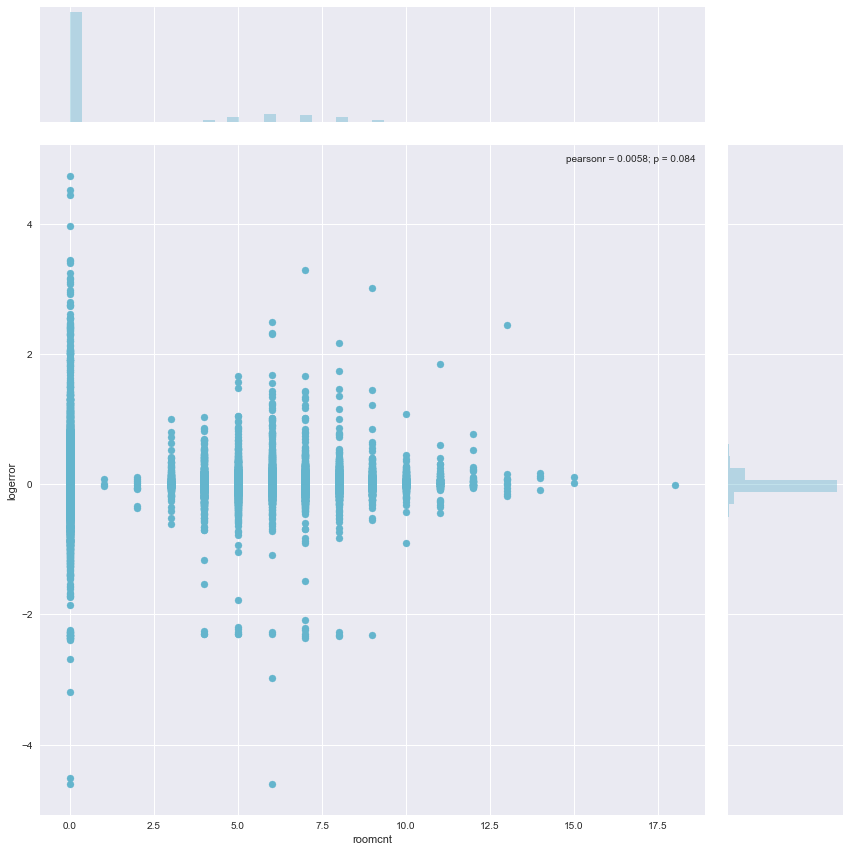

regionidzip


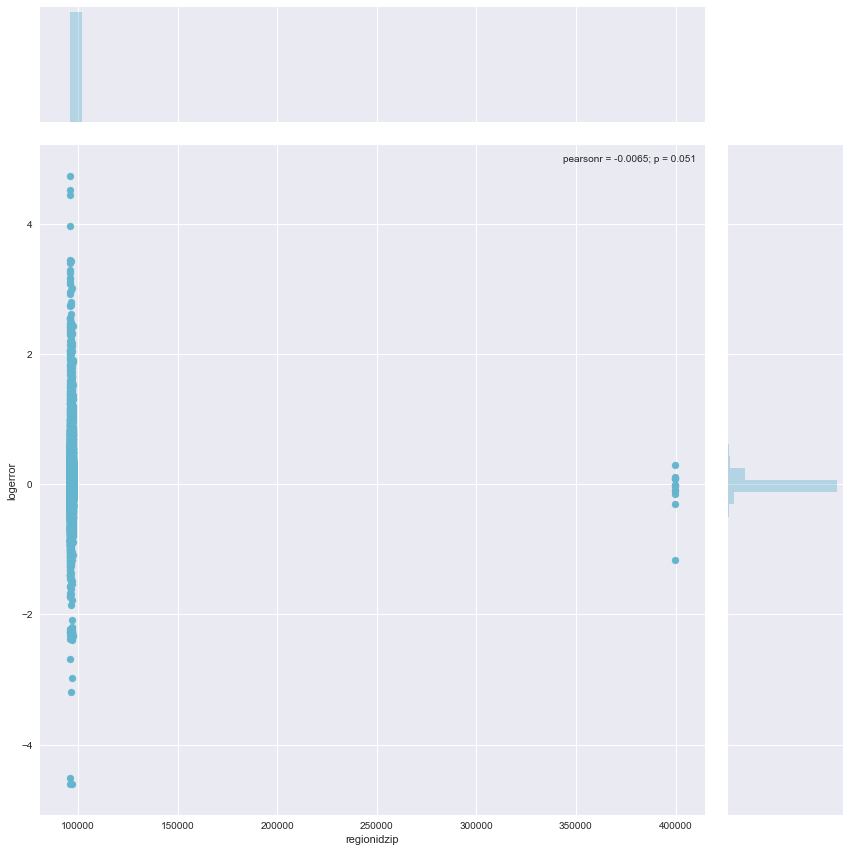

taxamount


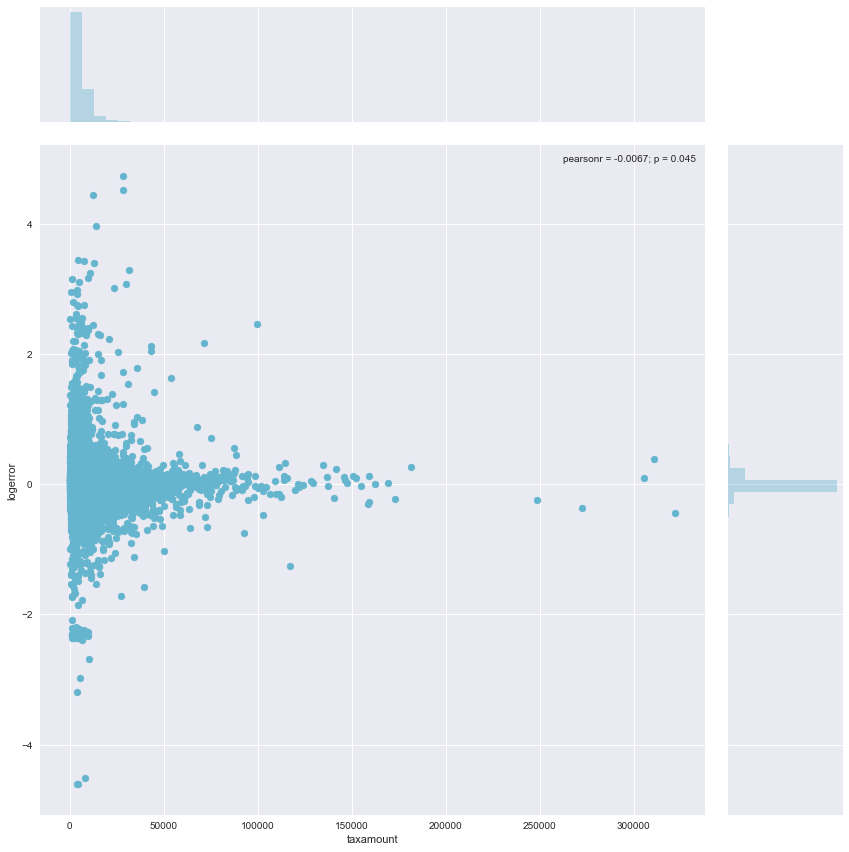

taxvaluedollarcnt


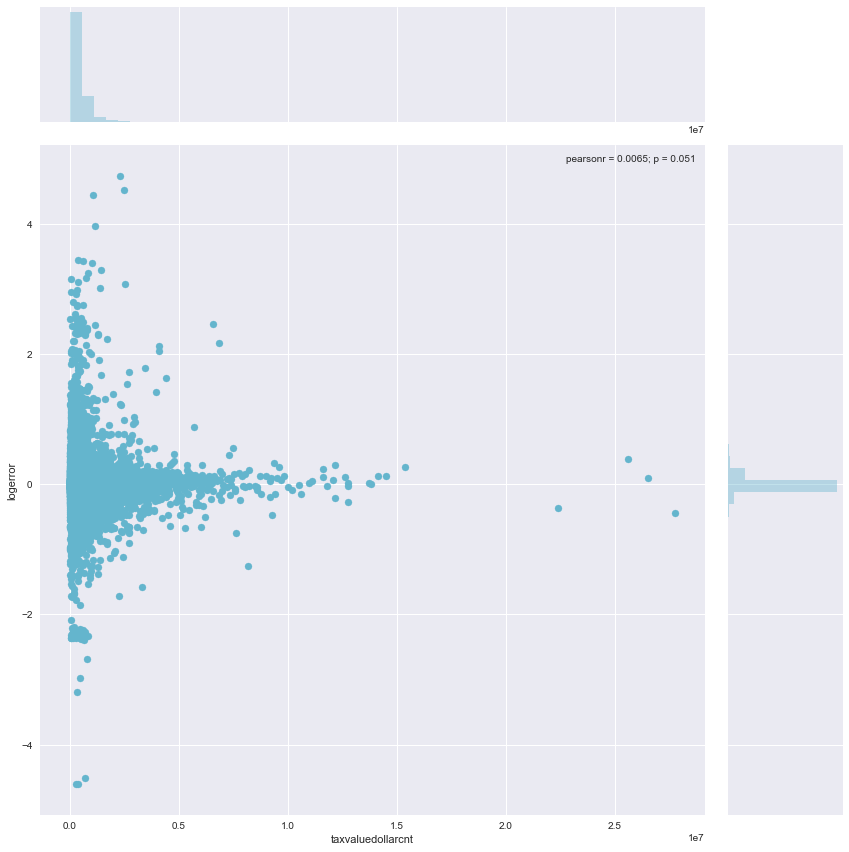

structuretaxvaluedollarcnt


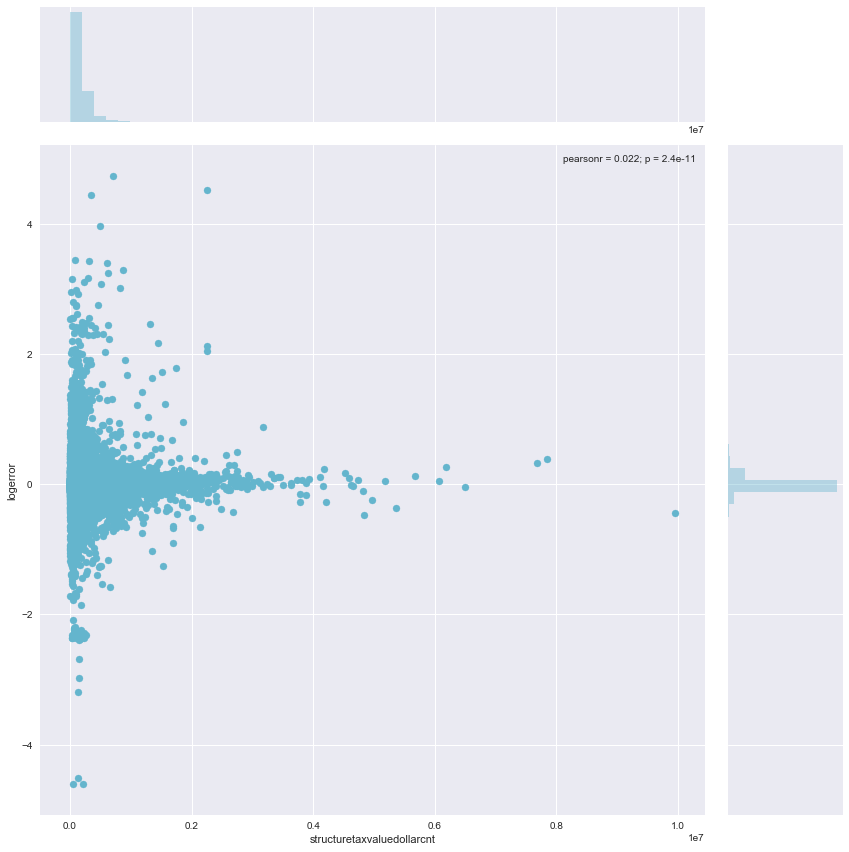

calculatedfinishedsquarefeet


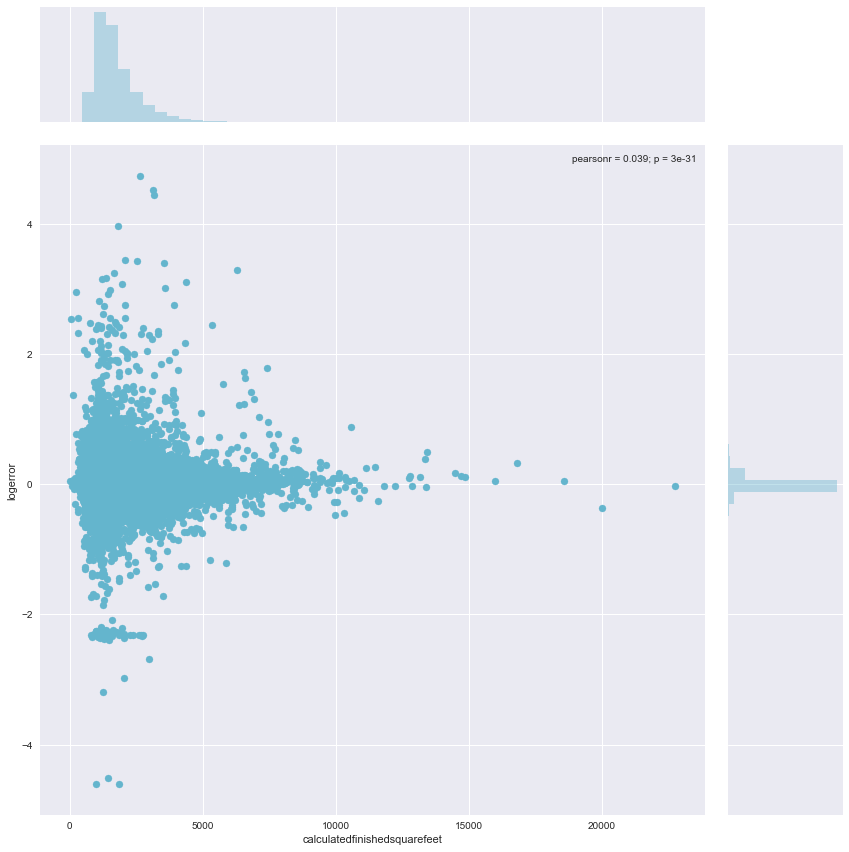

yearbuilt


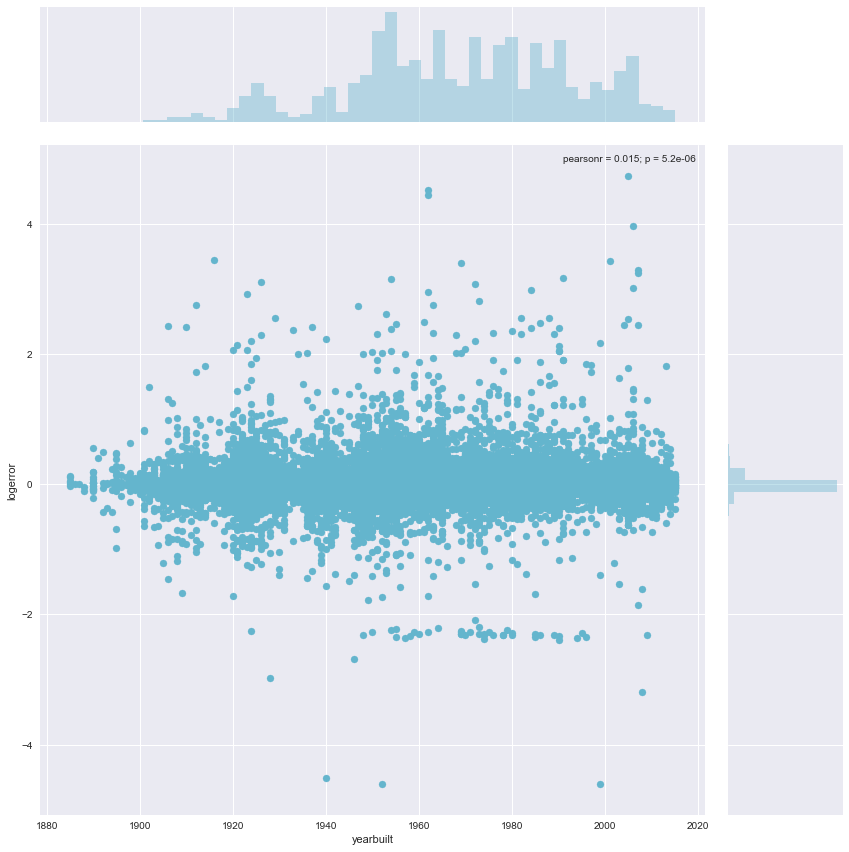

regionidcity


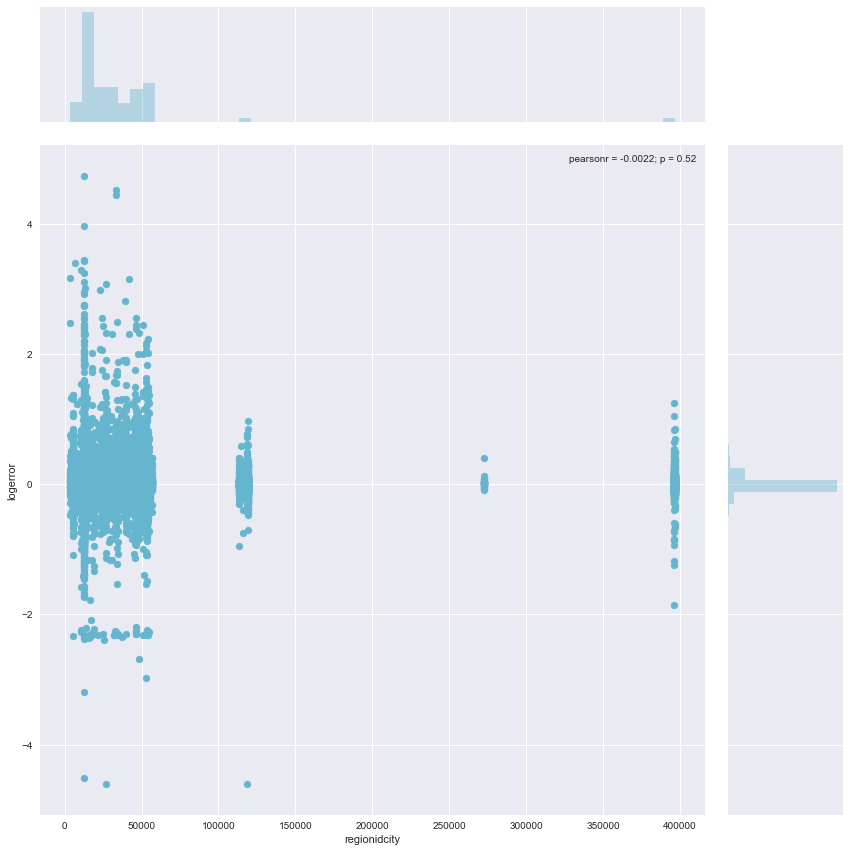

landtaxvaluedollarcnt


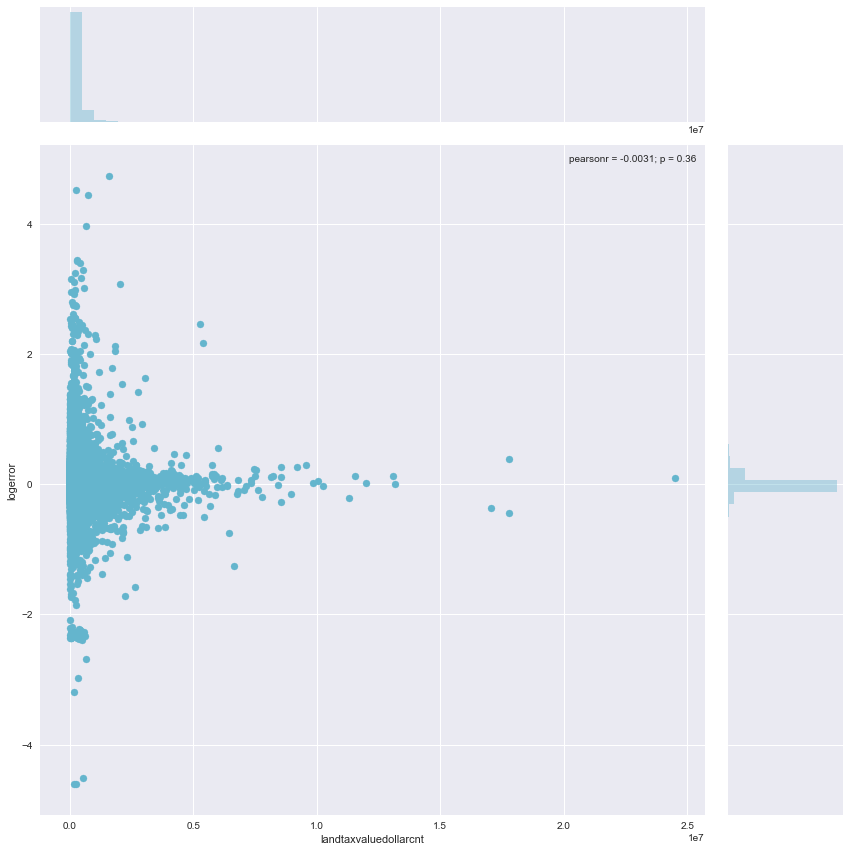

censustractandblock


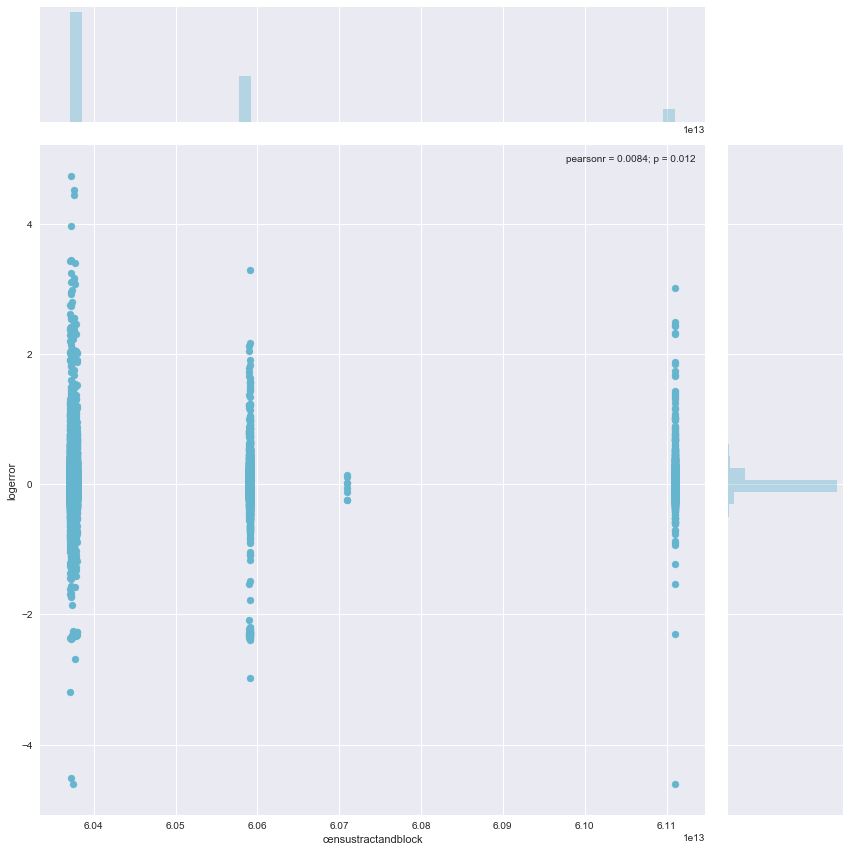

lotsizesquarefeet


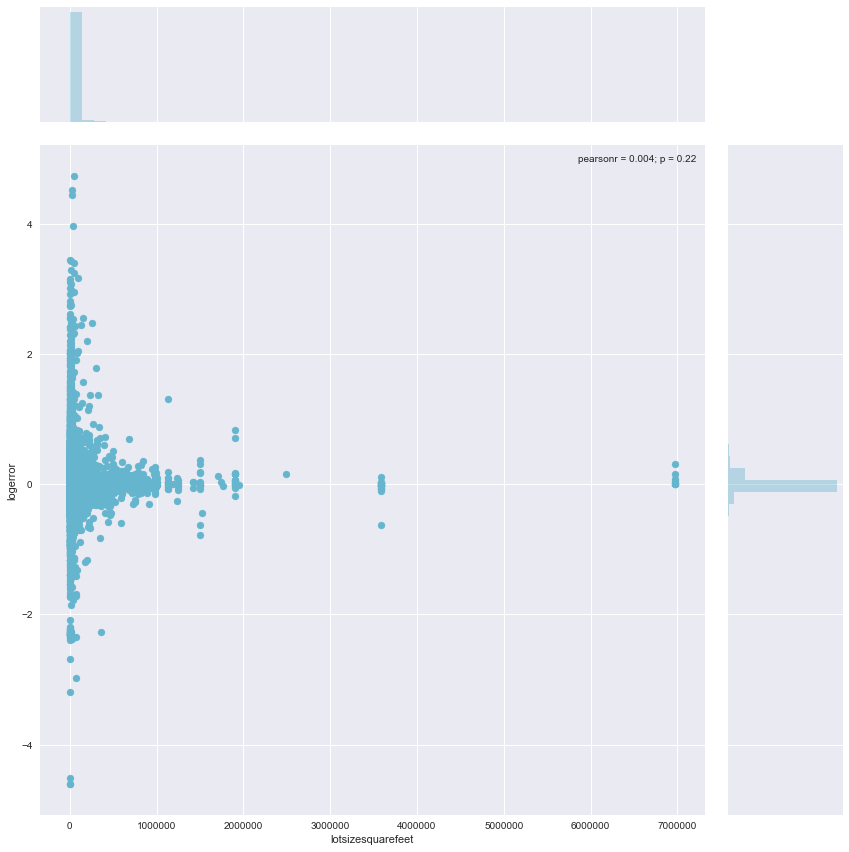

age


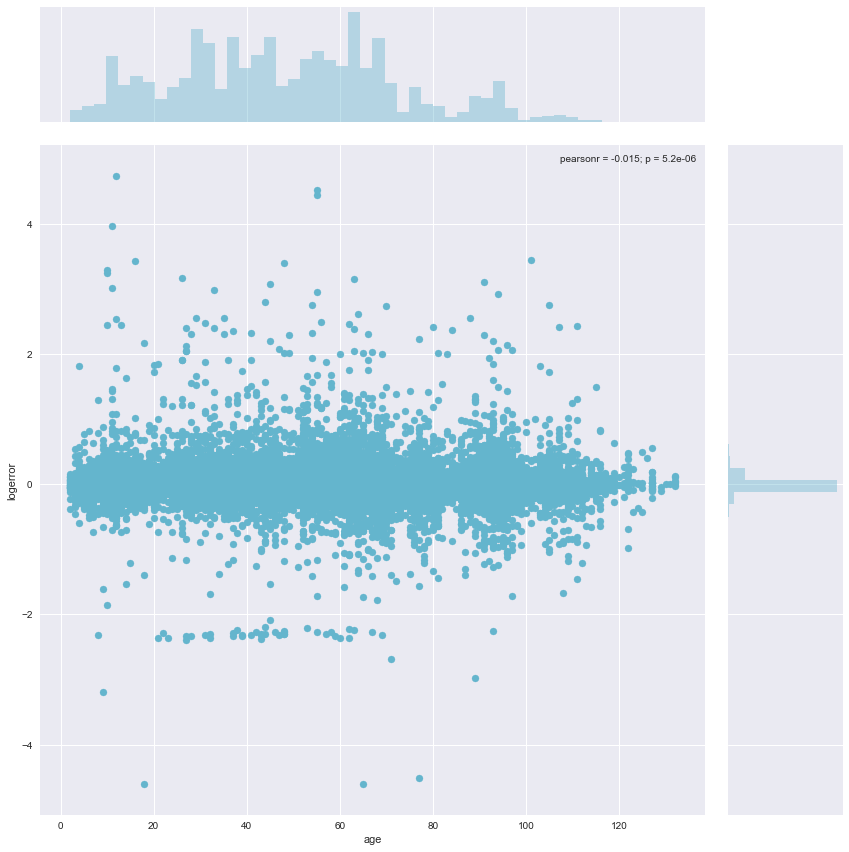

In [79]:
jointDistribution(data_2016)

Unnamed: 0


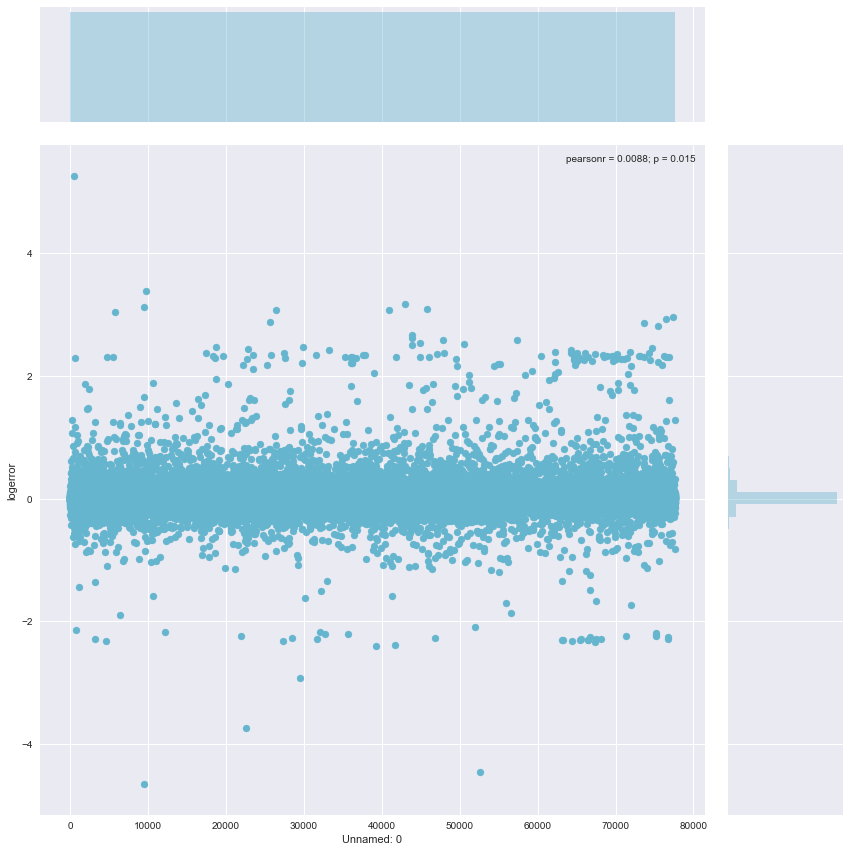

fips


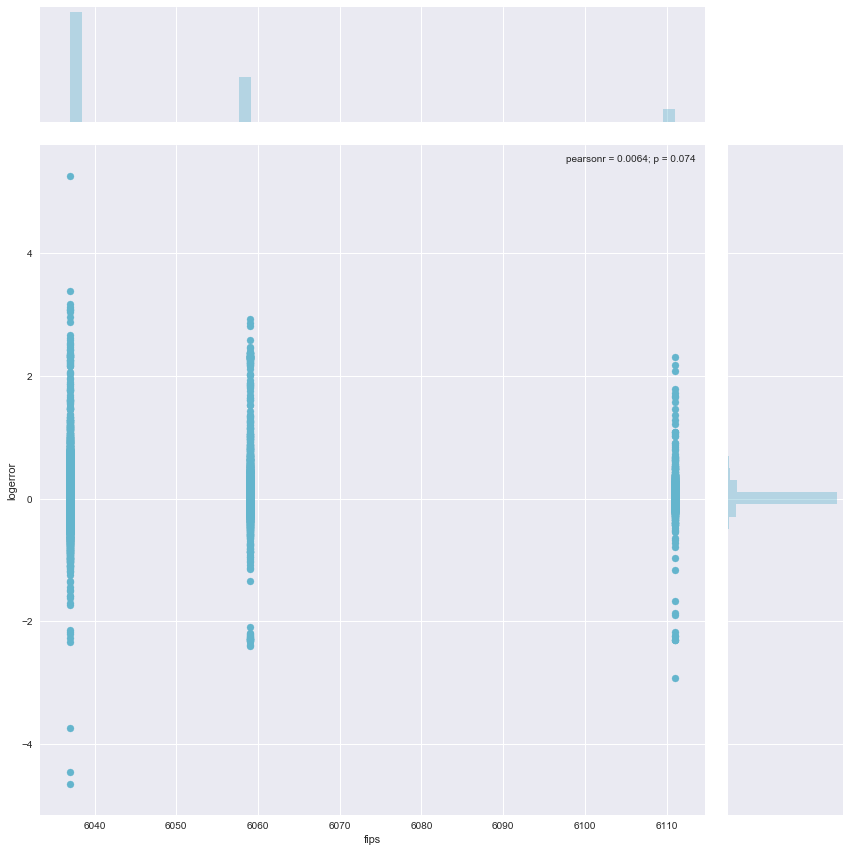

propertylandusetypeid


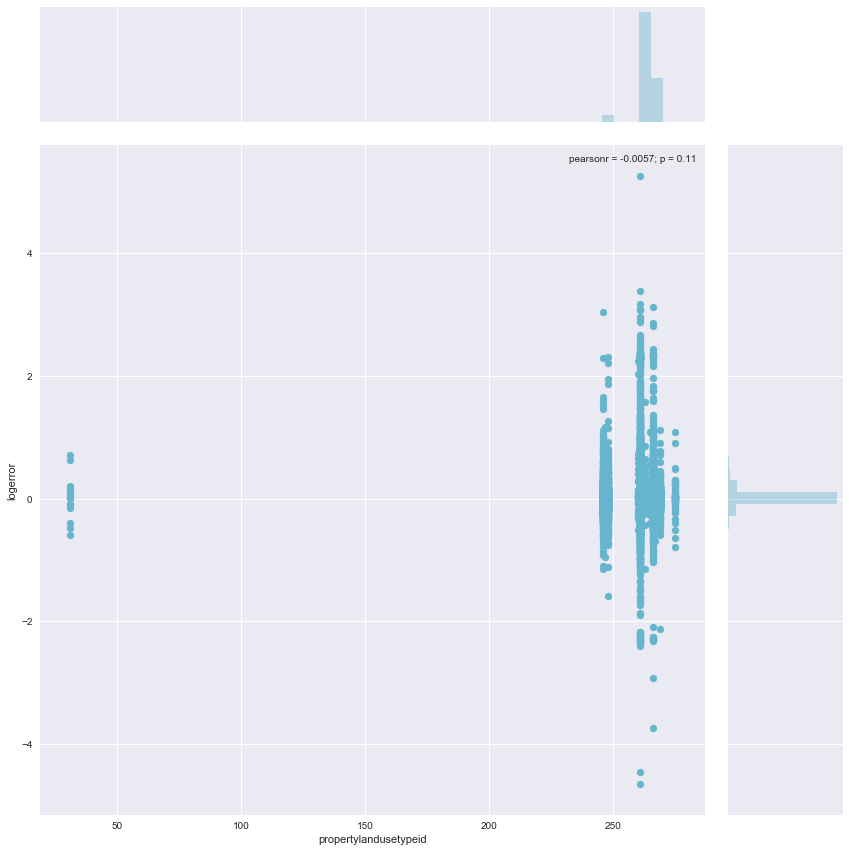

rawcensustractandblock


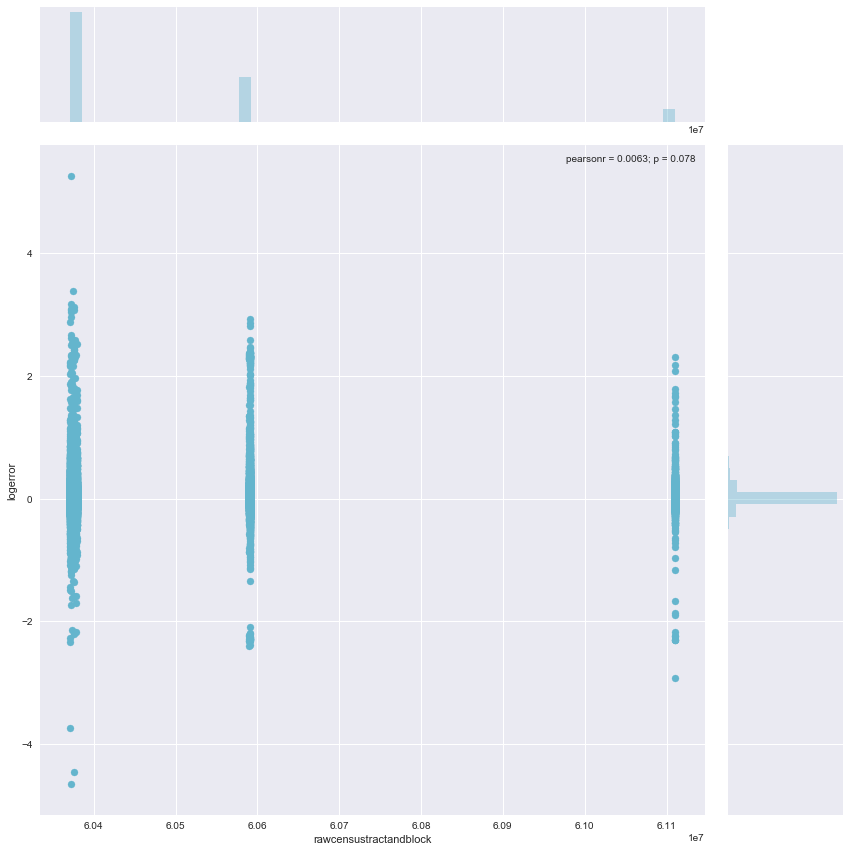

regionidcounty


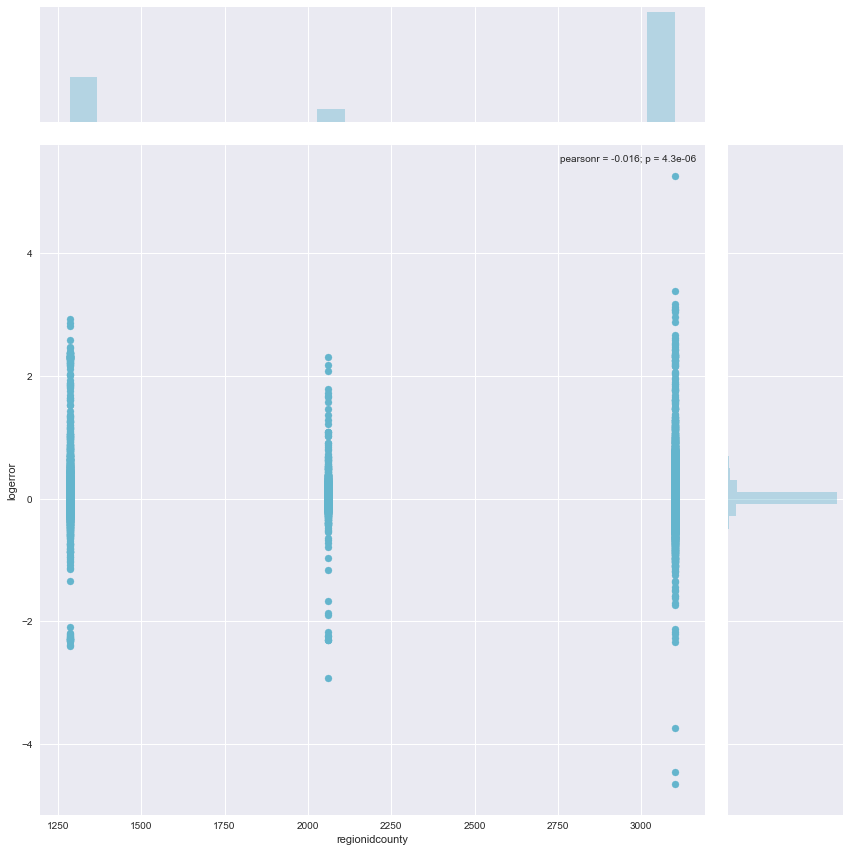

longitude


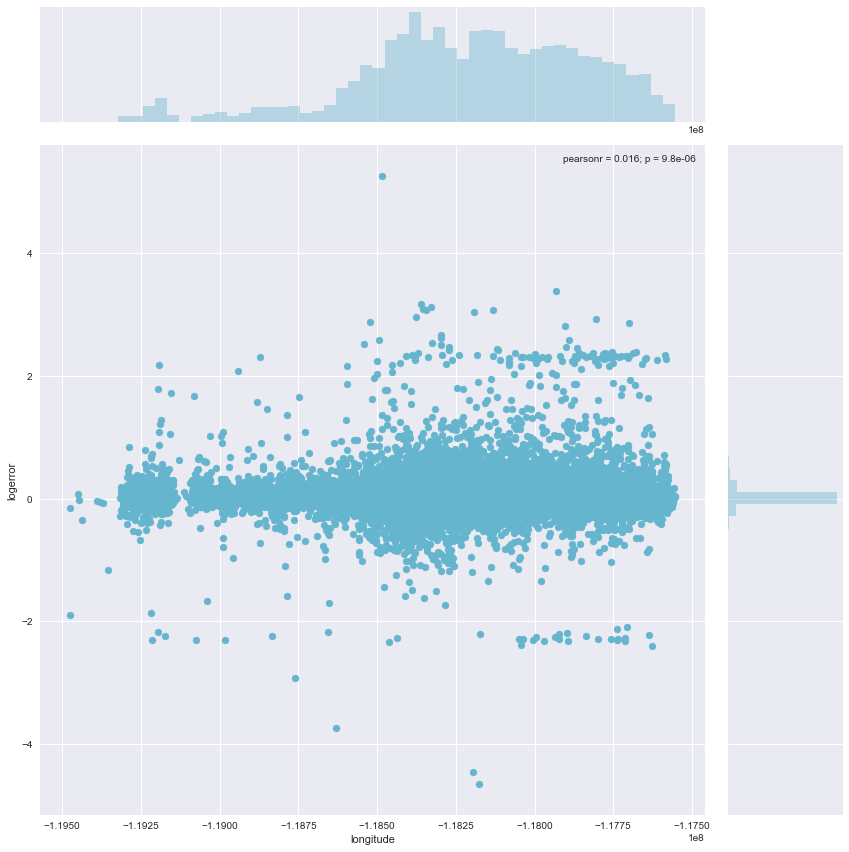

latitude


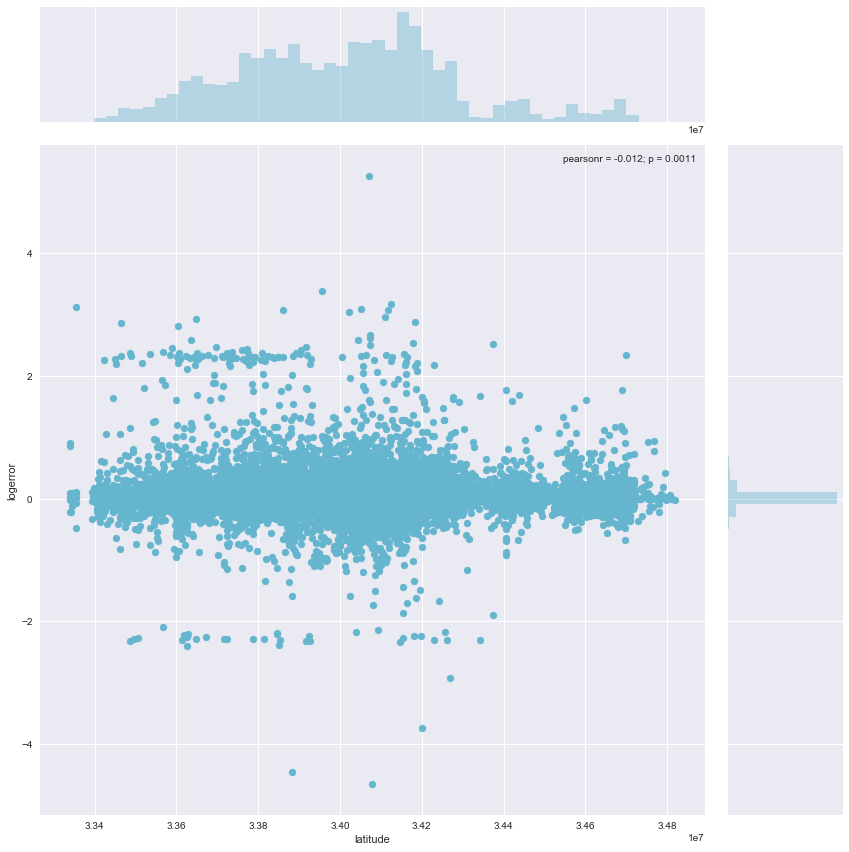

assessmentyear


C:\Users\madhu\Anaconda3\lib\site-packages\scipy\stats\stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
C:\Users\madhu\Anaconda3\lib\site-packages\scipy\stats\stats.py:5277: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


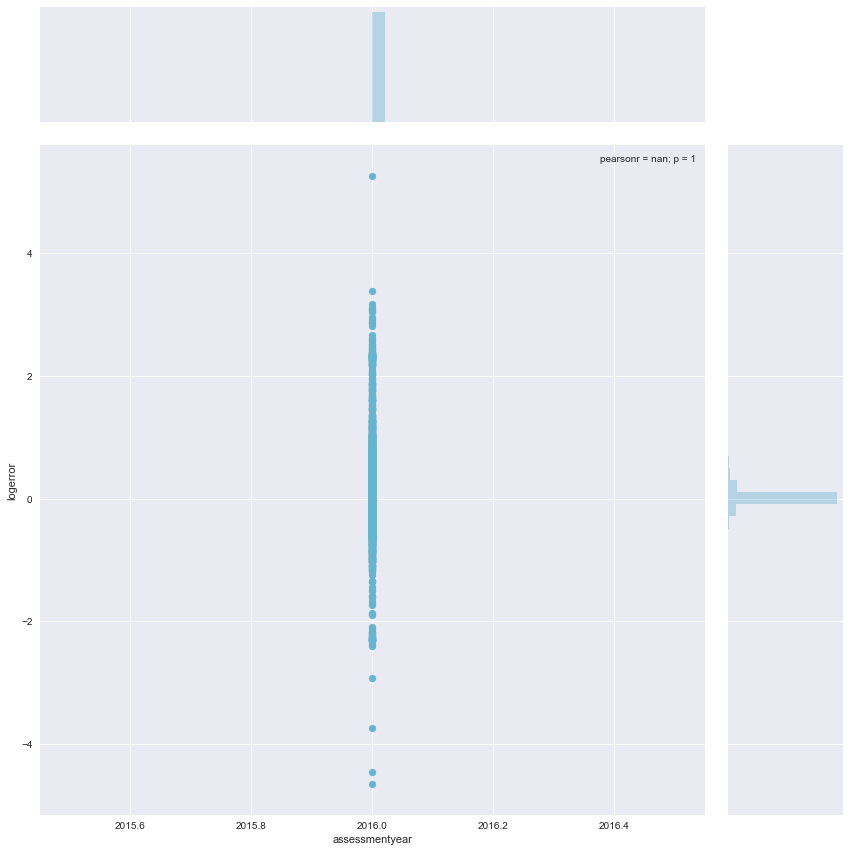

bedroomcnt


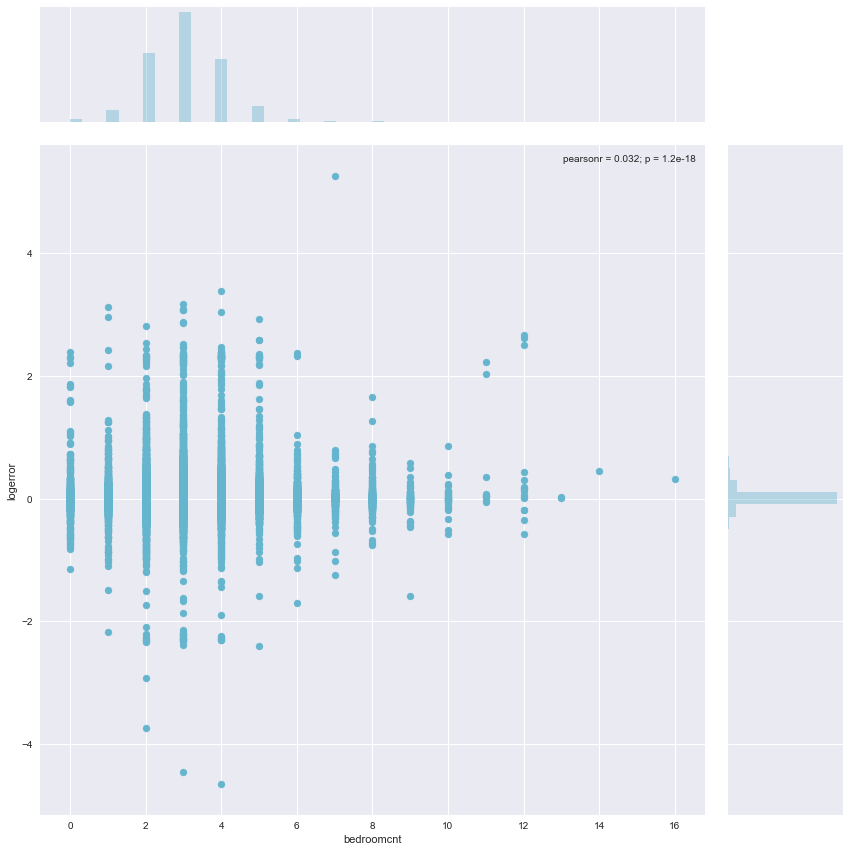

bathroomcnt


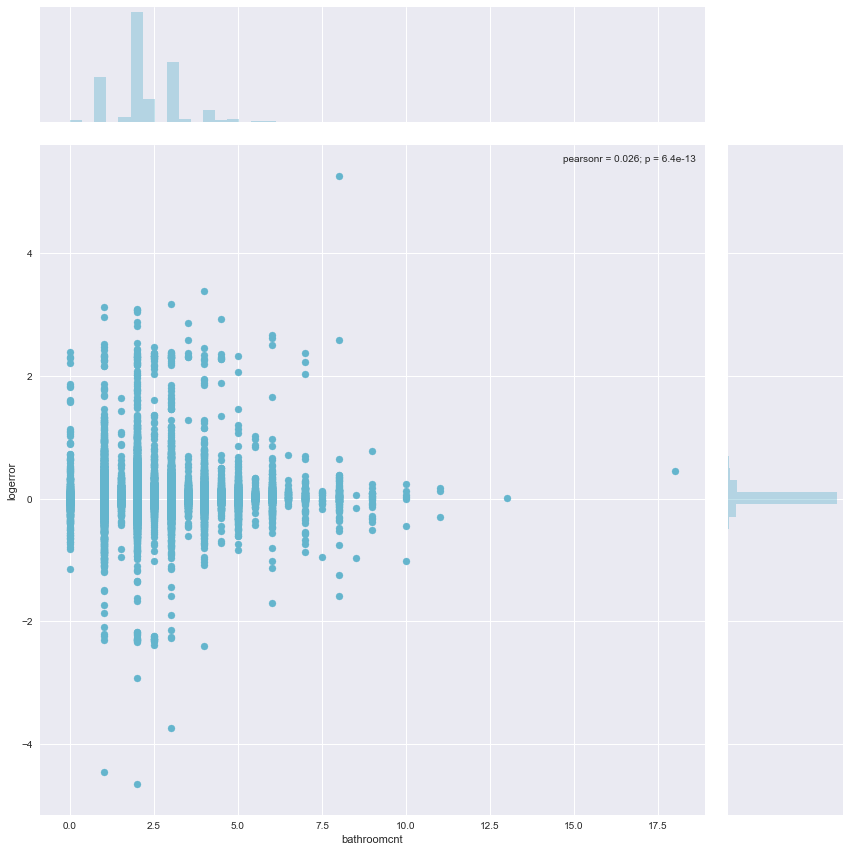

roomcnt


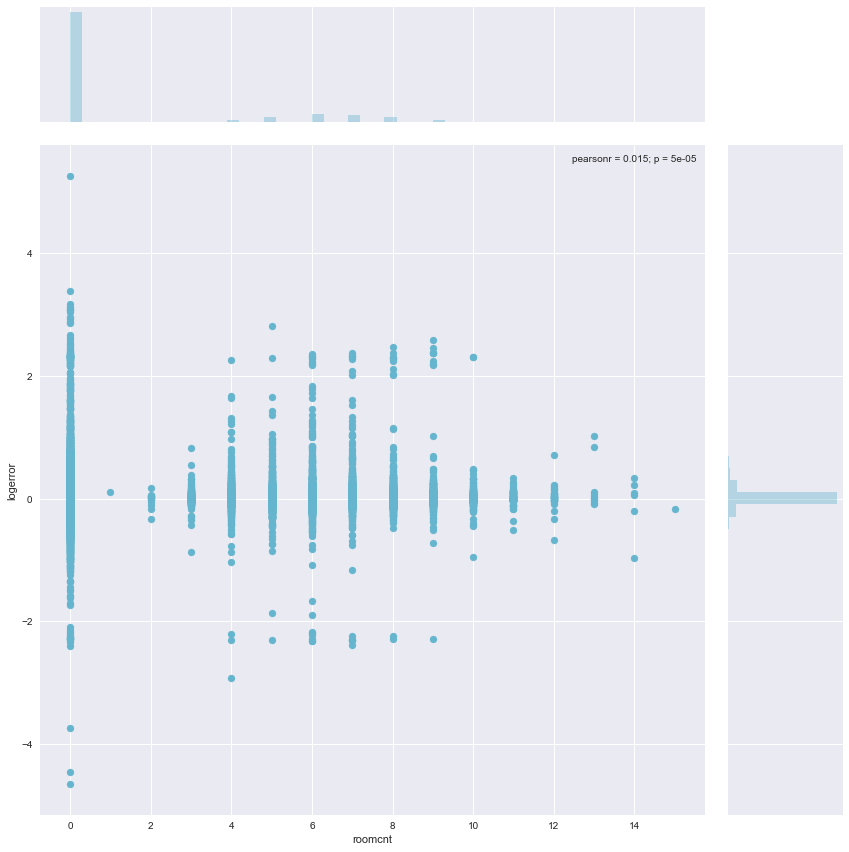

regionidzip


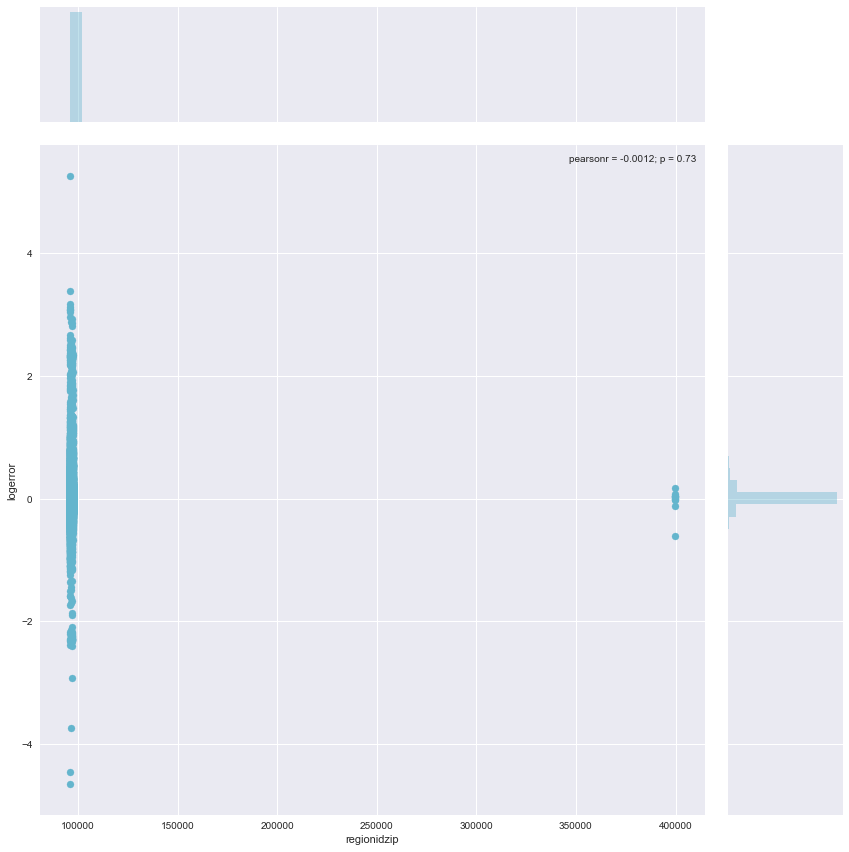

taxamount


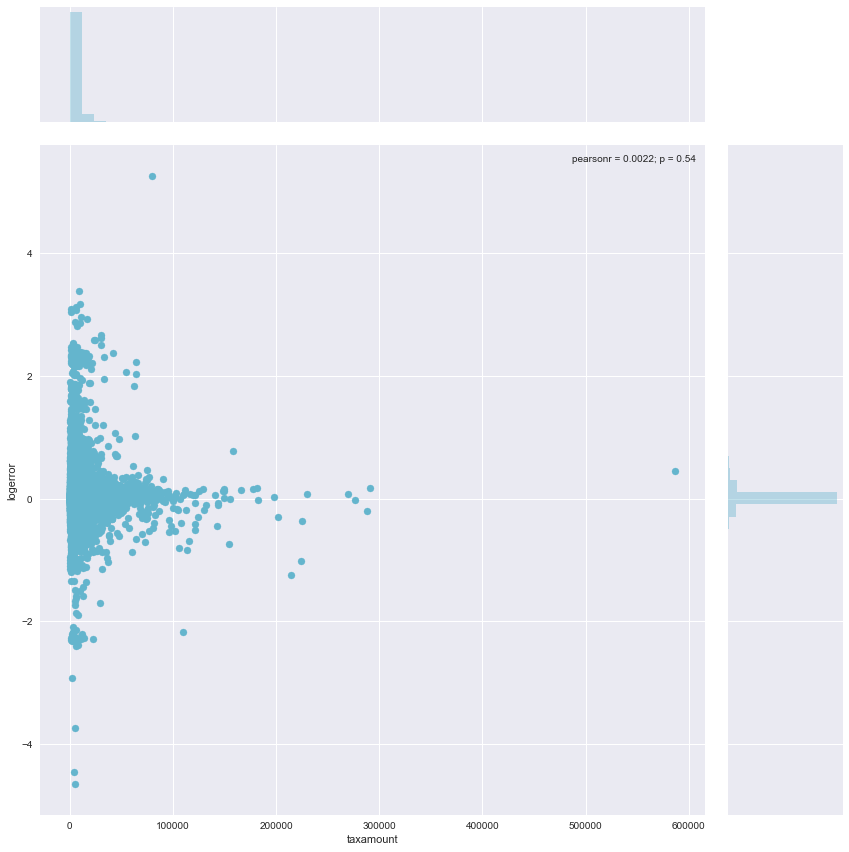

taxvaluedollarcnt


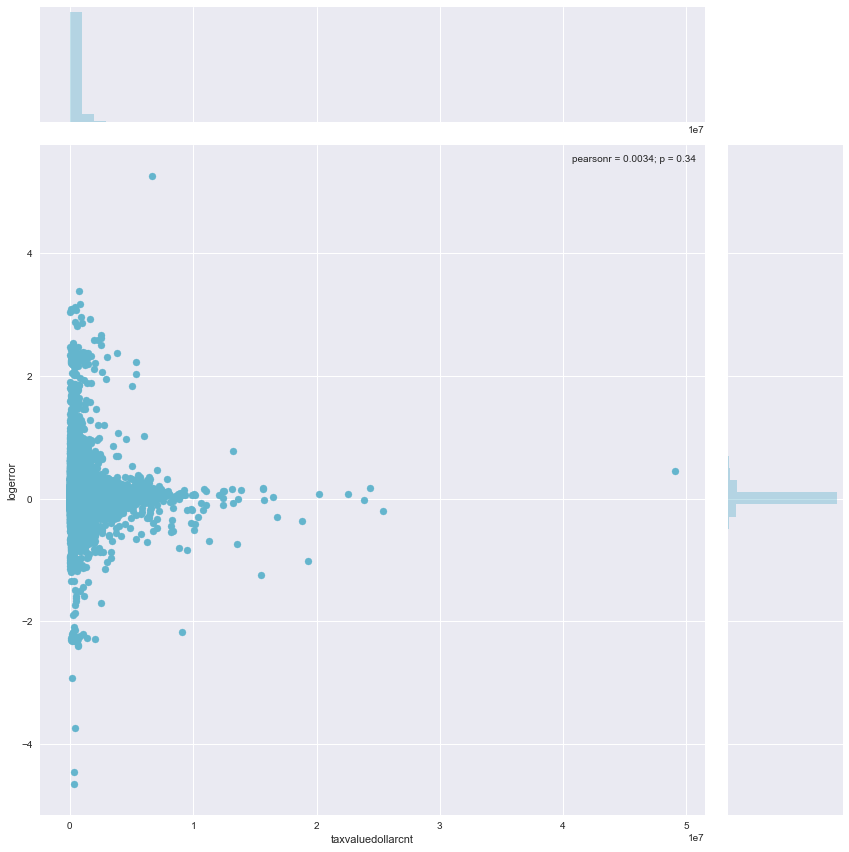

calculatedfinishedsquarefeet


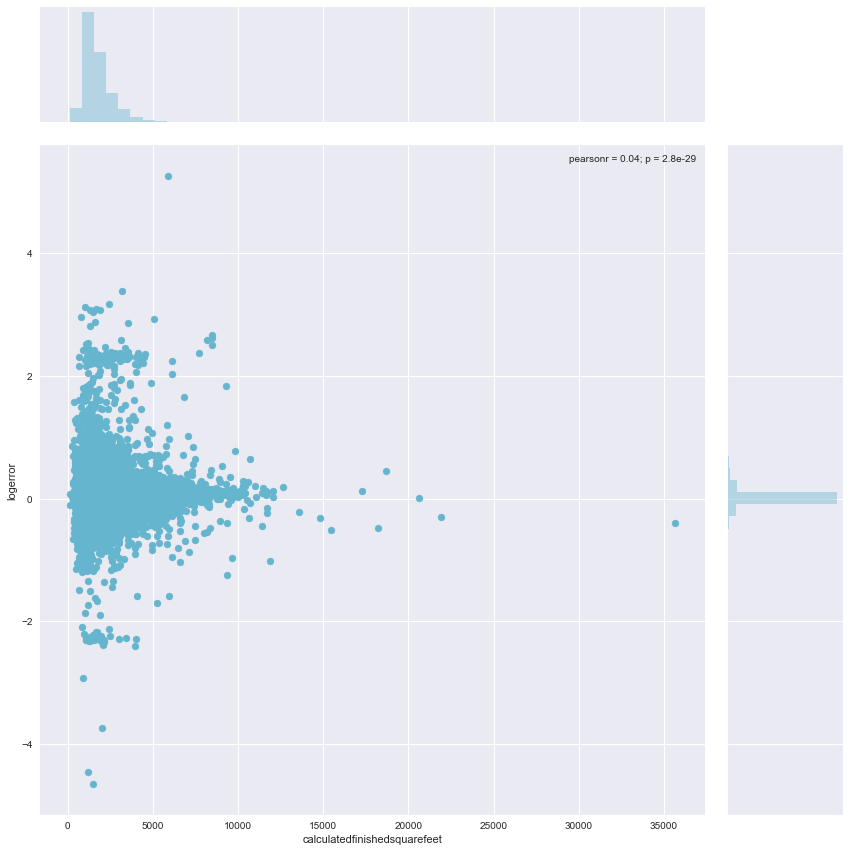

structuretaxvaluedollarcnt


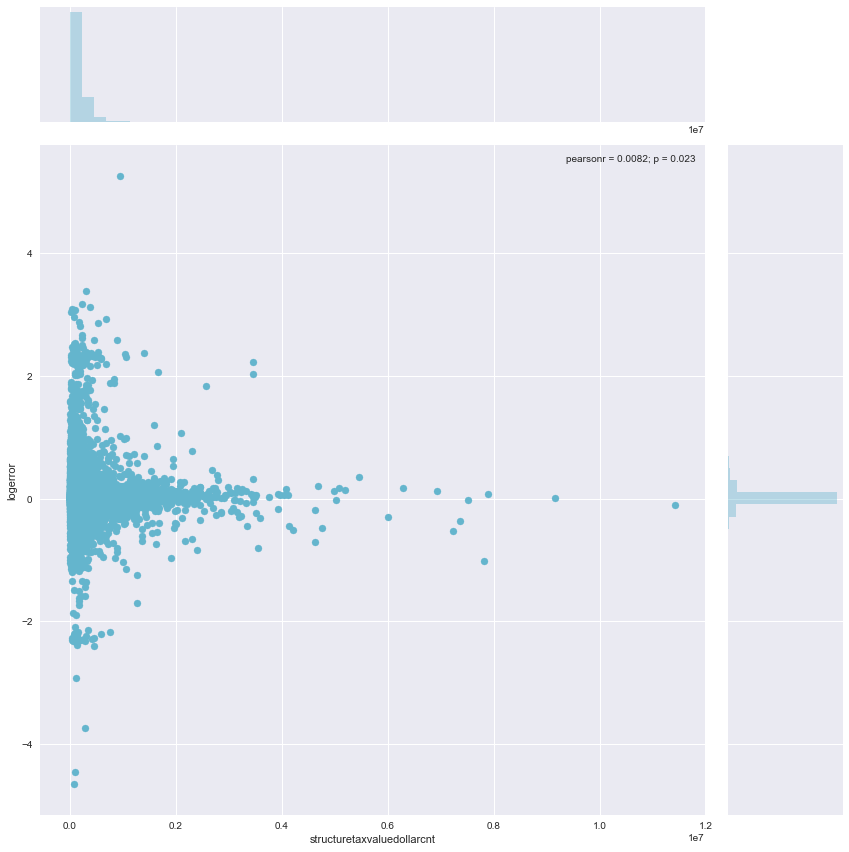

yearbuilt


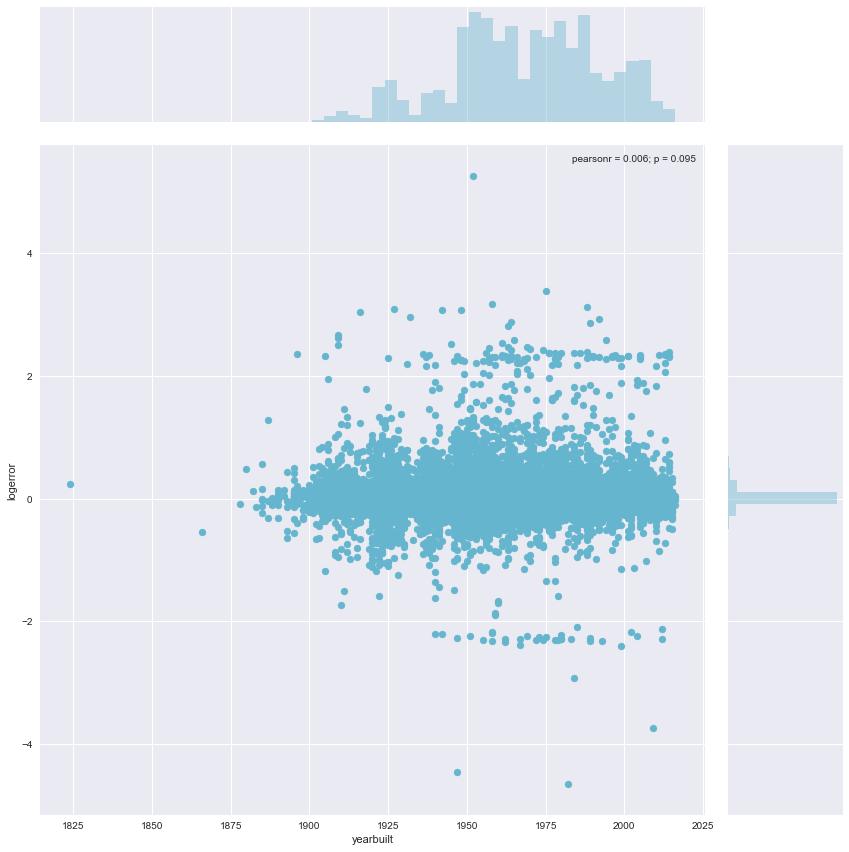

landtaxvaluedollarcnt


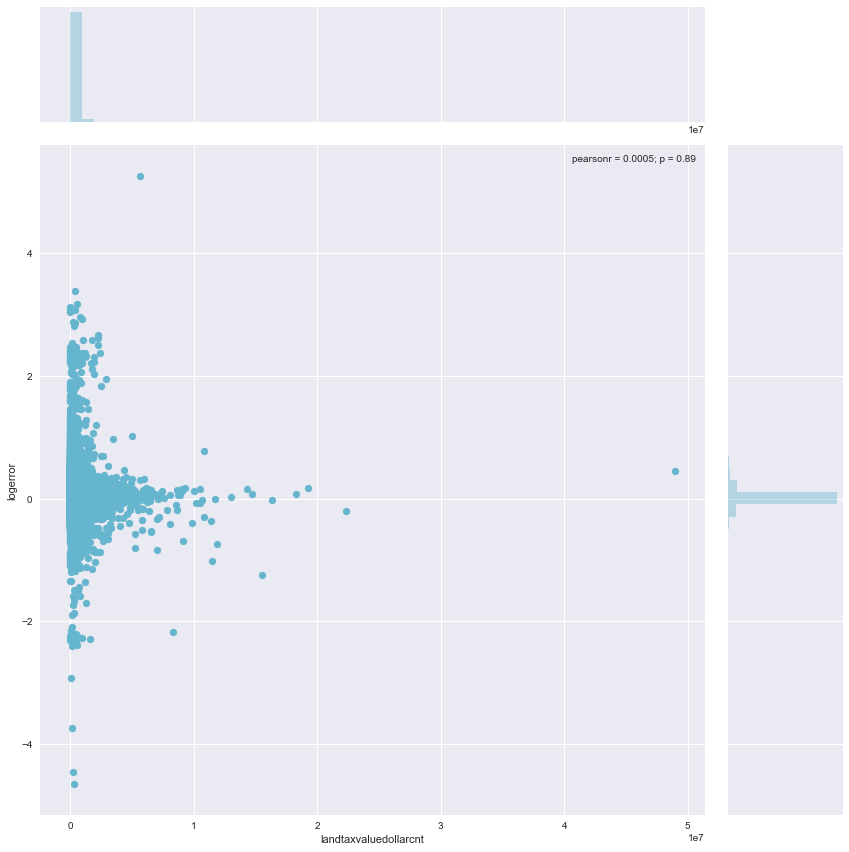

regionidcity


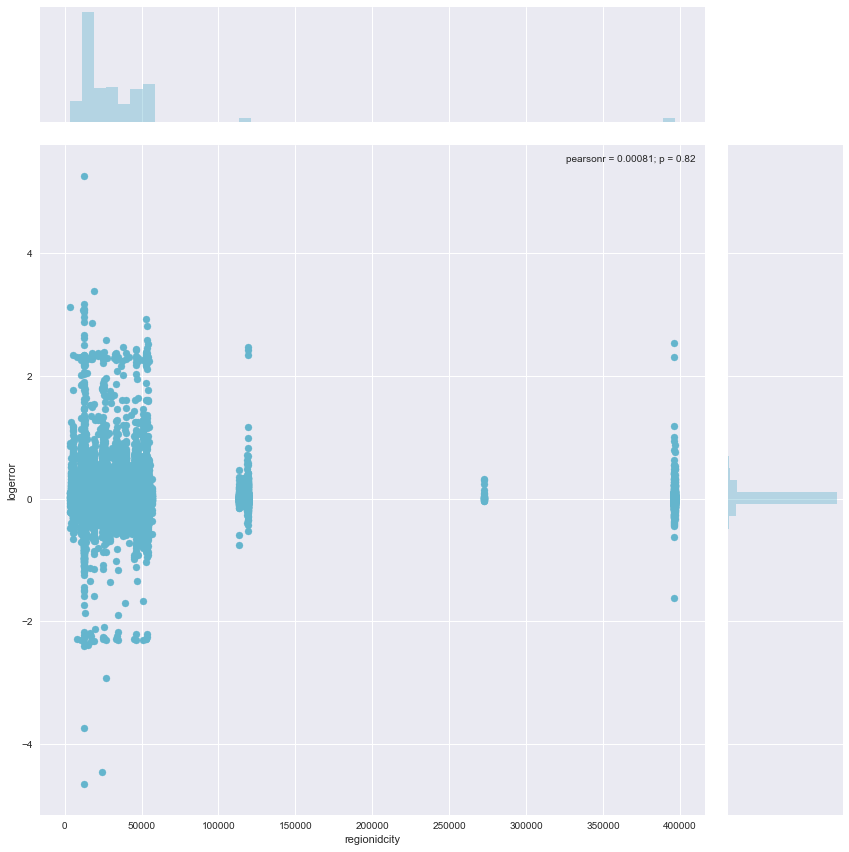

censustractandblock


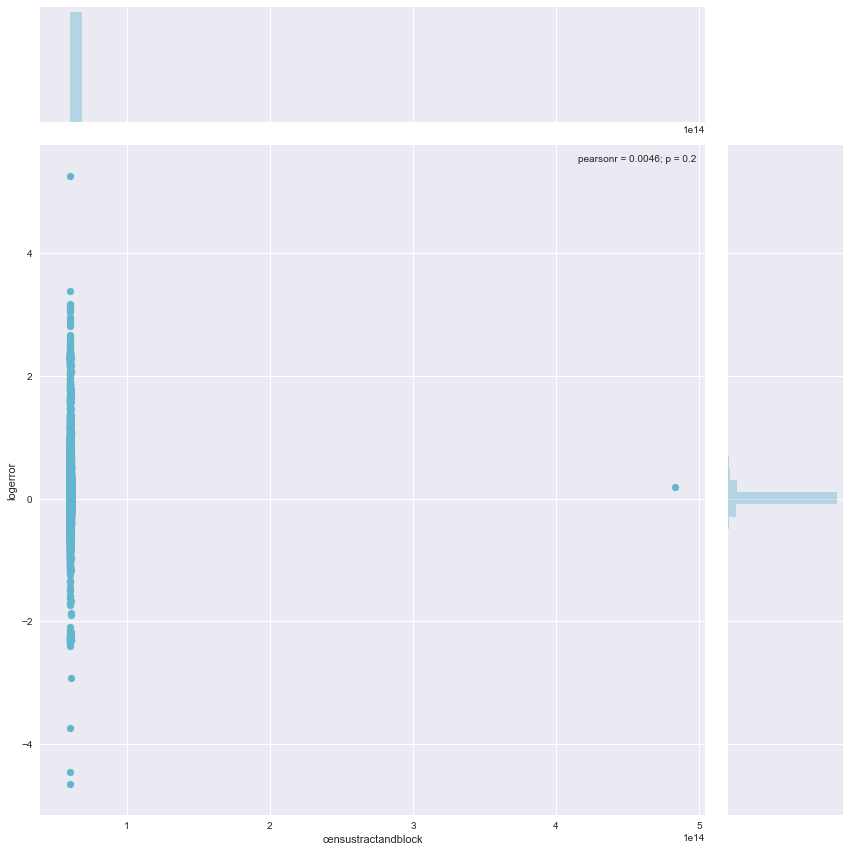

lotsizesquarefeet


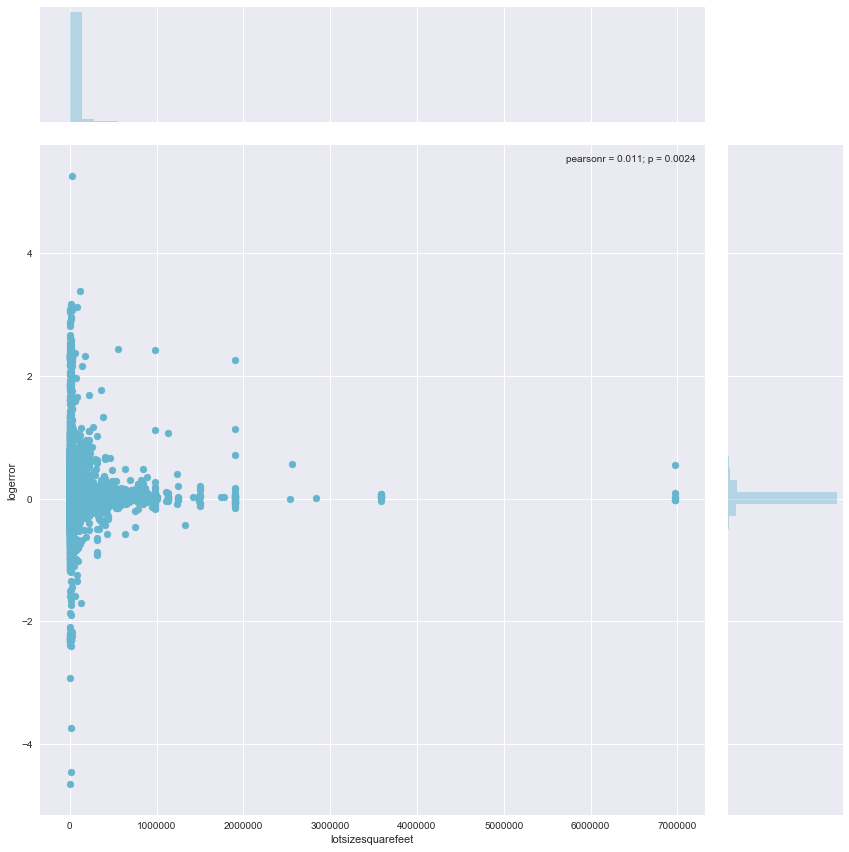

In [80]:
jointDistribution(data_2017)

# Distribution (distplot) of all the Numberical columns

In [86]:
def allNumericalColumnsDistribution(yearValue):
    numcols = yearValue[['parcelid', 'logerror', 'transactiondate', 'year', 'month',
    'bathroomcnt', 'bedroomcnt',
    'calculatedfinishedsquarefeet', 'fips',
    'latitude', 'longitude', 'lotsizesquarefeet',
    'propertycountylandusecode',
    'rawcensustractandblock', 'regionidcity', 'regionidcounty',
    'regionidzip', 'roomcnt', 'yearbuilt', 'structuretaxvaluedollarcnt',
    'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt',
    'taxamount', 'censustractandblock']]
    numcols.hist(figsize=(20, 20), bins=50, xlabelsize=8, ylabelsize=8)
    plt.show()

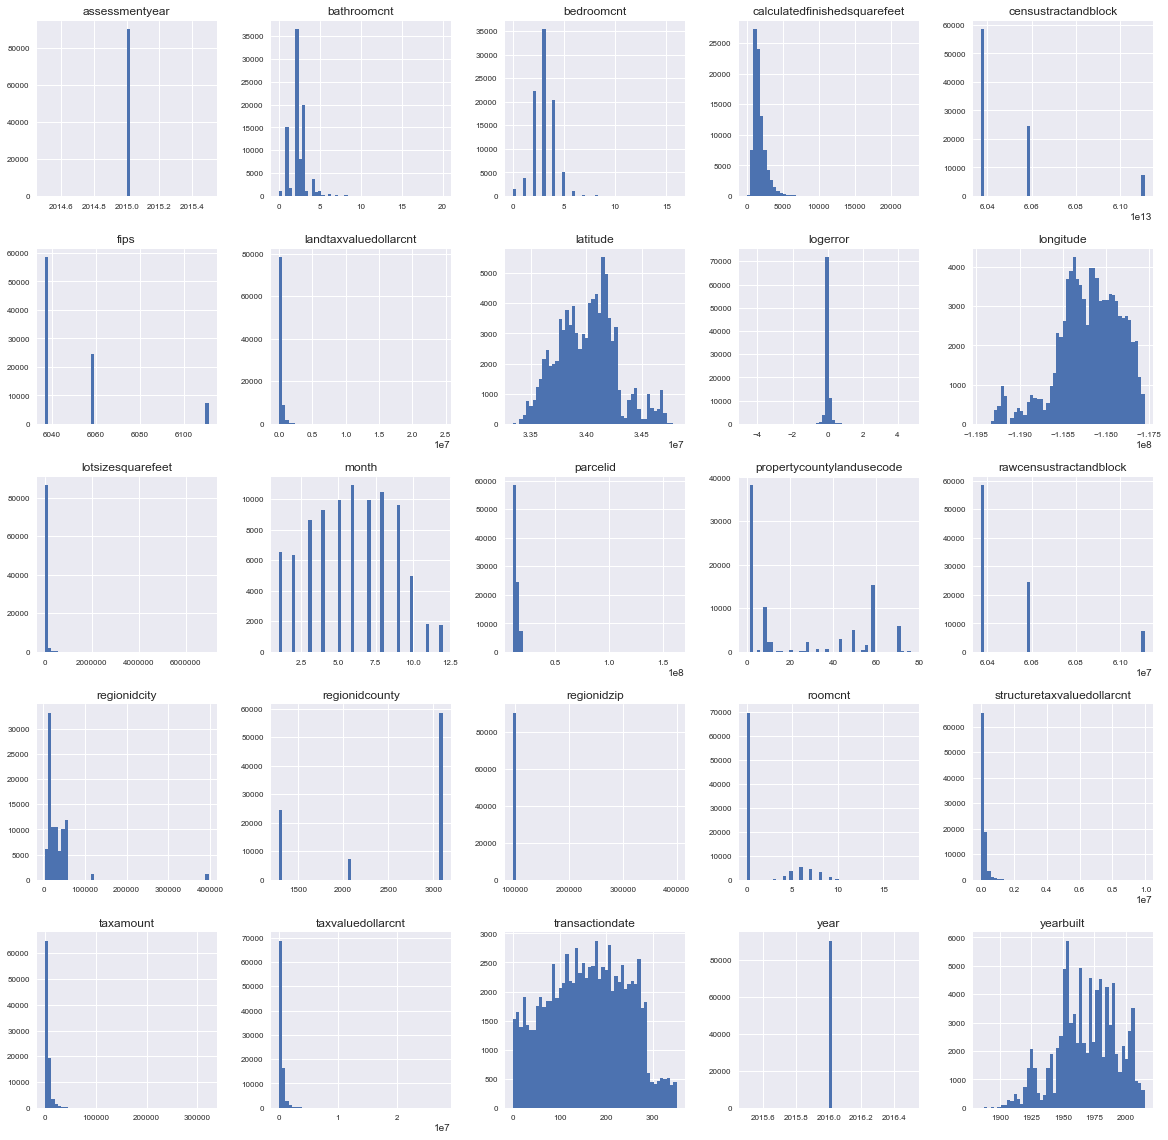

In [87]:
allNumericalColumnsDistribution(data_2016)

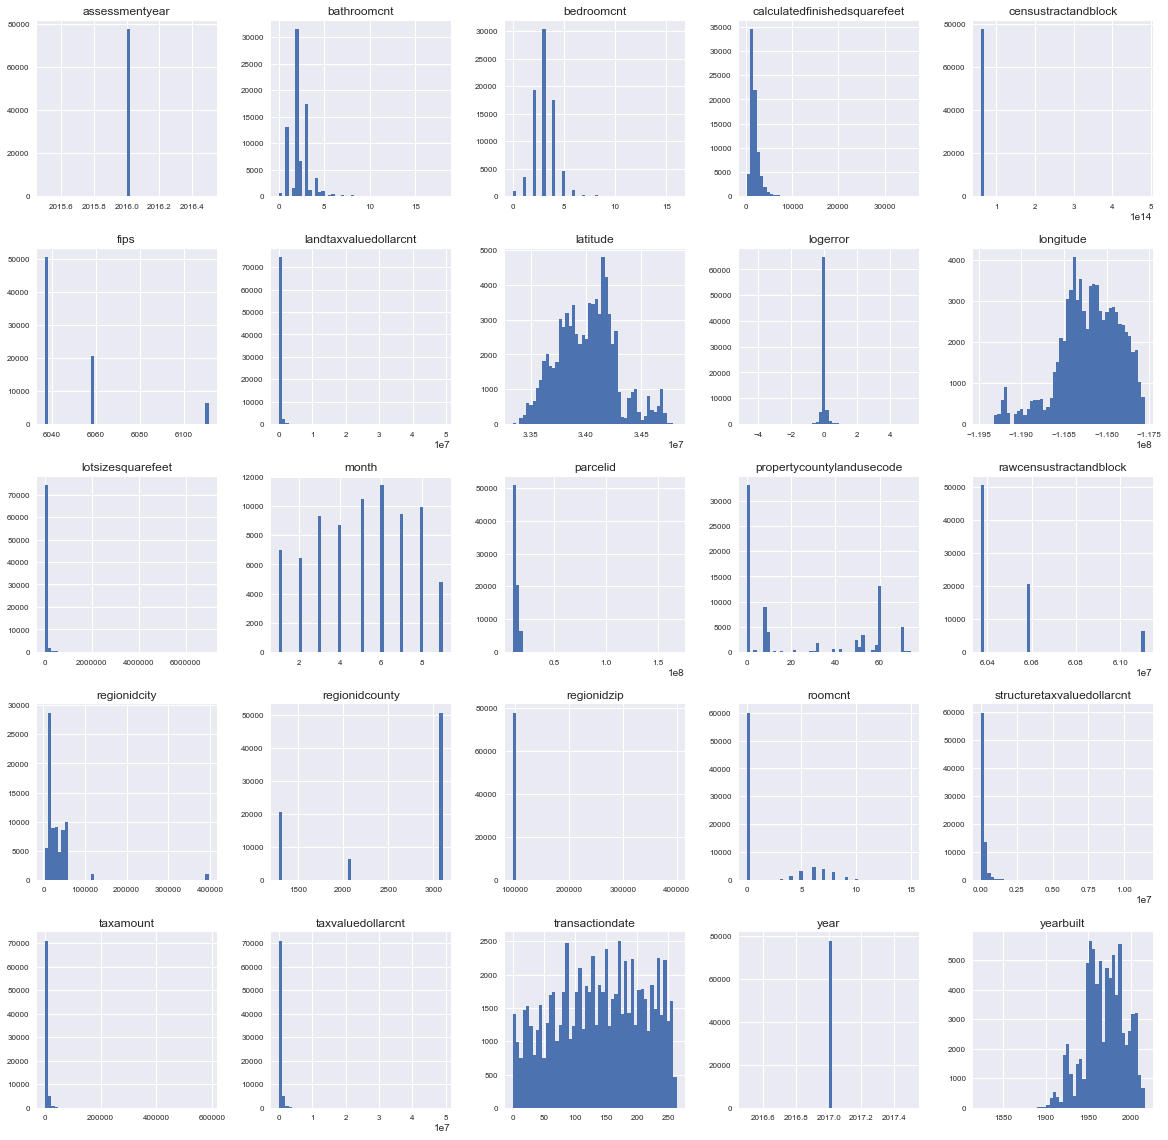

In [88]:
allNumericalColumnsDistribution(data_2017)

# Distribution For Each Column with hist and  dist plot

## Numerical Columns

In [201]:
def eachColumnDistribution(yearValue):    
    colName = selectedColumnForYear(yearValue)
    for col in colName:
        
        plt.figure(figsize=(12,12))
        sns.distplot(yearValue[col])
        plt.ylabel('Quantity', fontsize=12)
        plt.xlabel(col+' Vlaue', fontsize=12)
        plt.title(col+" Column Distribution", fontsize=15)
        plt.show()

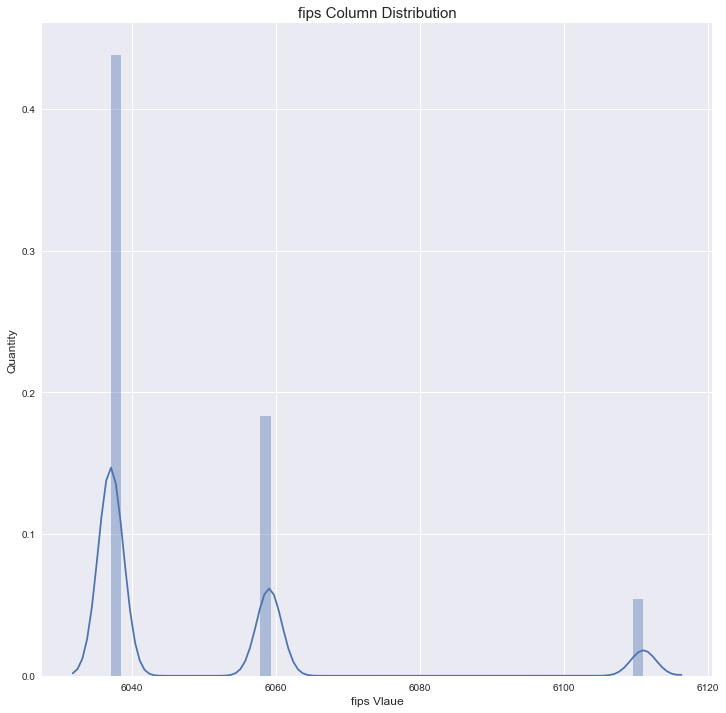

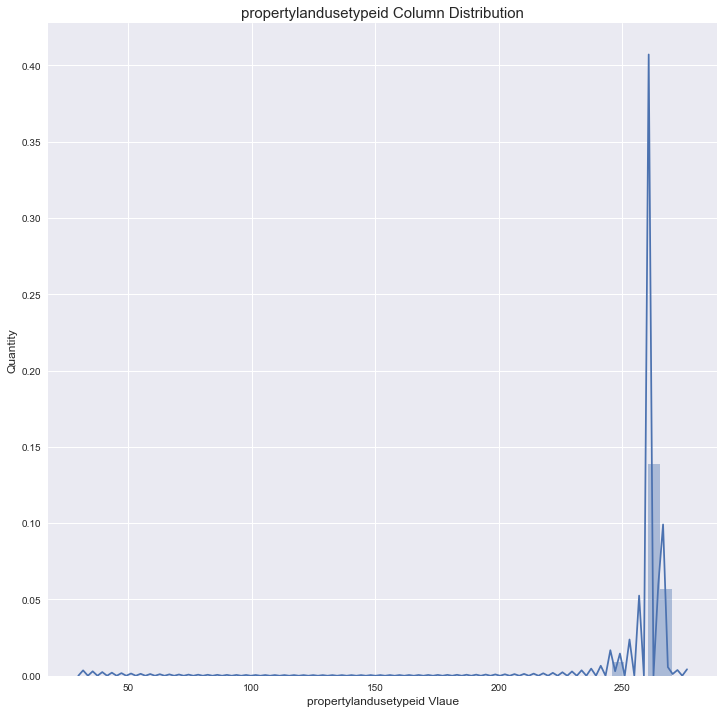

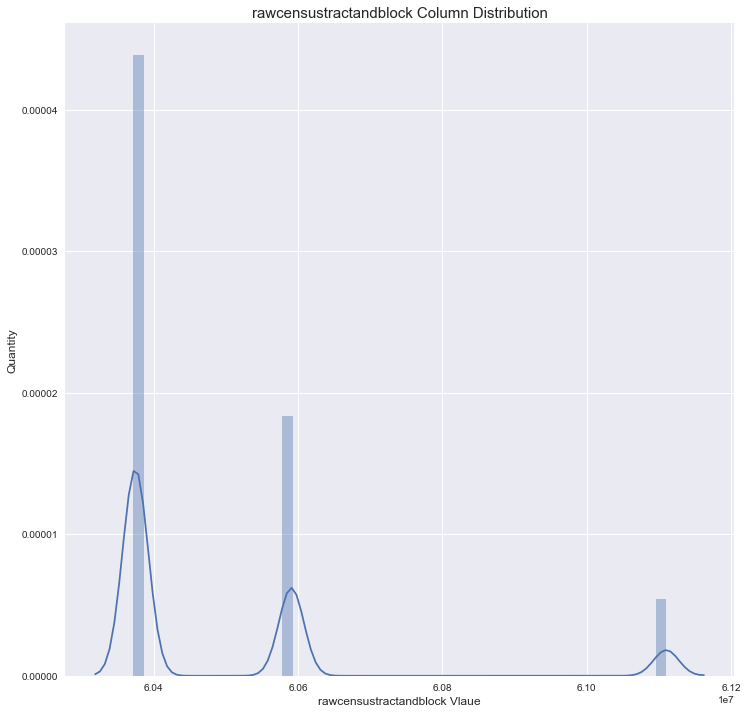

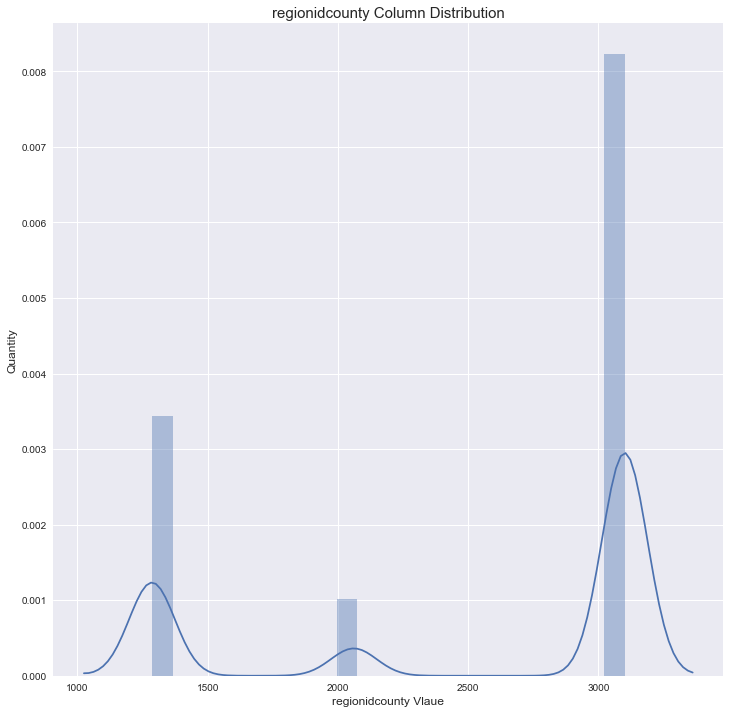

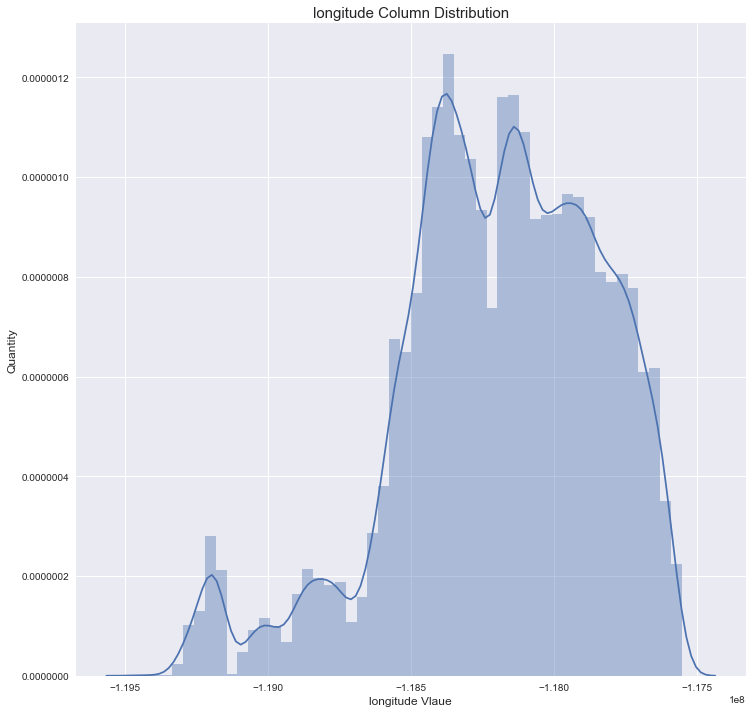

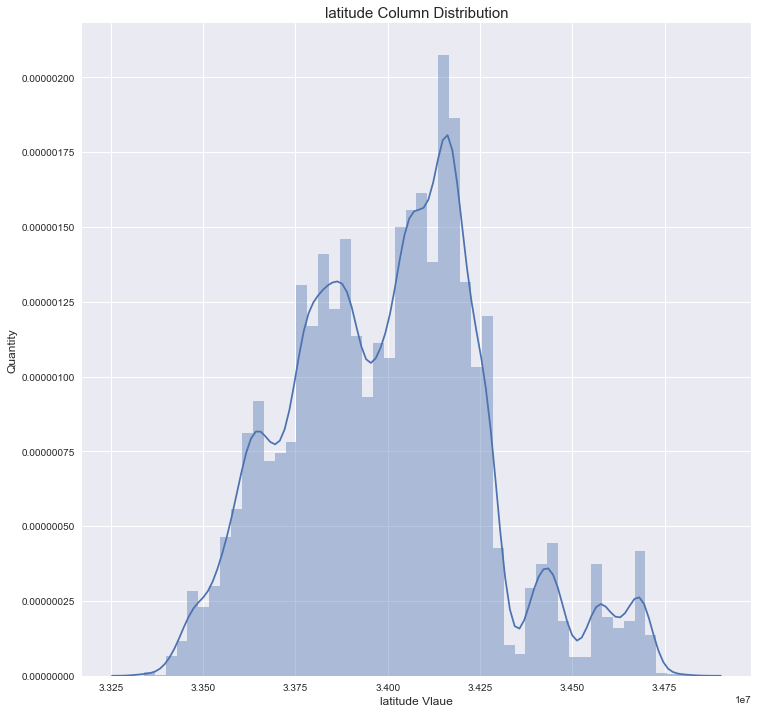

C:\Users\madhu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\madhu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


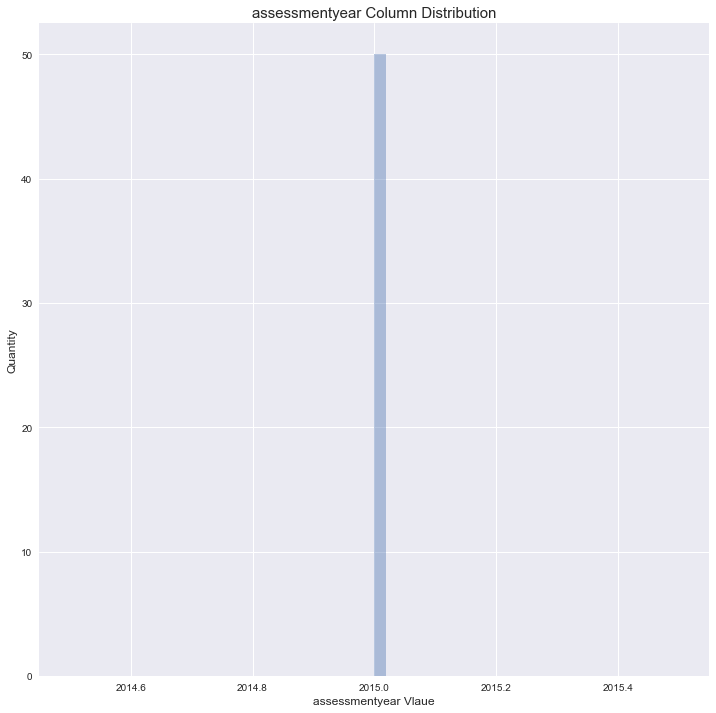

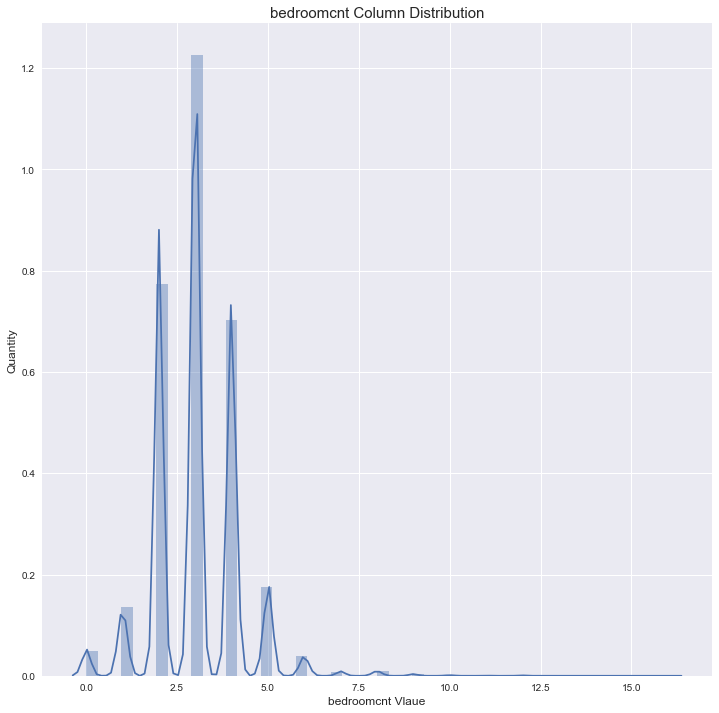

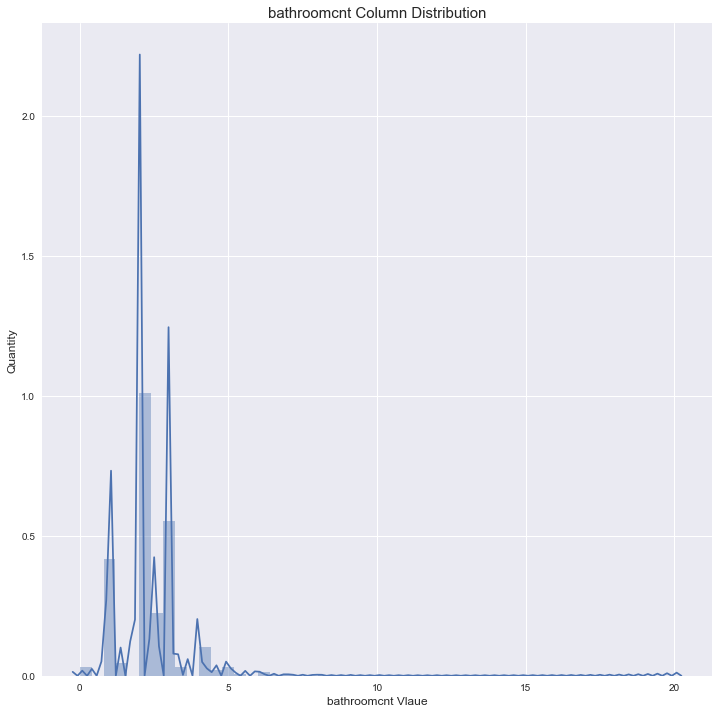

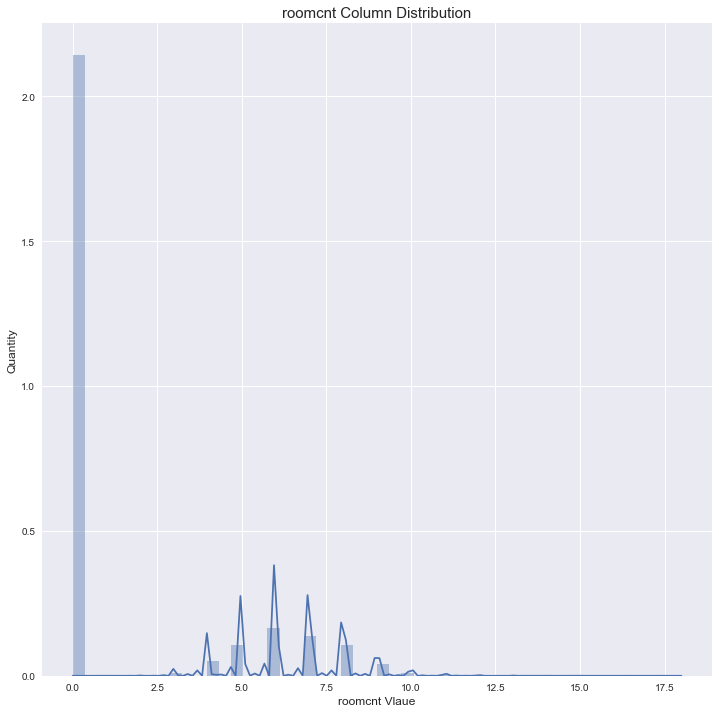

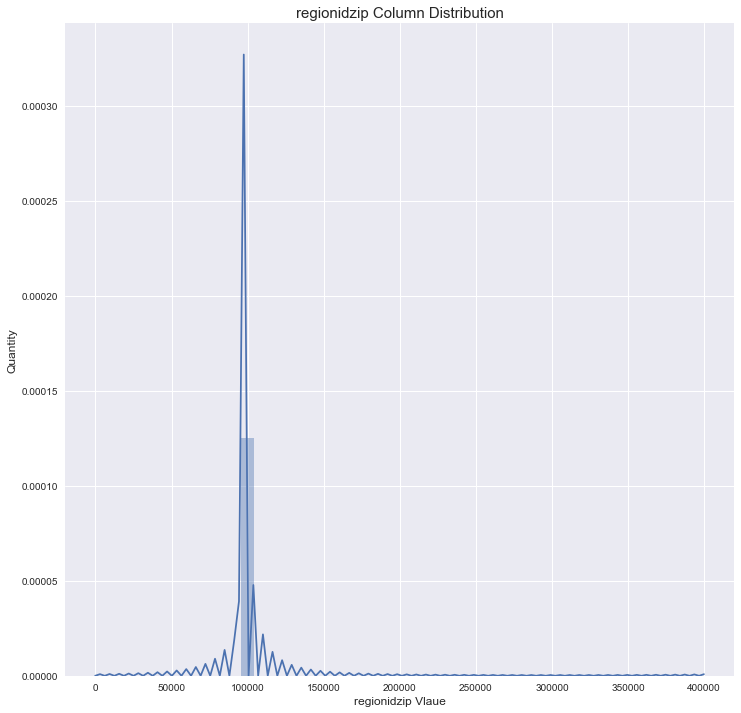

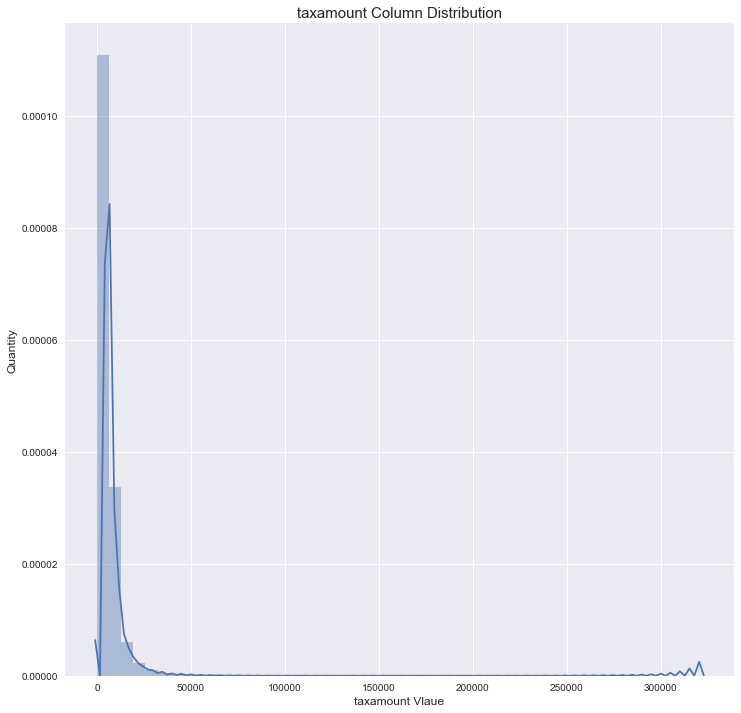

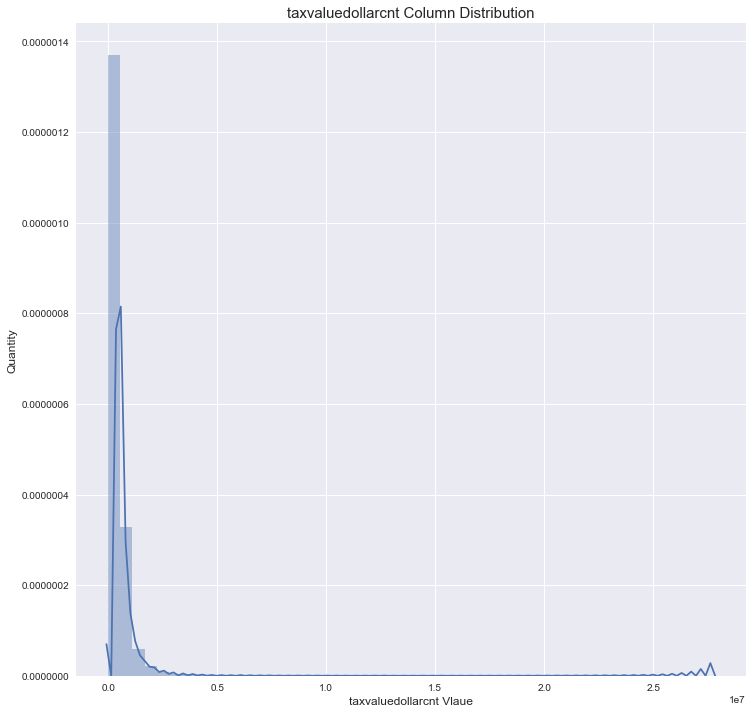

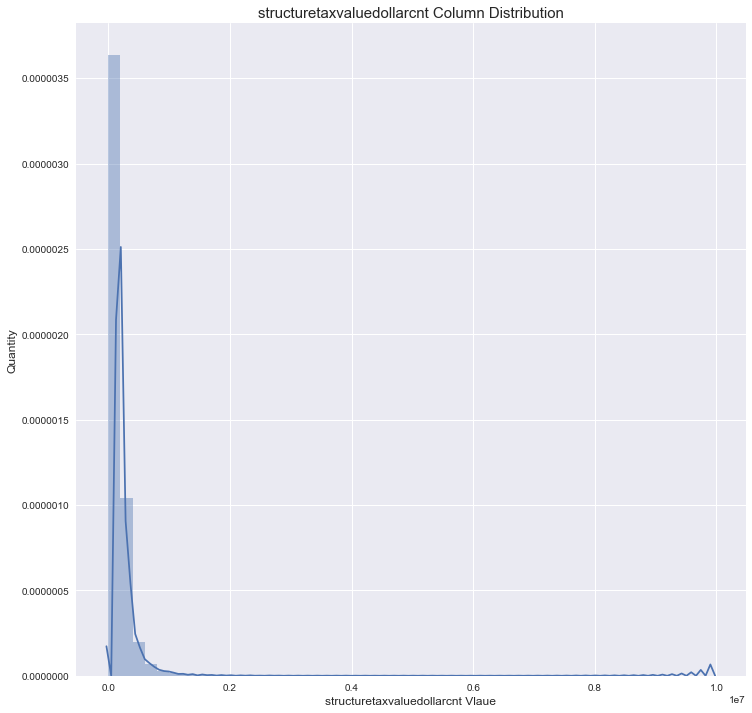

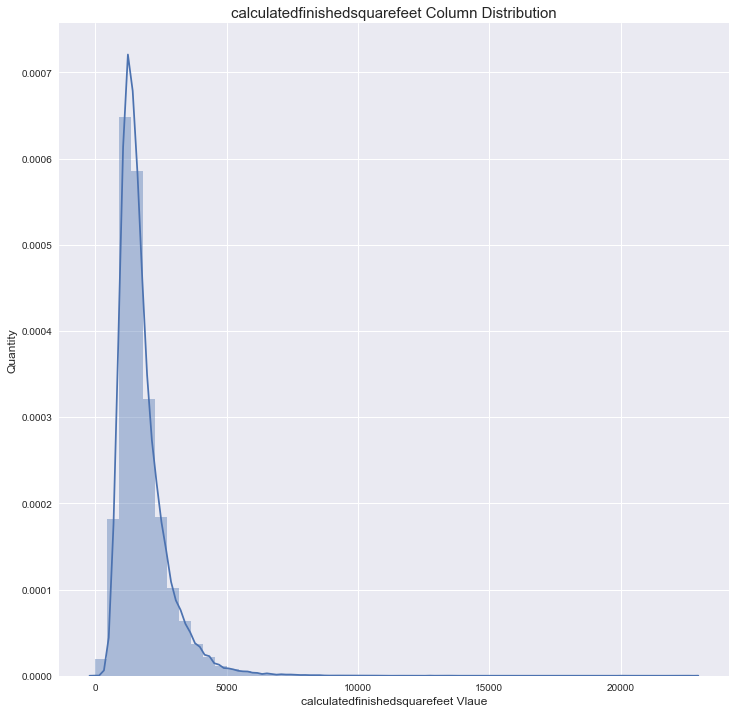

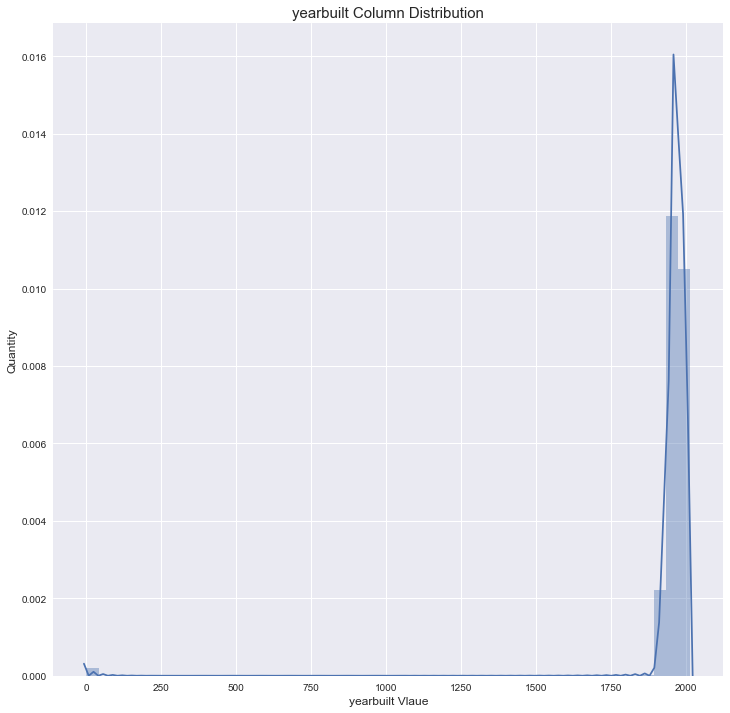

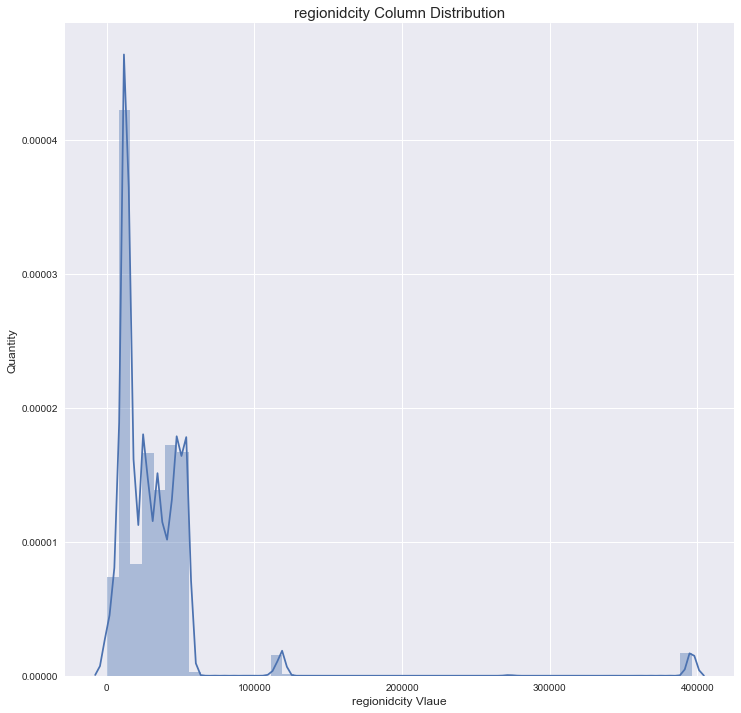

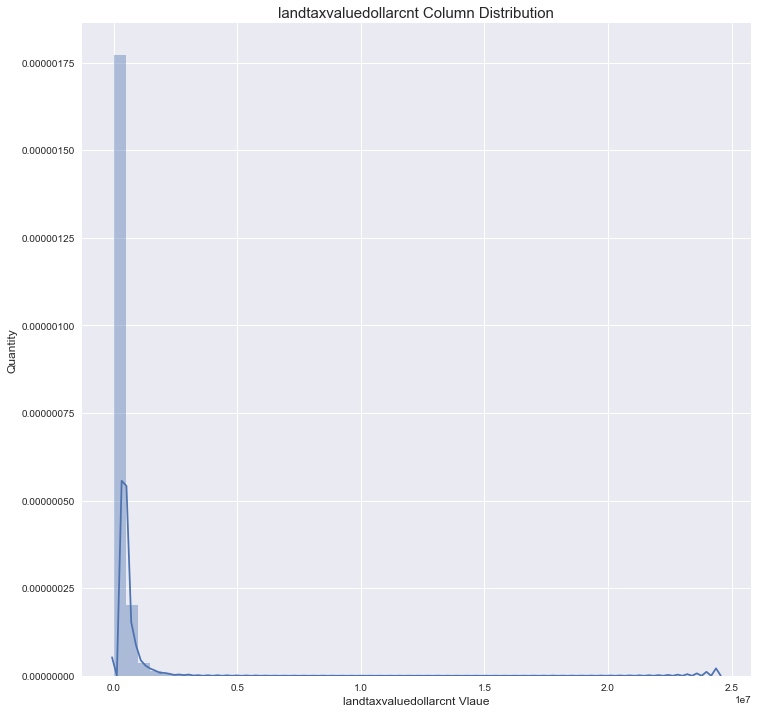

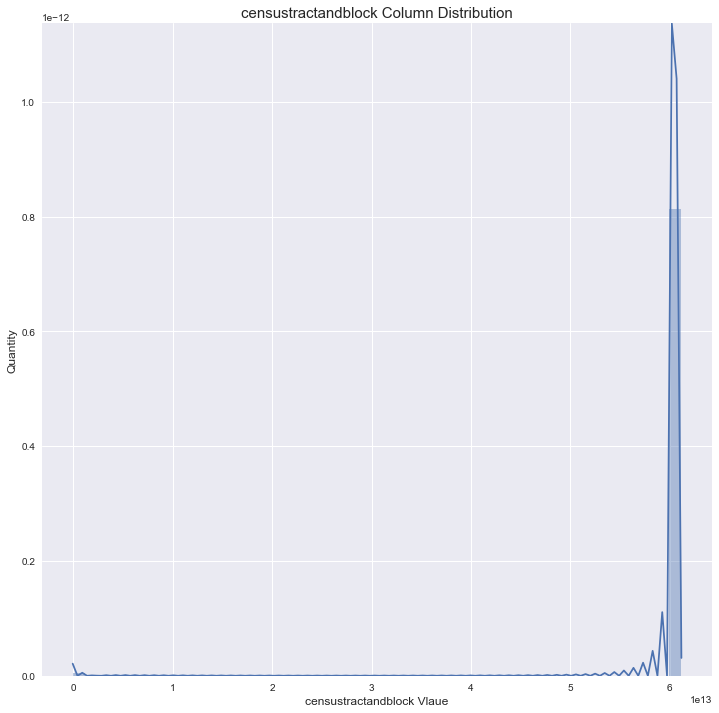

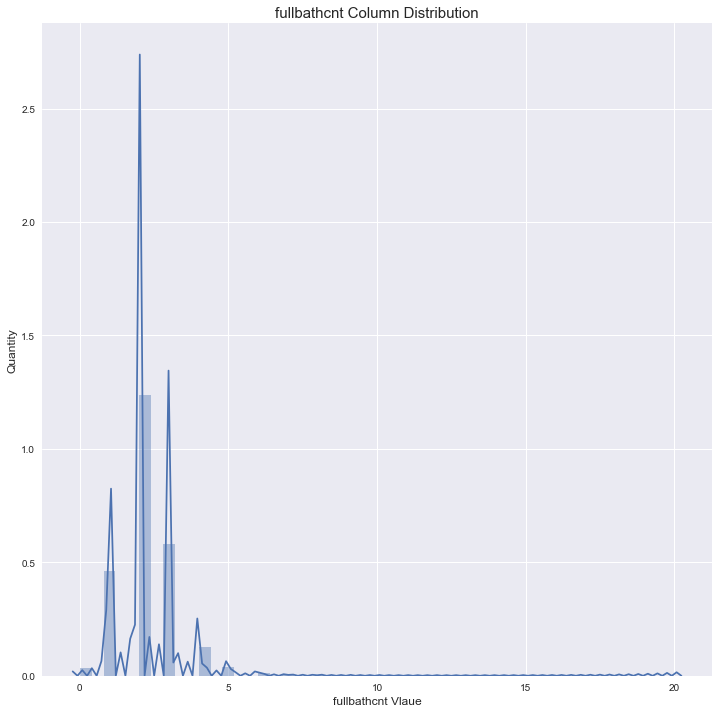

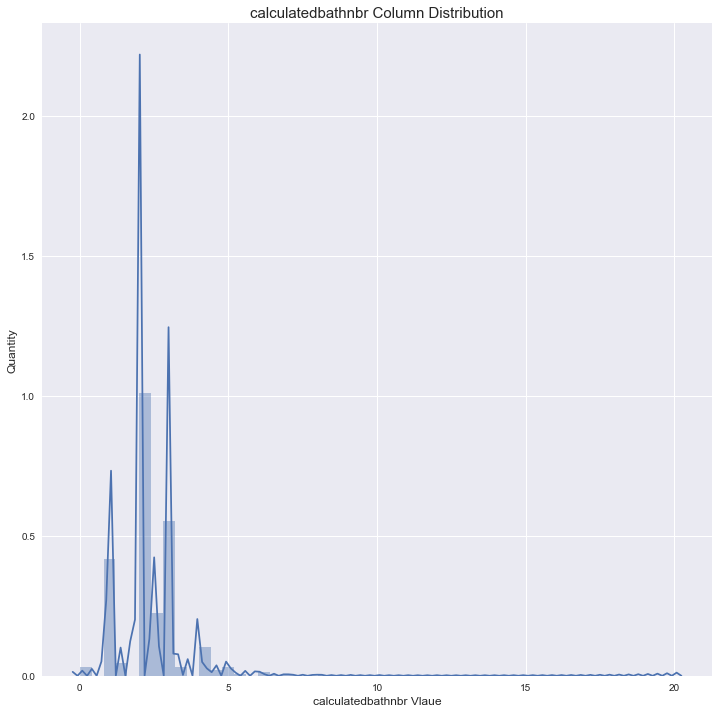

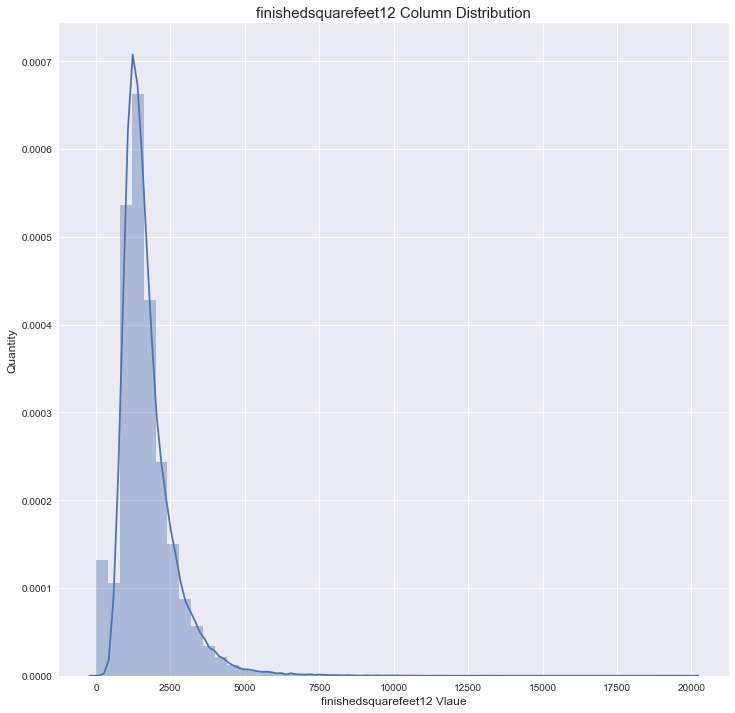

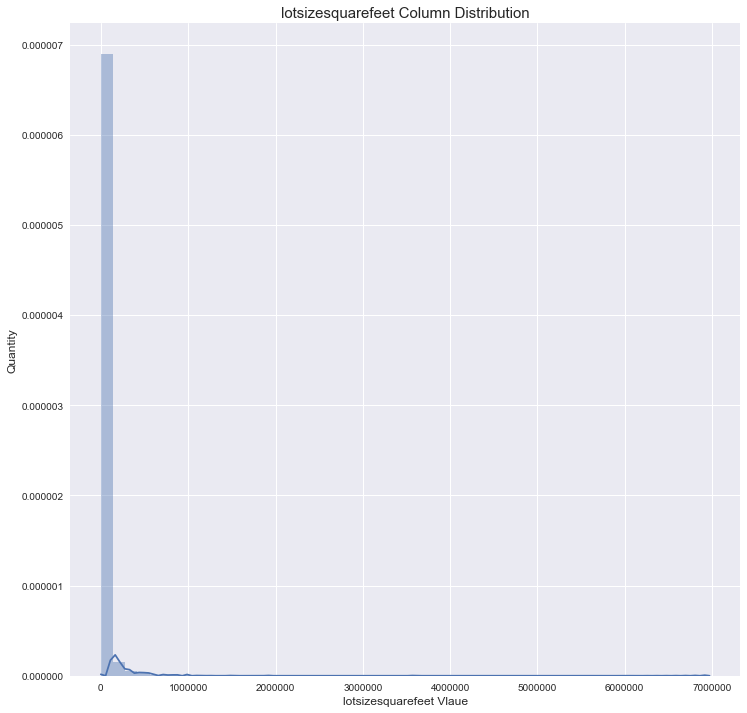

In [193]:
eachColumnDistribution(data_2016)

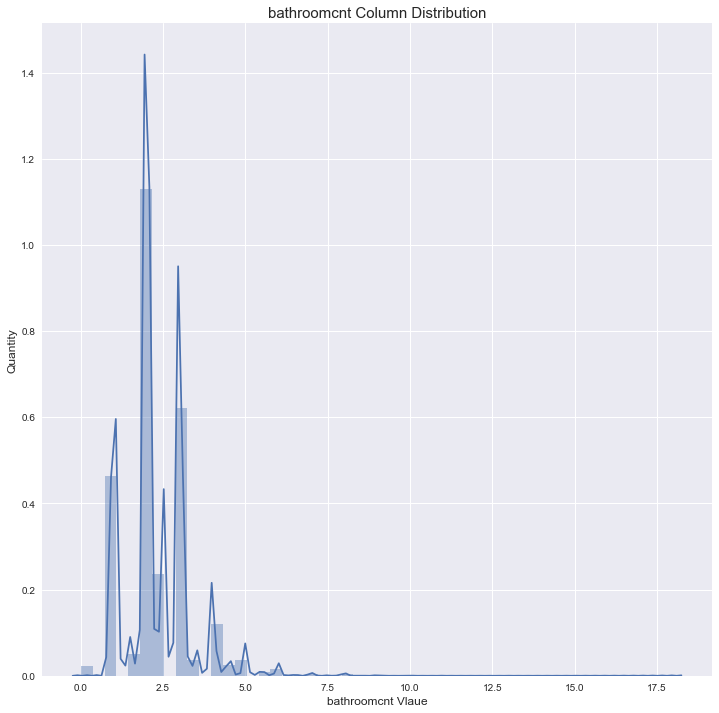

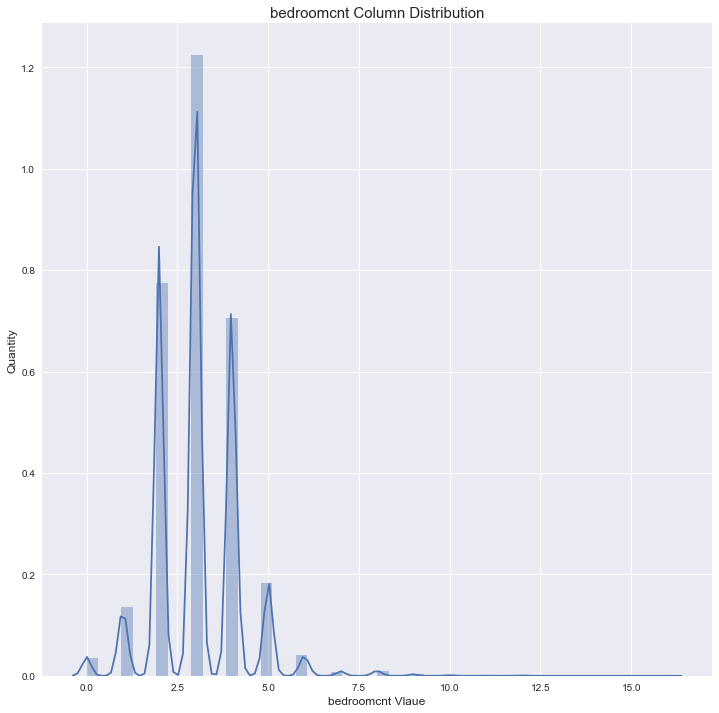

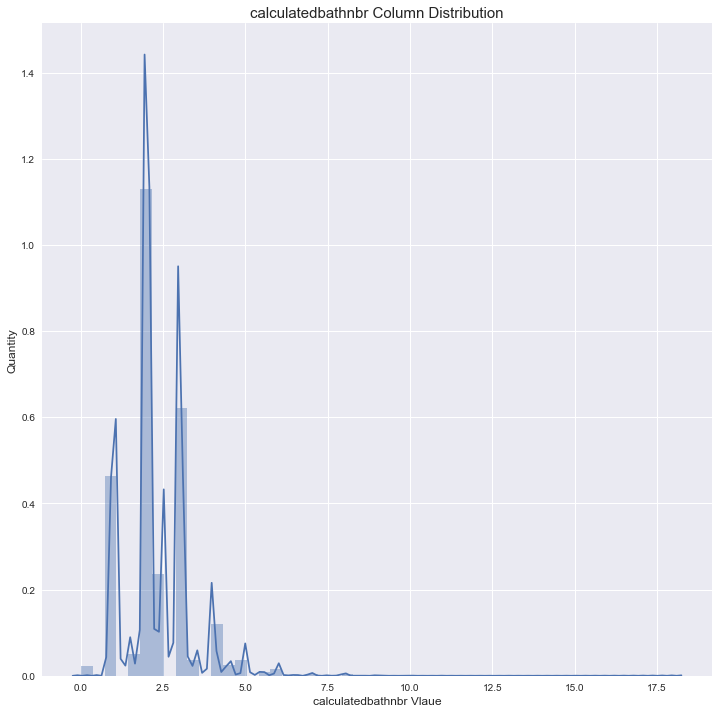

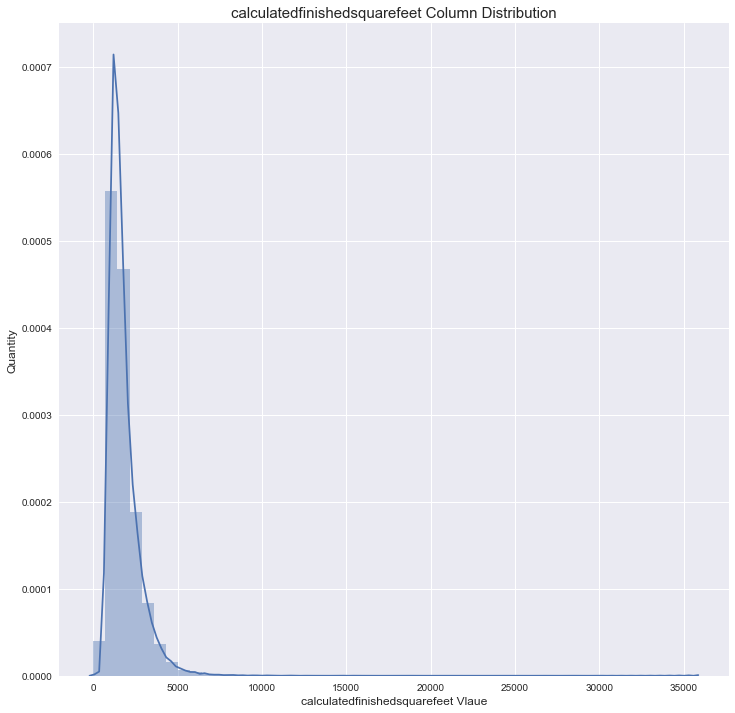

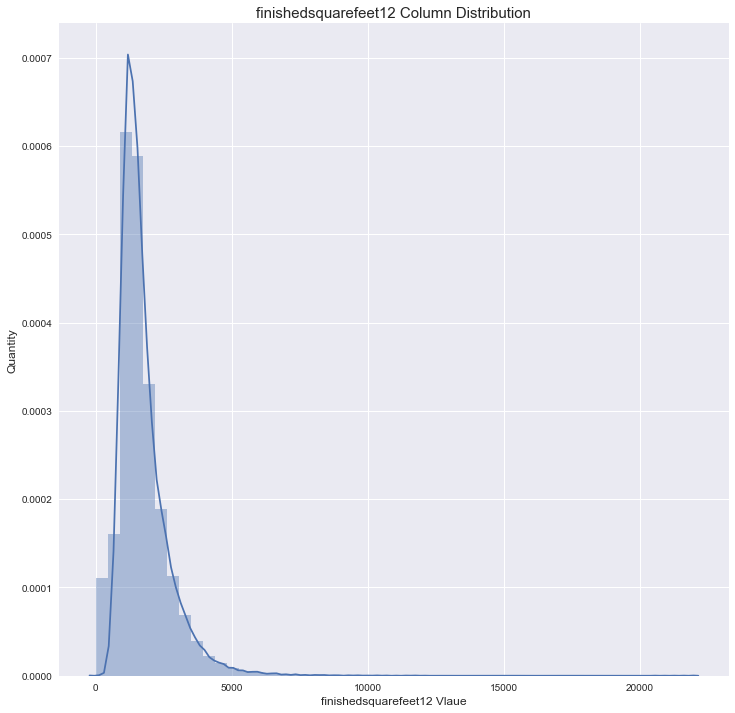

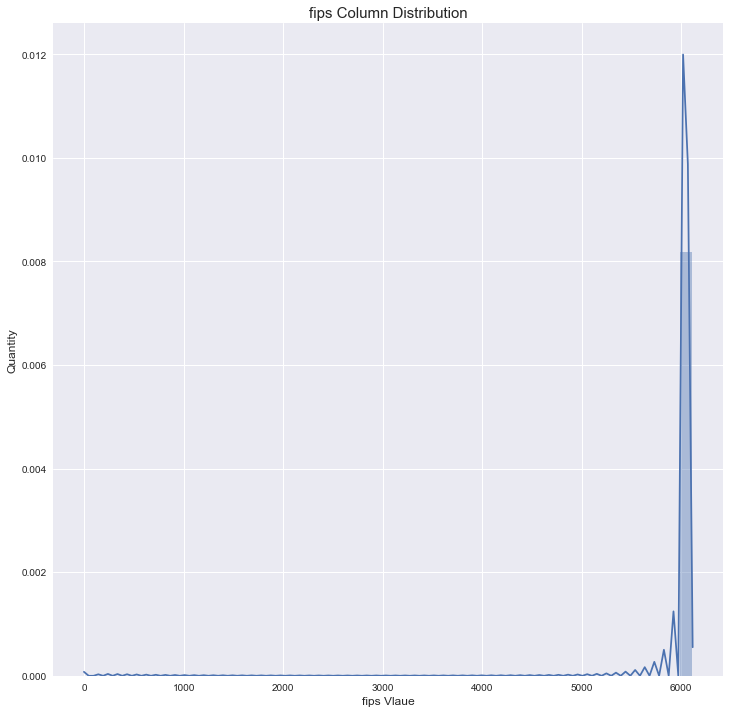

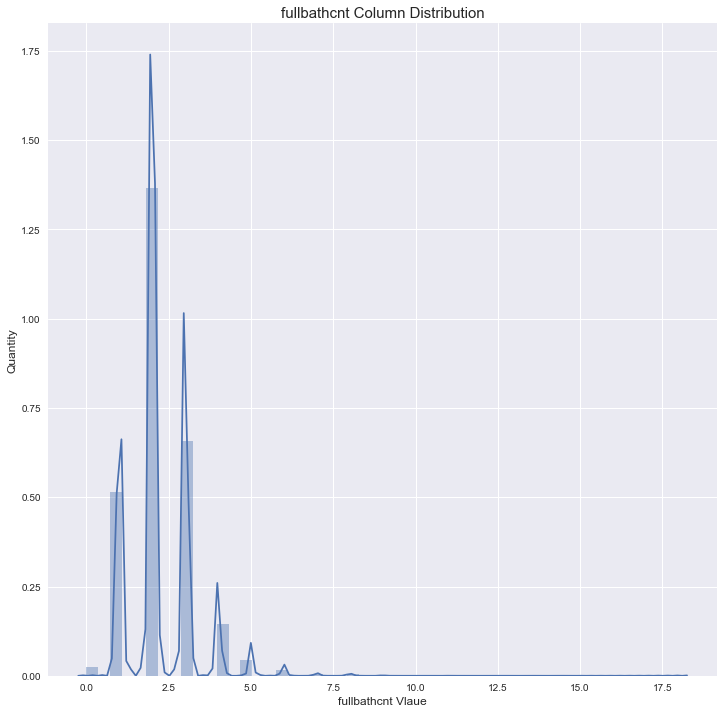

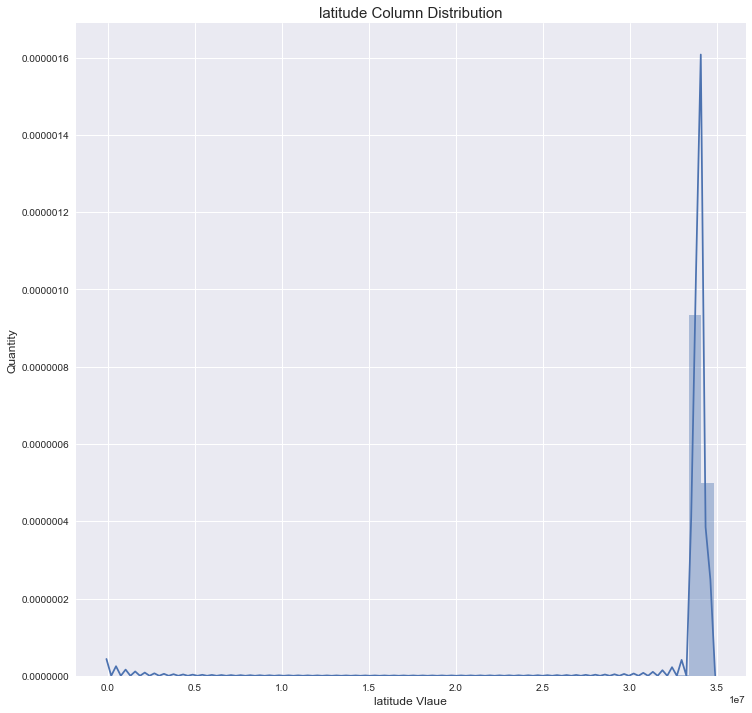

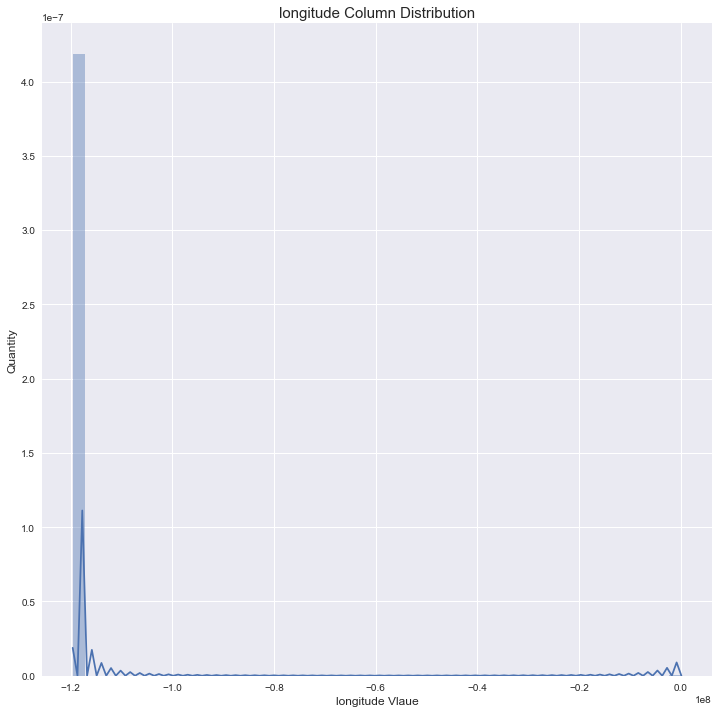

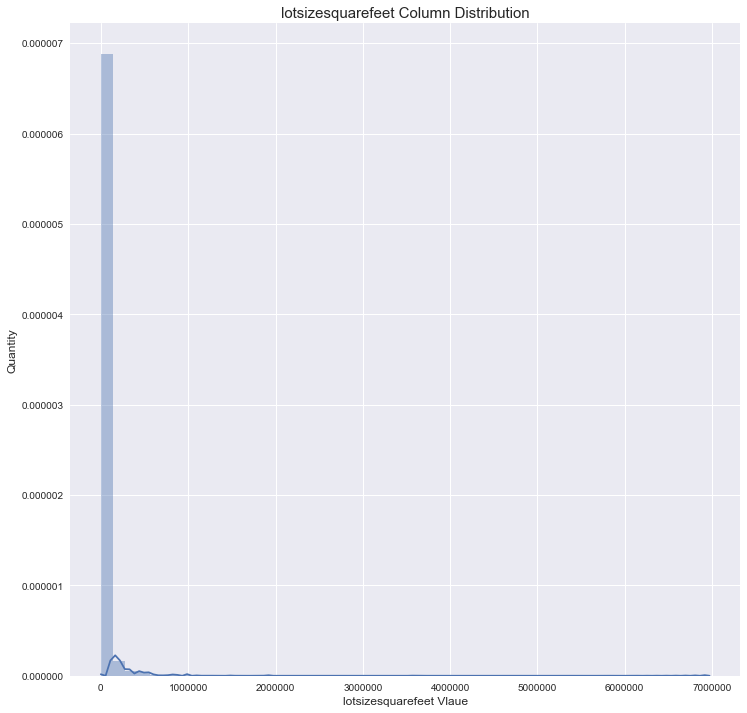

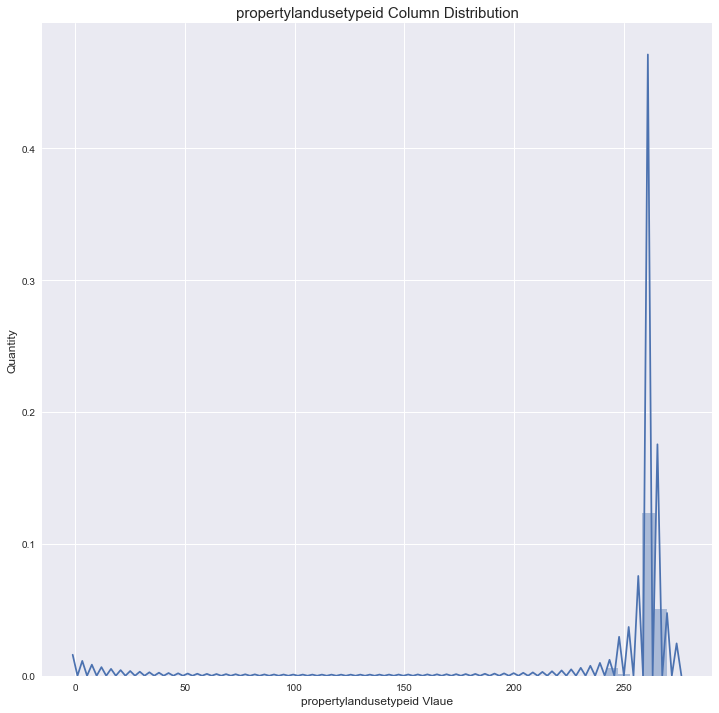

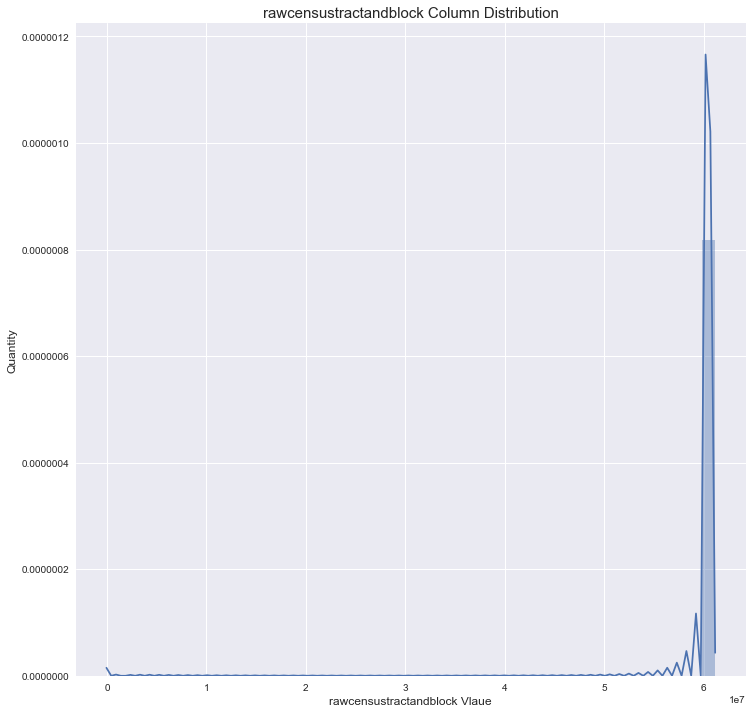

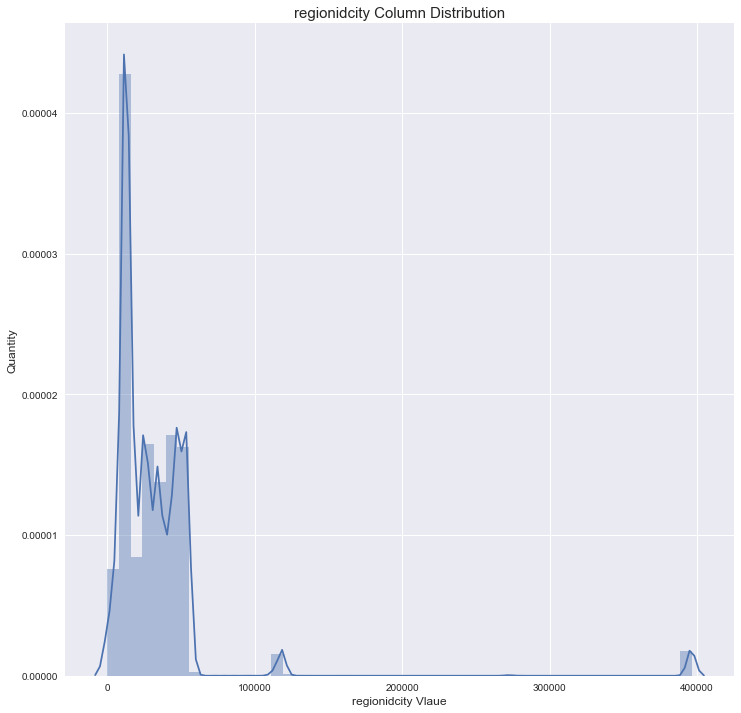

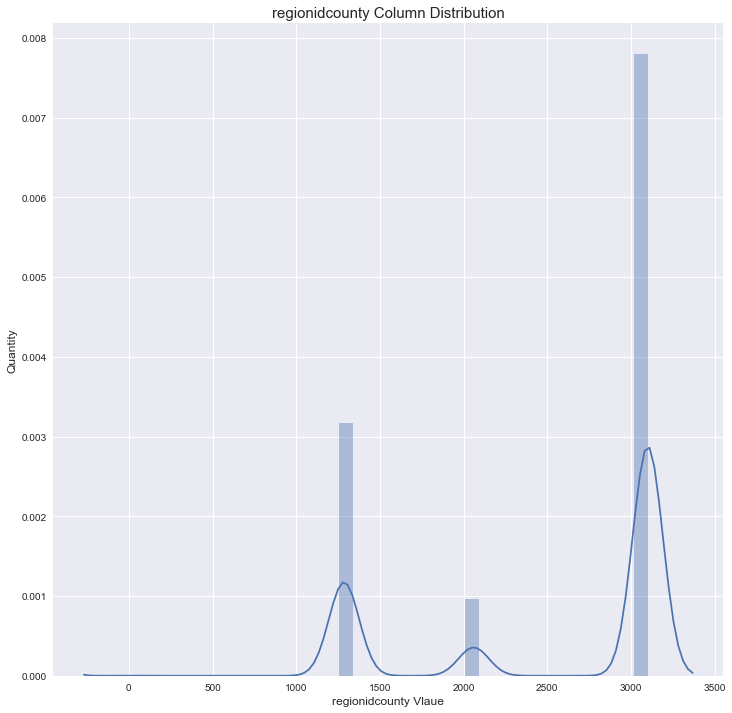

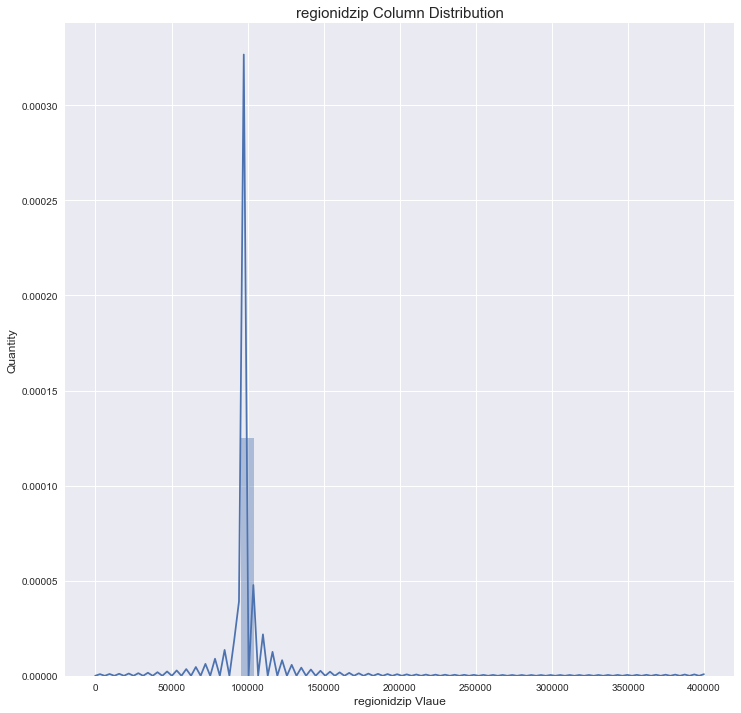

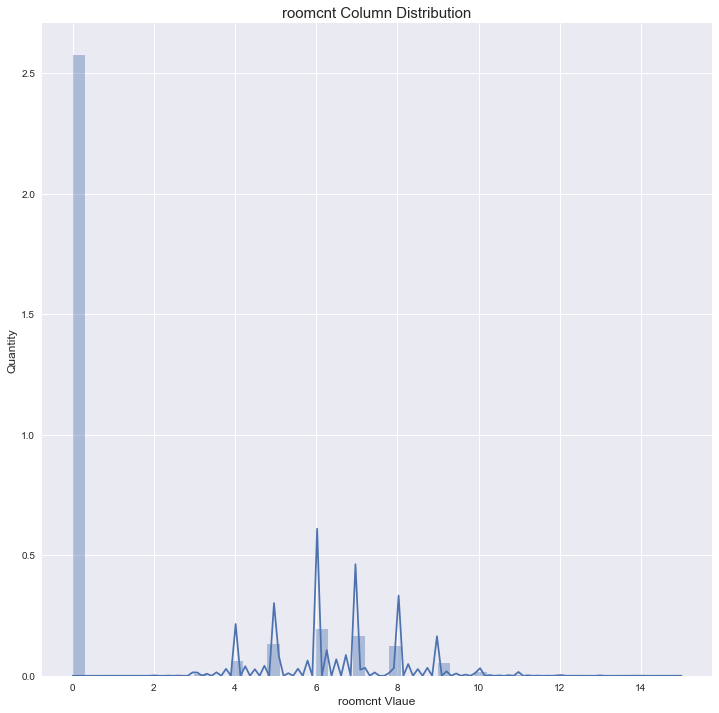

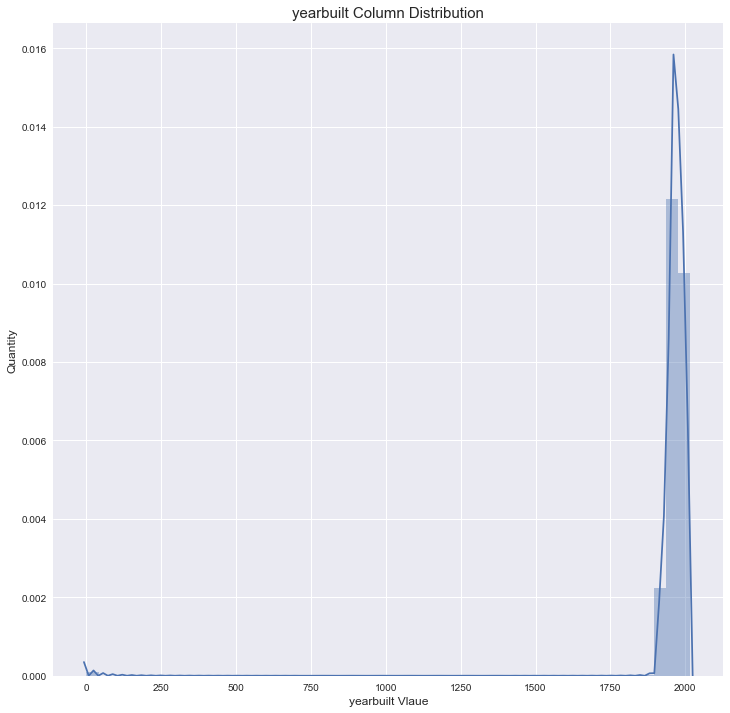

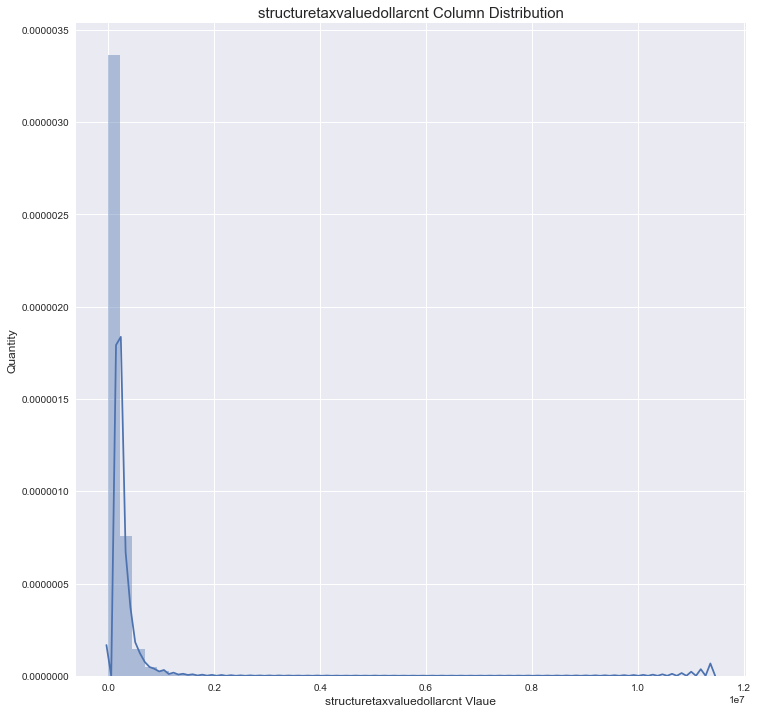

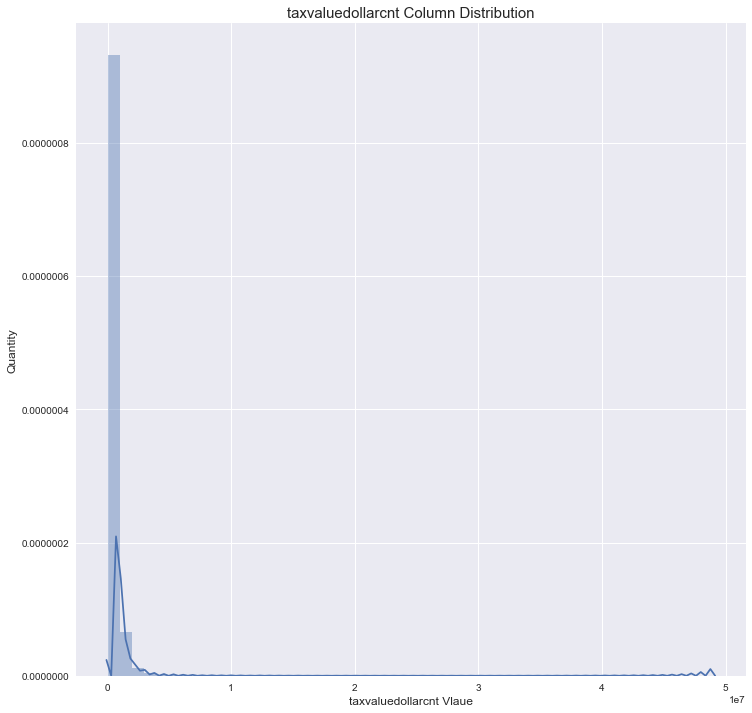

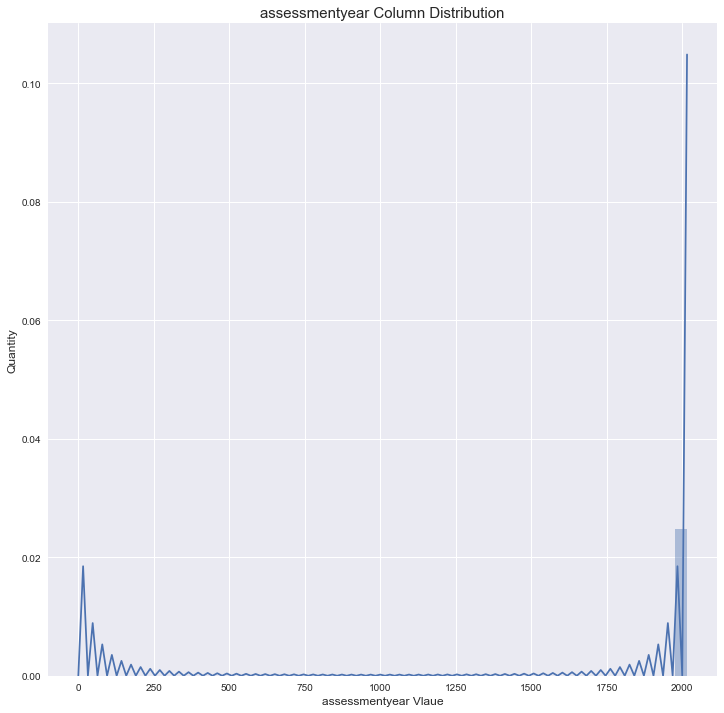

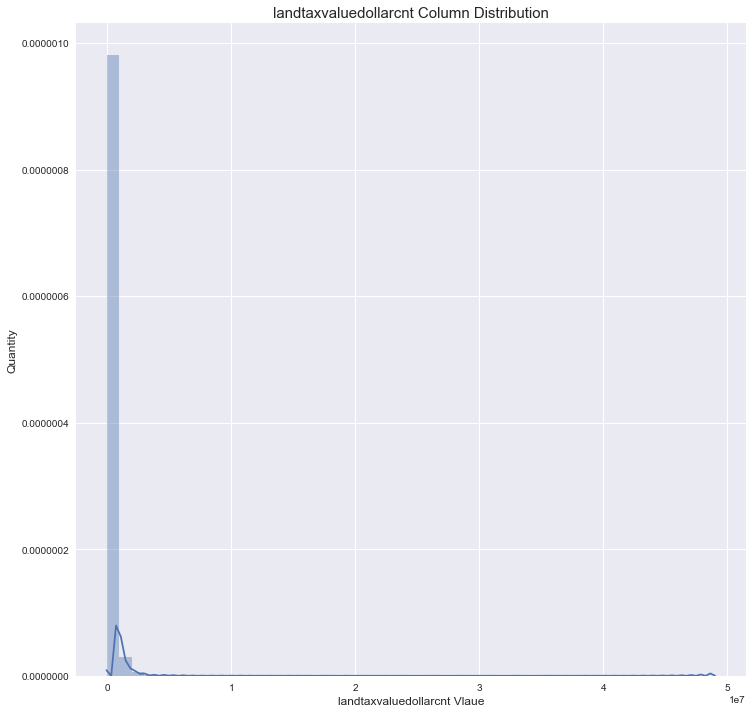

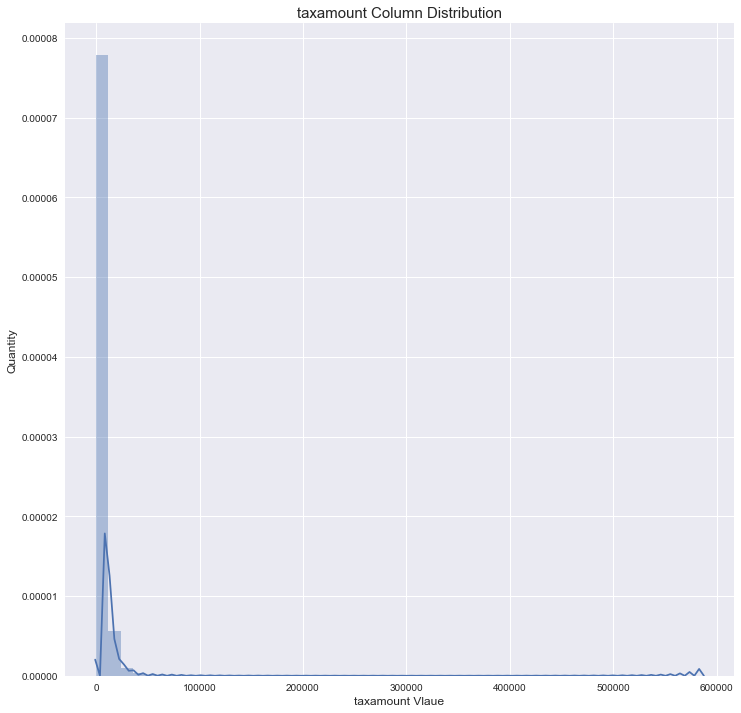

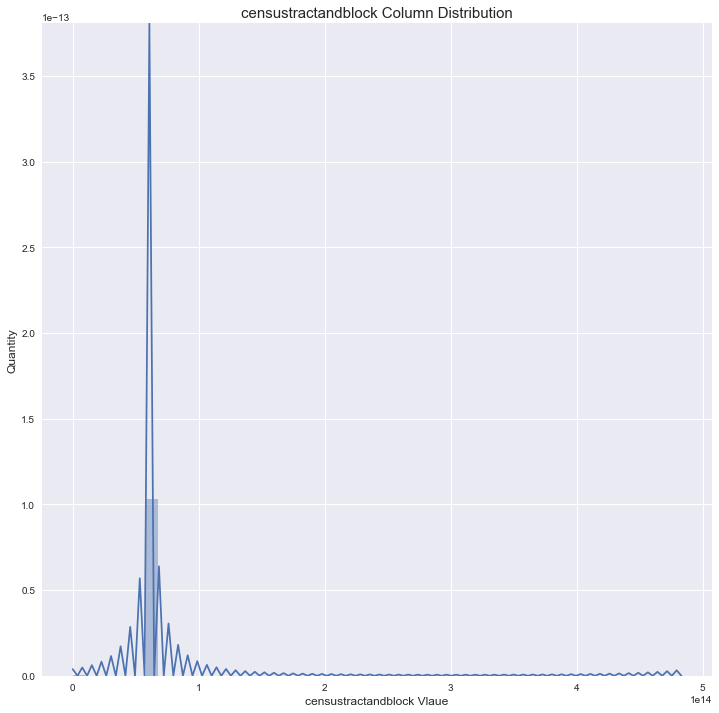

In [203]:
x = data_2017.columns.get_values()
index = [np.argwhere(x=='year'), np.argwhere(x=='month'), np.argwhere(x=='transactiondate'), np.argwhere(x=='logerror'),np.argwhere(x=='parcelid'), np.argwhere(x=='propertycountylandusecode')]
colNames = np.delete(x, index)
for col in colNames:
    plt.figure(figsize=(12,12))
    sns.distplot(data_2017[col])
    plt.ylabel('Quantity', fontsize=12)
    plt.xlabel(col+' Vlaue', fontsize=12)
    plt.title(col+" Column Distribution", fontsize=15)
    plt.show()
    #eachColumnDistribution(data_2017)

## Catagorical Columns

In [232]:
def catagoricalDataDistribution(yearValue):
    plt.close('all')
    sns.countplot(x=yearValue['propertycountylandusecode'], data=yearValue, palette="Set3")
    plt.figure(figsize=(25,30))
    plt.show()

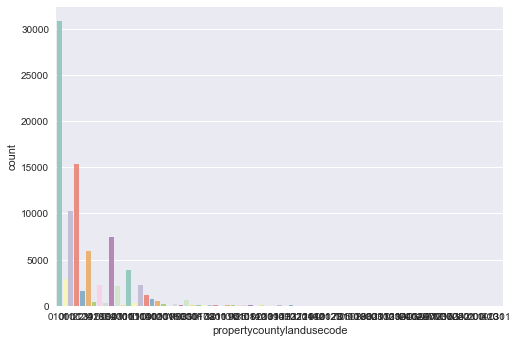

In [233]:
catagoricalDataDistribution(data_2016)

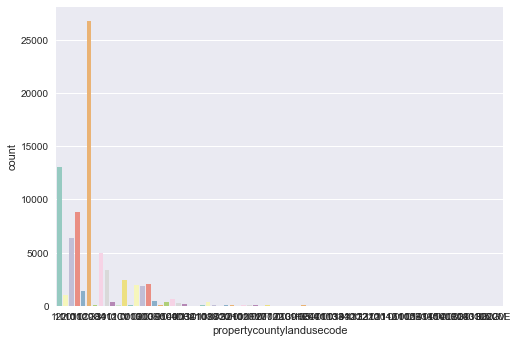

In [234]:
catagoricalDataDistribution(data_2017)

# Interesting Function for Data Analysis

Displays the report of:

    1. Amount of missing data in each column
    2. count of different data types
    3. Amount of 0s in each column
    4. Description of each (mean, min, max, distinct counts)
    5. The histogram
    6. Common Values
    7. Extreme/outlier values

In [141]:
pandas_profiling.ProfileReport(data_2016)

In [142]:
pandas_profiling.ProfileReport(data_2017)